<a href="https://colab.research.google.com/github/PapaKwansa/Chapter-4-submission-mode/blob/main/Analytical_Solution_Strain_L_G_with_fitting_and_geometry_updated_0714.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np

# ----------------------------
# Function: Forward Transformation (Primed → Unprimed)
# ----------------------------
def forward_transform(xp, yp, theta_deg, x0=0, y0=0):
    theta = np.radians(theta_deg)
    x = xp * np.cos(theta) - yp * np.sin(theta) + x0
    y = xp * np.sin(theta) + yp * np.cos(theta) + y0
    return x, y

# ----------------------------
# Function: Reverse Transformation (Unprimed → Primed)
# ----------------------------
def reverse_transform(x, y, theta_deg, x0=0, y0=0):
    """
    Mathcad-style reverse transformation from unprimed to primed coordinates:

    x' = (x - x0)*cos(θ) + (y - y0)*sin(θ)
    y' = (y - y0)*cos(θ) - (x - x0)*sin(θ)
    """
    theta = np.radians(theta_deg)
    dx = x - x0
    dy = y - y0
    xp = dx * np.cos(theta) + dy * np.sin(theta)
    yp = dy * np.cos(theta) - dx * np.sin(theta)
    return xp, yp

# ----------------------------
# Function: Compute Rotation Angle θ
# ----------------------------
def compute_rotation_angle_deg(xp1, yp1, xp2, yp2):
    dx = xp2 - xp1
    dy = yp2 - yp1
    return np.degrees(np.arctan2(dx, dy))

# ----------------------------
# Inputs
# ----------------------------
xp_9A, yp_9A = 0, 0           # Primed 9A coordinates
xp_AVN, yp_AVN = -65, 210     # Primed AVN coordinates

x9A, y9A = 0, 142             # Unprimed 9A origin

# Step 1: Compute θAv
theta_deg = compute_rotation_angle_deg(xp_9A, yp_9A, xp_AVN, yp_AVN)

# Step 2: Forward transformation (primed 9A → unprimed)
x9a, y9a = forward_transform(xp_9A, yp_9A, theta_deg, x9A, y9A)


# Step 3: Reverse transformation (unprimed 9A → primed)
#xp_9a, yp_9a = reverse_transform(x9A, y9A, theta_deg, x9A, y9A)
xp_9a, yp_9a = reverse_transform(x=0, y=142, theta_deg=-theta_deg, x0=0, y0=0)



# Step 4: Also transform AVN to unprimed to verify distance
x_AVN, y_AVN = forward_transform(xp_AVN, yp_AVN, theta_deg, x9A, y9A)

# Step 5: Compute distances
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

distance_primed = euclidean_distance(xp_9A, yp_9A, xp_AVN, yp_AVN)
distance_unprimed = euclidean_distance(x9a, y9a, x_AVN, y_AVN)

# ----------------------------
# Output
# ----------------------------
print("\n=== Avant Coordinate Transformation Validation ===")
print(f"Rotation angle θAv = {theta_deg:.3f}° (Expected: -17.2°)\n")

print("--- Known Input Coordinates ---")
print(f"x'9A = {xp_9A} m, y'9A = {yp_9A} m   (Primed System Input)")
print(f"x9A  = {x9A} m, y9A  = {y9A} m       (Unprimed System Input)\n")

print("--- Forward Transformation: (x'9A, y'9A) → (x9a, y9a) ---")
print(f"x9a = {x9a:.3f} m (Expected: 0 m)")
print(f"y9a = {y9a:.3f} m (Expected: 142 m)\n")

print("--- Reverse Transformation: (x9A, y9A) → (x'9a, y'9a) ---")
print(f"x'9a = {xp_9a:.3f} m (Expected: ~41.987 m)")
print(f"y'9a = {yp_9a+142:.3f} m (Expected: ~277.651 m)\n")

print("--- Distance Between 9A and AVN ---")
print(f"Distance in primed system: {distance_primed:.3f} m (Expected: ~219.8 m)")
print(f"Distance in unprimed system: {distance_unprimed:.3f} m (Should match above)")



=== Avant Coordinate Transformation Validation ===
Rotation angle θAv = -17.199° (Expected: -17.2°)

--- Known Input Coordinates ---
x'9A = 0 m, y'9A = 0 m   (Primed System Input)
x9A  = 0 m, y9A  = 142 m       (Unprimed System Input)

--- Forward Transformation: (x'9A, y'9A) → (x9a, y9a) ---
x9a = 0.000 m (Expected: 0 m)
y9a = 142.000 m (Expected: 142 m)

--- Reverse Transformation: (x9A, y9A) → (x'9a, y'9a) ---
x'9a = 41.987 m (Expected: ~41.987 m)
y'9a = 277.651 m (Expected: ~277.651 m)

--- Distance Between 9A and AVN ---
Distance in primed system: 219.829 m (Expected: ~219.8 m)
Distance in unprimed system: 219.829 m (Should match above)


In [35]:
# Updated true function

import numpy as np

# ----------------------------
# Function: Forward Transformation (Primed → Unprimed)
# ----------------------------
def forward_transform(xp, yp, theta_deg, x0=0, y0=0):
    theta = np.radians(theta_deg)
    x = xp * np.cos(theta) - yp * np.sin(theta) + x0
    y = xp * np.sin(theta) + yp * np.cos(theta) + y0
    return x, y

# ----------------------------
# Function: Reverse Transformation (Unprimed → Primed)
# ----------------------------
def reverse_transform(x, y, theta_deg, x0=0, y0=0):
    """
    Reverse transformation from unprimed to primed coordinates.
    This function internally handles the inverse rotation.

    Mathcad-style reverse transformation:

    x' = (x - x0)*cos(θ) + (y - y0)*sin(θ)
    y' = (y - y0)*cos(θ) - (x - x0)*sin(θ)
    """
    theta = np.radians(theta_deg)
    dx = x - x0
    dy = y - y0
    xp = dx * np.cos(theta) + dy * np.sin(theta)
    yp = dy * np.cos(theta) - dx * np.sin(theta)
    return xp, yp

# ----------------------------
# Function: Compute Rotation Angle θ
# ----------------------------
def compute_rotation_angle_deg(xp1, yp1, xp2, yp2):
    dx = xp2 - xp1
    dy = yp2 - yp1
    return np.degrees(np.arctan2(dx, dy))

# ----------------------------
# Inputs
# ----------------------------
xp_9A, yp_9A = 0, 0           # Primed 9A coordinates
xp_AVN, yp_AVN = -65, 210     # Primed AVN coordinates

x9A, y9A = 0, 142             # Unprimed 9A origin

# Step 1: Compute θAv
theta_deg = compute_rotation_angle_deg(xp_9A, yp_9A, xp_AVN, yp_AVN)

# Step 2: Forward transformation (primed 9A → unprimed)
x9a, y9a = forward_transform(xp_9A, yp_9A, theta_deg, x9A, y9A)

# Step 3: Reverse transformation (unprimed 9A → primed)
xp_9a, yp_9a = reverse_transform(x=0, y=142, theta_deg=-theta_deg, x0=0, y0=0)

# Step 4: Also transform AVN to unprimed to verify distance
x_AVN, y_AVN = forward_transform(xp_AVN, yp_AVN, theta_deg, x9A, y9A)

# Step 5: Compute distances
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

distance_primed = euclidean_distance(xp_9A, yp_9A, xp_AVN, yp_AVN)
distance_unprimed = euclidean_distance(x9a, y9a, x_AVN, y_AVN)

# ----------------------------
# Output
# ----------------------------
print("\n=== Avant Coordinate Transformation Validation ===")
print(f"Rotation angle θAv = {theta_deg:.3f}° (Expected: -17.2°)\n")

print("--- Known Input Coordinates ---")
print(f"x'9A = {xp_9A} m, y'9A = {yp_9A} m   (Primed System Input)")
print(f"x9A  = {x9A} m, y9A  = {y9A} m       (Unprimed System Input)\n")

print("--- Forward Transformation: (x'9A, y'9A) → (x9a, y9a) ---")
print(f"x9a = {x9a:.3f} m (Expected: 0 m)")
print(f"y9a = {y9a:.3f} m (Expected: 142 m)\n")

print("--- Reverse Transformation: (x9A, y9A) → (x'9a, y'9a) ---")
print(f"x'9a = {xp_9a:.3f} m (Expected: ~41.987 m)")
print(f"y'9a = {yp_9a+142:.3f} m (Expected: ~277.651 m)\n")

print("--- Distance Between 9A and AVN ---")
print(f"Distance in primed system: {distance_primed:.3f} m (Expected: ~219.8 m)")
print(f"Distance in unprimed system: {distance_unprimed:.3f} m (Should match above)")



=== Avant Coordinate Transformation Validation ===
Rotation angle θAv = -17.199° (Expected: -17.2°)

--- Known Input Coordinates ---
x'9A = 0 m, y'9A = 0 m   (Primed System Input)
x9A  = 0 m, y9A  = 142 m       (Unprimed System Input)

--- Forward Transformation: (x'9A, y'9A) → (x9a, y9a) ---
x9a = 0.000 m (Expected: 0 m)
y9a = 142.000 m (Expected: 142 m)

--- Reverse Transformation: (x9A, y9A) → (x'9a, y'9a) ---
x'9a = 41.987 m (Expected: ~41.987 m)
y'9a = 277.651 m (Expected: ~277.651 m)

--- Distance Between 9A and AVN ---
Distance in primed system: 219.829 m (Expected: ~219.8 m)
Distance in unprimed system: 219.829 m (Should match above)


In [36]:
# Wrapping the function to use in the strain equation.
import numpy as np

def avant_coordinate_transformation():
    # Forward and reverse transform functions
    def forward_transform(xp, yp, theta_deg, x0=0, y0=0):
        theta = np.radians(theta_deg)
        x = xp * np.cos(theta) - yp * np.sin(theta) + x0
        y = xp * np.sin(theta) + yp * np.cos(theta) + y0
        return x, y

    def reverse_transform(x, y, theta_deg, x0=0, y0=0):
        theta = np.radians(theta_deg)
        dx = x - x0
        dy = y - y0
        xp = dx * np.cos(theta) + dy * np.sin(theta)
        yp = dy * np.cos(theta) - dx * np.sin(theta)
        return xp, yp

    def compute_rotation_angle_deg(xp1, yp1, xp2, yp2):
        dx = xp2 - xp1
        dy = yp2 - yp1
        return np.degrees(np.arctan2(dx, dy))

    # Input coordinates
    xp_9A, yp_9A = 0, 0
    xp_AVN, yp_AVN = -65, 210
    x9A, y9A = 0, 142

    # Compute rotation angle
    theta_deg = compute_rotation_angle_deg(xp_9A, yp_9A, xp_AVN, yp_AVN)

    # Forward transform primed 9A to unprimed
    x9a, y9a = forward_transform(xp_9A, yp_9A, theta_deg, x9A, y9A)

    # Reverse transform unprimed 9A to primed (verify)
    xp_9a, yp_9a = reverse_transform(x=0, y=142, theta_deg=-theta_deg, x0=0, y0=0)

    # Forward transform AVN
    x_AVN, y_AVN = forward_transform(xp_AVN, yp_AVN, theta_deg, x9A, y9A)

    # Compute distances
    def euclidean_distance(x1, y1, x2, y2):
        return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    distance_primed = euclidean_distance(xp_9A, yp_9A, xp_AVN, yp_AVN)
    distance_unprimed = euclidean_distance(x9a, y9a, x_AVN, y_AVN)

    # Return results for possible use
    return {
        "theta_deg": theta_deg,
        "x9a": x9a, "y9a": y9a,
        "xp_9a": xp_9a, "yp_9a": yp_9a,
        "x_AVN": x_AVN, "y_AVN": y_AVN,
        "distance_primed": distance_primed,
        "distance_unprimed": distance_unprimed,
    }


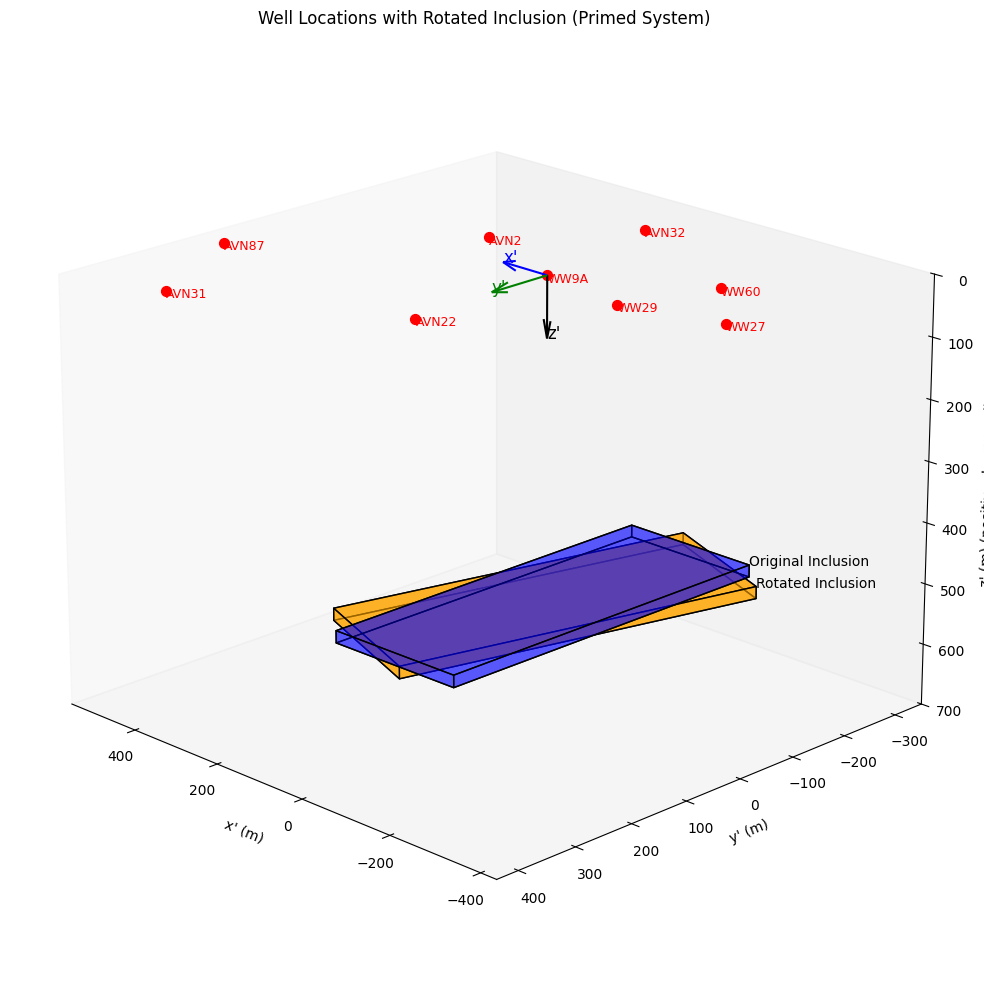

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# ----------------------------
# Well Coordinates (Primed System: WW9A is Origin)
# ----------------------------
wells = {
    "WW9A": (0, 0, 0),
    "WW60": (-243.4, -116, 0),
    "WW27": (-371.4, -15, 0),
    "WW29": (-185.4, 25, 0),
    "AVN22": (-11.4, 243, 0),
    "AVN31": (370.6, 387, 0),
    "AVN32": (57.6, -230, 0),
    "AVN87": (494.6, 199, 0),
    "AVN2": (211.6, -62.9, 0),
}

# Inclusion Parameters
a, b, c = 270, 550, 20
z_center = 530
# theta_deg = -17.5 Check this parameter to ensure the rotation angle is -17.2


# Rotation function
def rotate_z(points, angle_deg, origin):
    angle_rad = np.radians(-angle_deg)
    Rz = np.array([
        [np.cos(angle_rad), np.sin(angle_rad), 0],
        [-np.sin(angle_rad),  np.cos(angle_rad), 0],
        [0, 0, 1]
    ])
    return (points - origin) @ Rz.T + origin

# Create cuboid
def create_cuboid(center, a, b, c):
    dx, dy, dz = a/2, b/2, c/2
    x, y, z = center
    corners = np.array([
        [x - dx, y - dy, z - dz],
        [x + dx, y - dy, z - dz],
        [x + dx, y + dy, z - dz],
        [x - dx, y + dy, z - dz],
        [x - dx, y - dy, z + dz],
        [x + dx, y - dy, z + dz],
        [x + dx, y + dy, z + dz],
        [x - dx, y + dy, z + dz],
    ])
    return corners

# Plot cuboid
def plot_cuboid(ax, corners, color, alpha, label=None):
    faces = [
        [corners[j] for j in [0,1,2,3]],
        [corners[j] for j in [4,5,6,7]],
        [corners[j] for j in [0,1,5,4]],
        [corners[j] for j in [2,3,7,6]],
        [corners[j] for j in [1,2,6,5]],
        [corners[j] for j in [0,3,7,4]],
    ]
    poly = Poly3DCollection(faces, facecolors=color, edgecolors='k', linewidths=1, alpha=alpha)
    ax.add_collection3d(poly)
    if label:
        ax.text(*corners[0], label, fontsize=10, color='black')

# Plot setup
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot wells
for name, (x, y, z) in wells.items():
    ax.scatter(x, y, z, color='red', s=50)
    ax.text(x, y, z + 10, name, color='red', fontsize=9)

# Original inclusion (before rotation)
inclusion_center = [0, 0, z_center]
original_corners = create_cuboid(inclusion_center, a, b, c)
plot_cuboid(ax, original_corners, color='blue', alpha=0.4, label="Original Inclusion")

# Rotated inclusion
rotated_corners = rotate_z(original_corners, theta_deg, origin=np.array(inclusion_center))
plot_cuboid(ax, rotated_corners, color='orange', alpha=0.6, label="Rotated Inclusion")

# Primed coordinate system arrows (from surface)
arrow_len = 100
ax.quiver(0, 0, 0, arrow_len, 0, 0, color='blue')     # x'
ax.quiver(0, 0, 0, 0, arrow_len, 0, color='green')    # y'
ax.quiver(0, 0, 0, 0, 0, arrow_len, color='black')    # z' (positive down)

# Axis labels
ax.text(arrow_len, 0, 0, "x'", color='blue', fontsize=12)
ax.text(0, arrow_len, 0, "y'", color='green', fontsize=12)
ax.text(0, 0, arrow_len, "z'", color='black', fontsize=12)

# View settings
ax.set_zlim(700, 0)  # z positive down
ax.set_xlabel("x' (m)")
ax.set_ylabel("y' (m)")
ax.set_zlabel("z' (m) (positive downward)")
ax.set_title("Well Locations with Rotated Inclusion (Primed System)")

# Turn off grid
ax.grid(False)
ax.view_init(elev=20, azim=135)
plt.tight_layout()
plt.show()


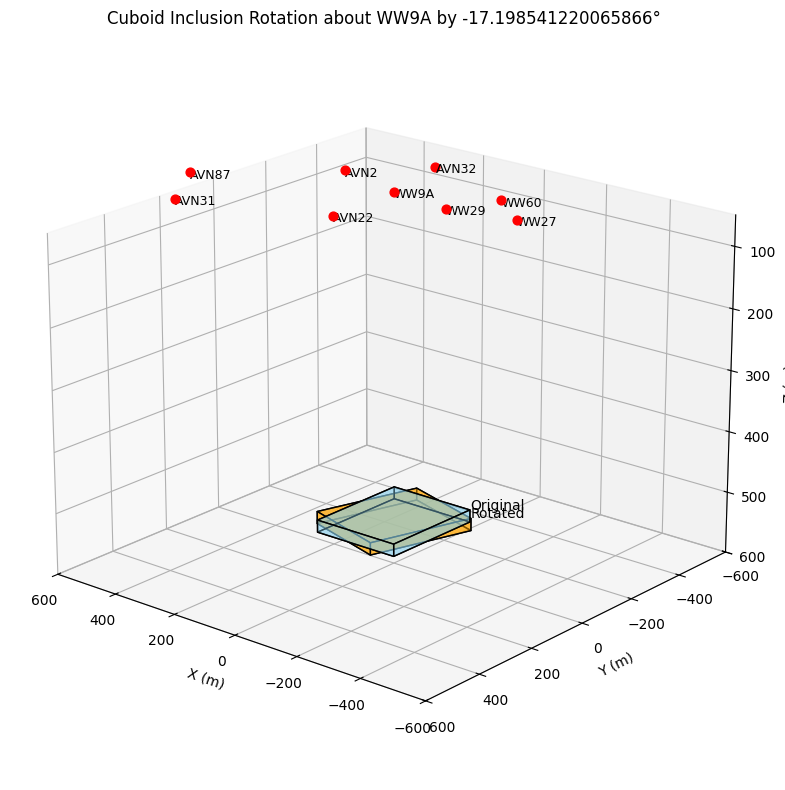

In [38]:
# Rotation test.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# ----------------------------
# Inclusion Parameters
# ----------------------------
a, b, c = 250, 300, 20   # Length, Width, Height
h = 530                 # Depth below surface (so center z = -h)
# theta_deg = -17.5         # Rotation angle (example)

# ----------------------------
# Rotation Function
# ----------------------------
def rotate_z(points, angle_deg, origin):
    angle_rad = np.radians(-angle_deg)
    cos_a, sin_a = np.cos(angle_rad), np.sin(angle_rad)
    rot_matrix = np.array([
        [cos_a, sin_a, 0],
        [-sin_a,  cos_a, 0],
        [0,      0,     1]
    ])
    return np.dot(points - origin, rot_matrix.T) + origin

# ----------------------------
# Create Cuboid Centered at (0, 0, -h)
# Change the -h to positive
# ----------------------------
def create_cuboid(center, a, b, c):
    x, y, z = center
    dx, dy, dz = a / 2, b / 2, c / 2
    corners = np.array([
        [x - dx, y - dy, z - dz],
        [x + dx, y - dy, z - dz],
        [x + dx, y + dy, z - dz],
        [x - dx, y + dy, z - dz],
        [x - dx, y - dy, z + dz],
        [x + dx, y - dy, z + dz],
        [x + dx, y + dy, z + dz],
        [x - dx, y + dy, z + dz],
    ])
    return corners

def plot_cuboid(ax, corners, color='cyan', alpha=0.3, label=None):
    faces = [
        [corners[j] for j in [0,1,2,3]], # Bottom
        [corners[j] for j in [4,5,6,7]], # Top
        [corners[j] for j in [0,1,5,4]], # Side 1
        [corners[j] for j in [1,2,6,5]], # Side 2
        [corners[j] for j in [2,3,7,6]], # Side 3
        [corners[j] for j in [3,0,4,7]], # Side 4
    ]
    poly3d = Poly3DCollection(faces, facecolors=color, linewidths=1, edgecolors='k', alpha=alpha)
    ax.add_collection3d(poly3d)
    if label:
        ax.text(*corners[0], label, fontsize=10, color='black')

# ----------------------------
# Well Coordinates (Primed System: WW9A is Origin)
# ----------------------------
wells = {
    "WW9A": (0, 0, 0),
    "WW60": (-243.4, -116, 0),
    "WW27": (-371.4, -15, 0),
    "WW29": (-185.4, 25, 0),
    "AVN22": (-11.4, 243, 0),
    "AVN31": (370.6, 387, 0),
    "AVN32": (57.6, -230, 0),
    "AVN87": (494.6, 199, 0),
    "AVN2": (211.6, -62.9, 0),
}

# ----------------------------
# Plot Original and Rotated Inclusion
# ----------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Original cuboid (before rotation)
cuboid_center = np.array([0, 0, h])
original_corners = create_cuboid(cuboid_center, a, b, c)
plot_cuboid(ax, original_corners, color='skyblue', alpha=0.4, label='Original')

# Rotated cuboid (about WW9A)
rotated_corners = rotate_z(original_corners, theta_deg, origin=np.array([0, 0, -h]))
plot_cuboid(ax, rotated_corners, color='orange', alpha=0.5, label='Rotated')

# Plot wells
for name, (x, y, z) in wells.items():
    ax.scatter(x, y, z, c='red', s=40)
    ax.text(x, y, z+10, name, fontsize=9, color='black')

# ----------------------------
# Plot settings
# ----------------------------
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title(f'Cuboid Inclusion Rotation about WW9A by {theta_deg}°')

ax.set_xlim(-600, 600)
ax.set_ylim(-600, 600)
ax.set_zlim(600, 50)
ax.view_init(elev=20, azim=130)
plt.tight_layout()
plt.show()


In [39]:
# Create a function that calls the updated geometry and use it in the first geometry
# theta_deg = abs(theta_deg)

In [40]:

"""

  # Check the function for ec
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def C_matrix(x,y,z,a,b,c):
  return np.array([
    [x - a, y - b, z - c],  # Vertex 1
    [x + a, y - b, z - c],  # Vertex 2
    [x + a, y + b, z - c],  # Vertex 3
    [x - a, y + b, z - c],  # Vertex 4
    [x - a, y + b, z + c],  # Vertex 5
    [x - a, y - b, z + c],  # Vertex 6
    [x + a, y - b, z + c],  # Vertex 7
    [x + a, y + b, z + c]   # Vertex 8
])

"""

'\n\n  # Check the function for ec\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom mpl_toolkits.mplot3d import Axes3D\n\ndef C_matrix(x,y,z,a,b,c):\n  return np.array([\n    [x - a, y - b, z - c],  # Vertex 1\n    [x + a, y - b, z - c],  # Vertex 2\n    [x + a, y + b, z - c],  # Vertex 3\n    [x - a, y + b, z - c],  # Vertex 4\n    [x - a, y + b, z + c],  # Vertex 5\n    [x - a, y - b, z + c],  # Vertex 6\n    [x + a, y - b, z + c],  # Vertex 7\n    [x + a, y + b, z + c]   # Vertex 8\n])\n\n'

In [41]:
# Check the function for ec
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def C_matrix(x, y, z, a, b, c, theta_deg=0):
    # Step 1: Define the center
    center = np.array([x, y, z])

    # Step 2: Build the cuboid (same as before)
    corners = np.array([
        [x - a, y - b, z - c],
        [x + a, y - b, z - c],
        [x + a, y + b, z - c],
        [x - a, y + b, z - c],
        [x - a, y + b, z + c],
        [x - a, y - b, z + c],
        [x + a, y - b, z + c],
        [x + a, y + b, z + c]
    ])

    # Step 3: Apply rotation if needed
    if theta_deg != 0:
        corners = rotate_z(corners, theta_deg, origin=center)

    return corners

def R_n(n,C):
  return np.linalg.norm(C[n])


def delta(i,j):  # Change this Kronecker delta.
  return int(i==j)

deltamod = np.array([[0,1,0],[0,0,1],[1,0,0]])

def V0(x,y,z,a,b,c, theta_deg=0):
  C = C_matrix(x,y,z,a,b,c,theta_deg)
  R_n_list = [R_n(n,C) for n in range(8)]
  result = 0
  for n in range(8):
    for i in range(3):
      result += C[n,i]*C[n,(i+1)%3]*np.log(R_n_list[n]+C[n,(i+2)%3]) - (C[n,i]**2)/2*np.arctan((C[n,(i+1)%3]*C[n,(i+2)%3])/(C[n,i]*R_n_list[n]))
    result *= ((-1)**(n+1))
  return result

def v10(x,y,z,a,b,c,theta_deg=0):
   C = C_matrix(x,y,z,a,b,c,theta_deg)
   R_n_list = [R_n(n,C) for n in range(8)]
   result = np.zeros(3)
   for i in range(3):
    for n in range(8):
        result[i] += ((-1)**(n+1)) * ((C[n,(i+1)%3])*np.log(R_n_list[n]+C[n,(i+2)%3])+C[n,(i+2)%3]*np.log(R_n_list[n]+C[n,(i+1)%3]) - (C[n,i])*np.arctan((C[n,(i+1)%3]*C[n,(i+2)%3])/(C[n,i]*R_n_list[n])))
   return result

def v20(x,y,z,a,b,c,theta_deg=0):
   C = C_matrix(x,y,z,a,b,c,theta_deg)
   R_n_list = [R_n(n,C) for n in range(8)]
   result = np.zeros([3,3])
   for i in range(3):
    for j in range(3):
      for n in range(8):
        result[i,j] += ((-1)**(n+1)) * ((deltamod[i,j] * np.log(C[n, (j+1)%3] + R_n_list[n])) + deltamod[j,i] * np.log(C[n, (i+1)%3] + R_n_list[n]) - delta(i,j) * np.arctan((C[n,(i+1)%3]*C[n,(i+2)%3])/(C[n,i]*R_n_list[n])))
   return result

def v30(x,y,z,a,b,c,theta_deg=0):
   C = C_matrix(x,y,z,a,b,c,theta_deg)
   R_n_list = [R_n(n,C) for n in range(8)]
   result = np.zeros([3,3])
   for i in range(3):
    for j in range(3):
      for n in range(8):
        result[i,j] += ((-1)**(n+1)) * (((deltamod[i,j] * (C[n, 2] + delta(i,0) * R_n_list[n]))/ (R_n_list[n] * (C[n, (i+2)%3] + R_n_list[n]))) + ((deltamod[j,i] * (C[n, 2] + delta(j,0) * R_n_list[n]))/ ((R_n_list[n] * (C[n, (j+2)%3] + R_n_list[n])))) - delta(i,j) * ((C[n, 0] * C[n, 1] *((1 - 2 * delta(i, 2)) * ((R_n_list[n]) ** 2) - (C[n, 2]**2))) / (R_n_list[n] * ((C[n, i] **2) * (R_n_list[n] **2)  + (C[n, (i+ 1)% 3] **2) * ((C[n, (i+ 2)% 3]) **2)))))
   return result


# Define the parameters
#p = 1e6  # Pressure in the inclusion
nu = 0.25 # The Poisson's ratio
E = 10e9  # Young's modulus
alpha =  0.8 # Biot coefficient
h = 530 # Depth of the inclusion
# x = 211.6 # x-coordinate of the observation point
# y = -62.9 # y-coordinate of the observation point
z = 30 # z-coordinate of the observation point
a = 250 # Length of the inclusion
b = 300 # Width of the inclusion
c = 20 # Height of the inclusion

# Calculate ec seprately and call it for the computation.

def linear_trans(alpha, nu, p, E):
    return ((alpha * (1 - 2 * nu)) * p) / E


def charac_strain(linear_trans):
    return (1 / (4 * np.pi)) * ((1 + nu) / (1 - nu)) * linear_trans


def disp(x,y,z,a,b,c, ec, h, theta_deg=0):
  result = np.zeros(3)
  V101 = v10(x,y,z-h,a,b,c, theta_deg)
  V102 = v10(x,y,-z-h,a,b,c, theta_deg)
  v201 = v20(x,y,-z-h,a,b,c, theta_deg)
  for i in range(3):
    result[i] = -ec * (V101[i]+ (3 - 4 * nu) * V102[i] - 2 *(1 - 2 * delta(i,2))*z * v201[i,2])
  return result

def disp_prime(x,y,z,a,b,c, ec, h, theta_deg=0):
  v201 = v20(x,y,z-h,a,b,c,theta_deg)
  v202 = v20(x,y,-z-h,a,b,c,theta_deg)
  v301 = v30(x,y,-z-h,a,b,c,theta_deg)
  result = np.zeros([3,3])
  for i in range(3):
    for j in range(3):
       result[i,j] = -ec * (v201[i,j] + ((3 - 4 * nu) * (1 - 2 * delta(j,2)) - 2 * (1 - 2 * delta(i, 2)) * delta(j,2)) * v202[i,j] + (-2)*(1- 2 * delta(i,2))*(1- 2 * delta(j,2)) * z * v301[i,j])
  return result

def strain(x,y,z,a,b,c, ec, h, theta_deg=0):
  local_disp_prime = disp_prime(x,y,z,a,b,c, ec, h, theta_deg)
  result = np.zeros([3,3])
  for i in range(3):
    for j in range(3):
      result[i,j] = 0.5 * (local_disp_prime[i,j] + local_disp_prime[j, i])
  return result

#

# Call all the functions for the computation....
def main(x,y,z,a,b,c, nu, h, p, theta_deg=0):
    # Define the parameters

  E = 10e9  # Young's modulus
  alpha =  0.8 # Biot coefficient

  ec = charac_strain(linear_trans(alpha, nu, p, E))

  # Calculate ec seprately and call it for the computation.
  return strain(x,y,z,a,b,c, ec, h, theta_deg)


def pressure(pmax, tpeak, d, t):
    """
    Calculates the pressure for each day based on the given parameters.

    Parameters:
    - pmax: Maximum pressure value (kPa).
    - tpeak: Time when the pressure reaches its peak (days).
    - d: Decay rate for pressure after tpeak.
    - t: Array or list of time values (days).

    Returns:
    - Array of calculated pressure values corresponding to the time values.
    """
    t = np.array(t)  # Ensure time is a NumPy array for vectorized operations

    # Initialize pressure array
    p = np.zeros_like(t, dtype=float)

    # Apply conditions for pressure calculations
    condition_1 = t <= tpeak
    condition_2 = t > tpeak

    # Calculate pressure based on conditions
    p[condition_1] = (pmax / tpeak) * t[condition_1]
    p[condition_2] = pmax * np.exp(-d * (t[condition_2] / tpeak - 1))

    return p


In [42]:
"""
# Updated function call for the parameters.
# Work on this function to correctly implement the geometry to the strain equation.
import numpy as np
import matplotlib.pyplot as plt

# (Include your previous big functions: C_matrix, R_n, delta, deltamod, V0, v10, v20, v30, linear_trans, charac_strain, disp, disp_prime, strain, main, pressure)

# Paste the avant_coordinate_transformation() function here (or import it if in another file)

# Example usage
def updated_main(nu, h, p, a, b, c):
    # Get transformed coordinates from avant system
    coords = avant_coordinate_transformation()
    # Use transformed unprimed 9A coordinates as observation point (x, y)
    x = coords['x9a']
    y = coords['y9a']
    # Use a fixed z for observation point as before (or customize)
    z = 30

    # Compute strain using transformed coordinates
    strain_result = main(x, y, z, a, b, c, nu, h, p)
    return strain_result


# Define parameters (same as before)
nu = 0.25
h = 530
p = 1e6
a = 270
b = 550
c = 20

# Call updated main function with transformed coordinates
result = updated_main(nu, h, p, a, b, c)

print("Strain tensor at transformed observation point:")
print(result)

"""

'\n# Updated function call for the parameters.\n# Work on this function to correctly implement the geometry to the strain equation.\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# (Include your previous big functions: C_matrix, R_n, delta, deltamod, V0, v10, v20, v30, linear_trans, charac_strain, disp, disp_prime, strain, main, pressure)\n\n# Paste the avant_coordinate_transformation() function here (or import it if in another file)\n\n# Example usage\ndef updated_main(nu, h, p, a, b, c):\n    # Get transformed coordinates from avant system\n    coords = avant_coordinate_transformation()\n    # Use transformed unprimed 9A coordinates as observation point (x, y)\n    x = coords[\'x9a\']\n    y = coords[\'y9a\']\n    # Use a fixed z for observation point as before (or customize)\n    z = 30\n\n    # Compute strain using transformed coordinates\n    strain_result = main(x, y, z, a, b, c, nu, h, p)\n    return strain_result\n\n\n# Define parameters (same as before)\nnu = 0.25\nh 

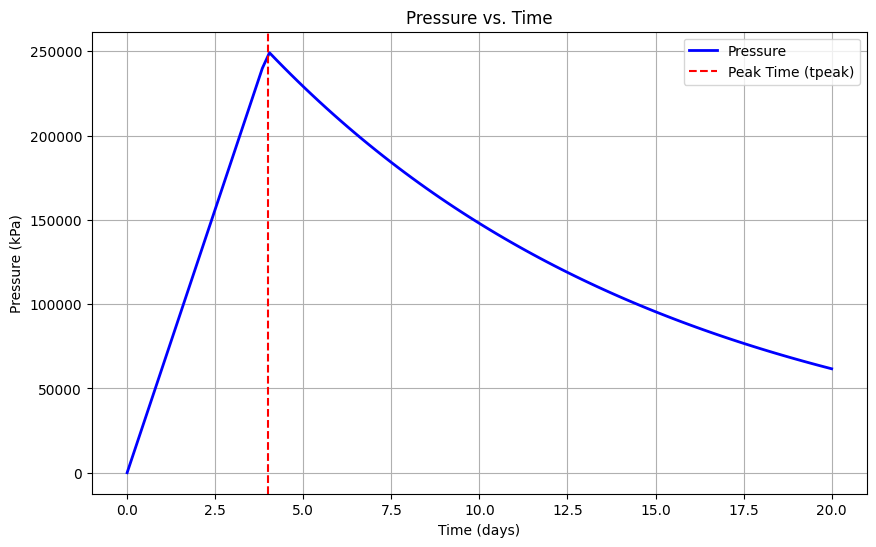

In [43]:
# Test p to see if it returns the right values
# Example parameters
pmax = 250000  # Maximum pressure (kPa)
tpeak = 4  # Time to peak pressure (days)
d = 0.35  # Decay rate
time = np.linspace(0, 20, 100)  # Time array from 0 to 20 days, with 100 points

# Compute pressure
pressure_values = pressure(pmax, tpeak, d, time)

# Plotting the pressure values
plt.figure(figsize=(10, 6))
plt.plot(time, pressure_values, label='Pressure', color='blue', linewidth=2)
plt.axvline(x=tpeak, color='red', linestyle='--', label='Peak Time (tpeak)')
plt.xlabel('Time (days)')
plt.ylabel('Pressure (kPa)')
plt.title('Pressure vs. Time')
plt.legend()
plt.grid(True)
plt.show()



In [44]:
# Compute the x, y with z (the location of the strainmeters for measurements being fixed)
from dataclasses import dataclass
import numpy as np

@dataclass
class Point:
    x: float
    y: float

@dataclass
class Borehole:
    name: str
    local_coords: tuple  # (x', y')


boreholes = [
    Borehole("9A", (0, 0)),
    Borehole("27", (-27, -370)),
    Borehole("29", (18, -190)),
    Borehole("60", (-127, -238)),
    Borehole("AVN", (-65, 210))  # Instrumented well
]


def transform_to_inclusion_frame(xp, yp, x0p, y0p, theta_deg):
    """
    Transforms from fixed primed coordinates (xp, yp) to moving (x, y) relative to the inclusion.
    """
    theta = np.radians(theta_deg)
    dx = xp - x0p
    dy = yp - y0p

    x = dx * np.cos(theta) + dy * np.sin(theta)
    y = -dx * np.sin(theta) + dy * np.cos(theta)

    return x, y


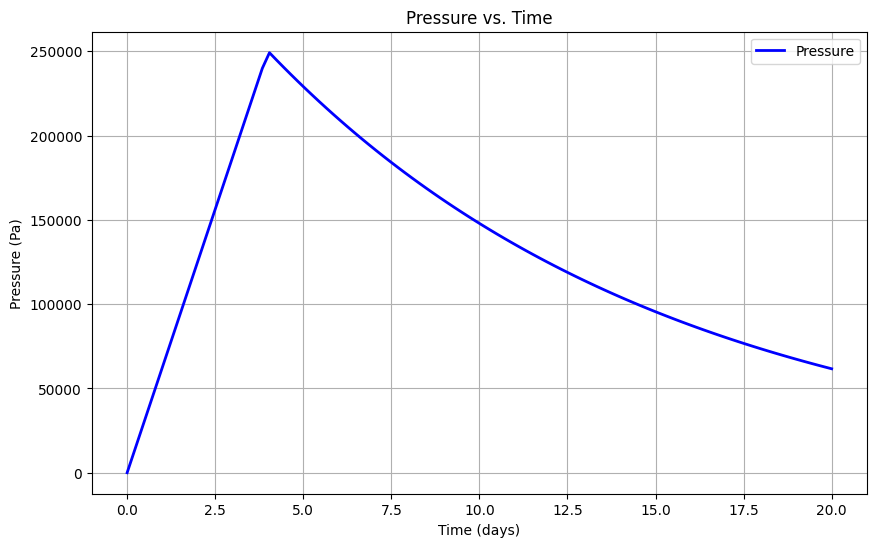

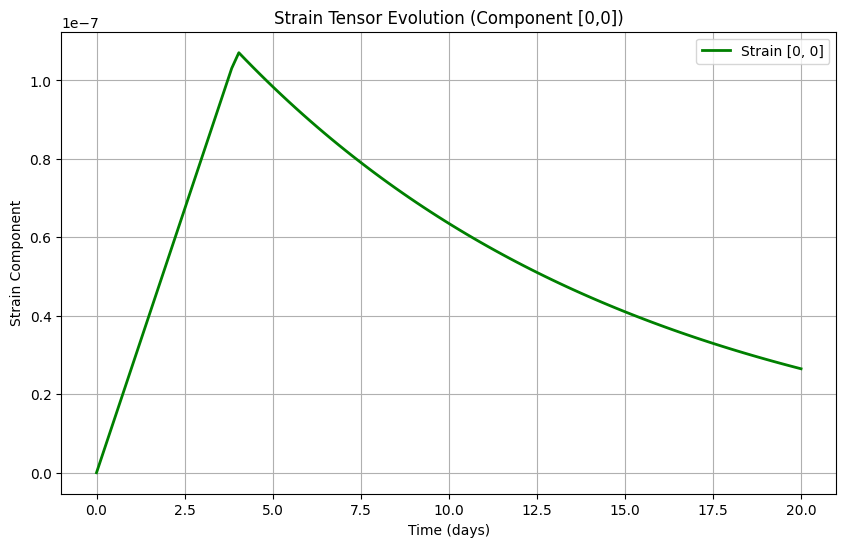

In [45]:
# Generate the time series pressure dataset based on the analytical solution.
import numpy as np
import matplotlib.pyplot as plt

def strain_time_series(pmax, tpeak, d, t, x, y, z, a, b, c, nu, h, theta_deg):
    """
    Computes a time series dataset of strain tensors based on pressure over time.

    Parameters:
    - pmax: Maximum pressure value (Pa).
    - tpeak: Time when the pressure reaches its peak (days).
    - d: Decay rate for pressure after tpeak.
    - t: Array or list of time values (days).
    - x, y, z: Coordinates of the observation point.
    - a, b, c: Geometry parameters of the inclusion.
    - nu: Poisson's ratio.
    - h: Depth of the inclusion.

    Returns:
    - strain_dataset: A list of strain tensors for each time step.
    """
    # Calculate pressure values for the given time array
    pressure_values = pressure(pmax, tpeak, d, t)

    # Initialize an empty list to store the strain tensors
    strain_dataset = []

    # Loop through each pressure value and calculate the corresponding strain tensor
    for p in pressure_values:
        # Compute the characteristic strain
        ec = charac_strain(linear_trans(alpha=0.8, nu=nu, p=p, E=10e9))

        # Calculate the strain tensor for the current pressure
        strain_tensor = strain(x, y, z, a, b, c, ec, h, theta_deg)

        # Append the strain tensor to the dataset
        strain_dataset.append(strain_tensor)

    return strain_dataset

# Example Parameters
pmax = 250000 # Maximum pressure (kPa)
tpeak = 4  # Time to peak pressure (days)
d = 0.35  # Decay rate
time = np.linspace(0, 20, 100)  # Time array from 0 to 20 days

# x, y, z = 211.6, -62.9, 30
Z = 30 # Measurement location for AVN2
a, b, c = 250, 300, 20
nu, h = 0.25, 530

# Compute the strain time series dataset
strain_data = strain_time_series(pmax, tpeak, d, time, x, y, z, a, b, c, nu, h, theta_deg)

# Example: Plot pressure over time
pressure_values = pressure(pmax, tpeak, d, time)
plt.figure(figsize=(10, 6))
plt.plot(time, pressure_values, label='Pressure', color='blue', linewidth=2)
plt.xlabel("Time (days)")
plt.ylabel("Pressure (Pa)")
plt.title("Pressure vs. Time")
plt.legend()
plt.grid(True)
plt.show()

# Example: Visualize strain tensor evolution (component [0, 0] as an example)
strain_component = [strain[0, 0] for strain in strain_data]  # Extracting one component for simplicity
plt.figure(figsize=(10, 6))
plt.plot(time, strain_component, label='Strain [0, 0]', color='green', linewidth=2)
plt.xlabel("Time (days)")
plt.ylabel("Strain Component")
plt.title("Strain Tensor Evolution (Component [0,0])")
plt.legend()
plt.grid(True)
plt.show()


In [46]:
# Compute the x, y with z (the location of the strainmeters for measurements being fixed)
from dataclasses import dataclass
import numpy as np

@dataclass
class Point:
    x: float
    y: float

@dataclass
class Borehole:
    name: str
    local_coords: tuple  # (x', y')


boreholes = [
    Borehole("9A", (0, 0)),
    Borehole("27", (-27, -370)),
    Borehole("29", (18, -190)),
    Borehole("60", (-127, -238)),
    Borehole("AVN", (-65, 210))  # Instrumented well
]


def transform_to_inclusion_frame(xp, yp, x0p, y0p, theta_deg):
    """
    Transforms from fixed primed coordinates (xp, yp) to moving (x, y) relative to the inclusion.
    """
    theta = np.radians(theta_deg)
    dx = xp - x0p
    dy = yp - y0p

    x = dx * np.cos(theta) + dy * np.sin(theta)
    y = -dx * np.sin(theta) + dy * np.cos(theta)

    return x, y


    Time (hours)  Pressure (kPa)    Epsilon_NS    Epsilon_EW  \
0       0.000000        0.000000  0.000000e+00  0.000000e+00   
1       1.939394     4848.484848  2.358878e-09  2.083517e-09   
2       3.878788     9696.969697  4.717756e-09  4.167035e-09   
3       5.818182    14545.454545  7.076634e-09  6.250552e-09   
4       7.757576    19393.939394  9.435512e-09  8.334070e-09   
..           ...             ...           ...           ...   
95    184.242424   186161.100957  9.057084e-08  7.999816e-08   
96    186.181818   184901.740996  8.995813e-08  7.945699e-08   
97    188.121212   183650.900470  8.934958e-08  7.891947e-08   
98    190.060606   182408.521746  8.874514e-08  7.838559e-08   
99    192.000000   181174.547582  8.814478e-08  7.785532e-08   

    Epsilon_Vertical  Epsilon_Shear  
0      -0.000000e+00  -0.000000e+00  
1      -1.510636e-09  -8.799894e-12  
2      -3.021271e-09  -1.759979e-11  
3      -4.531907e-09  -2.639968e-11  
4      -6.042542e-09  -3.519958e-11  
.. 

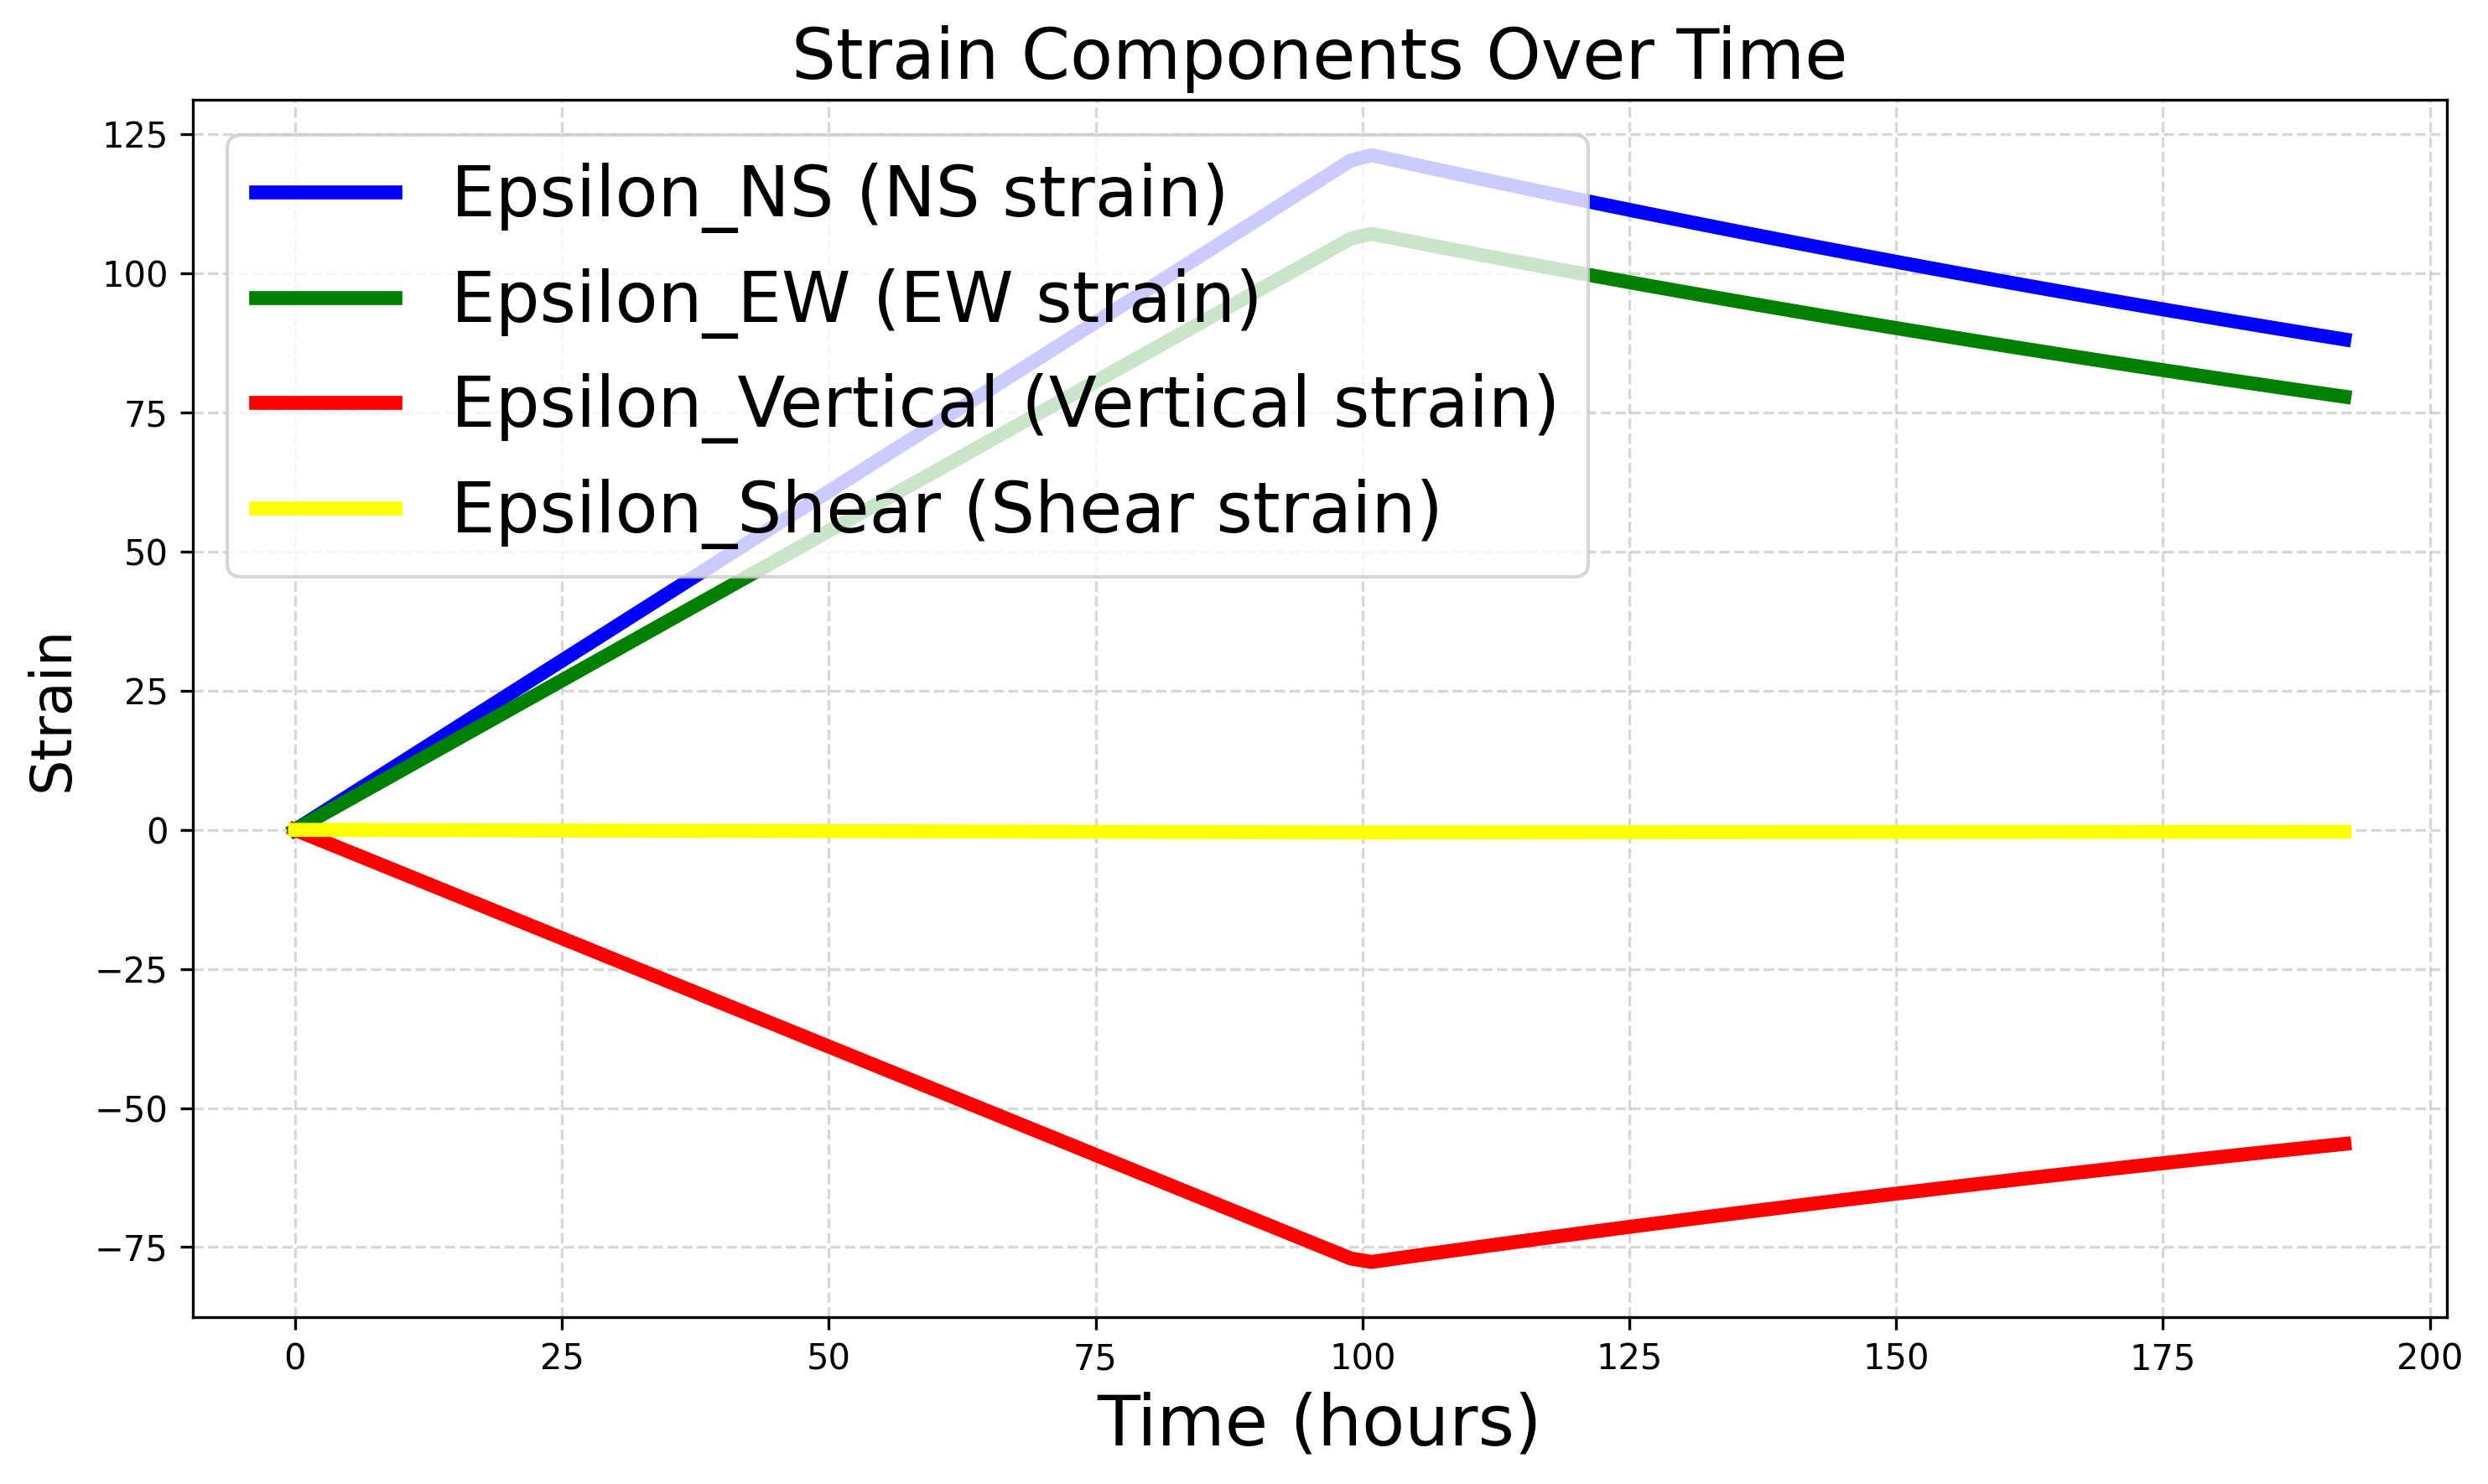

In [47]:
import pandas as pd
import numpy as np
import timeit

# Function for time series strain dataset
def strain_dataset(pmax, tpeak, d, time, x, y, z, a, b, c, nu, h, theta_deg):
    """
    Generates a dataset of strain tensor components and pressure over time.

    Parameters:
    - pmax: Maximum pressure (kPa).
    - tpeak: Time when the pressure reaches its peak (days).
    - d: Decay rate for pressure after tpeak.
    - time: Array of time values (days).
    - x, y, z: Coordinates of the observation point.
    - a, b, c: Geometry parameters of the inclusion.
    - nu: Poisson's ratio.
    - h: Depth of the inclusion.

    Returns:
    - DataFrame containing pressure, strain components for each time step.
    """
    # Calculate pressure over time
    pressure_values = pressure(pmax, tpeak, d, time)

    # Initialize lists to store strain components
    epsilon_ns = []
    epsilon_ew = []
    epsilon_vertical = []
    epsilon_shear = []

    for p in pressure_values:
        # Compute characteristic strain
        ec = charac_strain(linear_trans(alpha=0.8, nu=nu, p=p, E=10e9))

        # Compute the strain tensor
        strain_tensor = strain(x, y, z, a, b, c, ec, h, theta_deg)

        # Extract components changed this tensor orientations due to tilt from the angle theta_deg
        epsilon_ew.append(strain_tensor[0, 0])       # North-West strain
        epsilon_ns.append(strain_tensor[1, 1])       # East-West strain
        epsilon_vertical.append(strain_tensor[2, 2]) # Vertical strain
        epsilon_shear.append(strain_tensor[0, 1])    # Shear strain (xy component)

    # Create the dataset as a DataFrame
    dataset = pd.DataFrame({
        "Time (hours)": time *24,
        "Pressure (kPa)": pressure_values,
        "Epsilon_NS": epsilon_ns,
        "Epsilon_EW": epsilon_ew,
        "Epsilon_Vertical": epsilon_vertical,
        "Epsilon_Shear": epsilon_shear
    })

    return dataset

# Example parameters
pmax = 250000  # Maximum pressure (k\Pa)
tpeak = (100/24)  # Time to peak pressure (days)
d = 0.35  # Decay rate
time = np.linspace(0, 8, 100)  # Time array from 0 to 20 days


# x, y, z = 85, 12, 2450  # Coordinates # I changed this from x, y, z = 211.6, -62.9, 30
z = 30 # Measurement location for AVN2
a, b, c = 250, 300, 20  # Geometry changed a = 250, b= 300
nu, h = 0.25, 530  # Material and depth properties

# Generate the dataset
dataset = strain_dataset(pmax, tpeak, d, time, x, y, z, a, b, c, nu, h, theta_deg)

# Display the dataset
print(dataset)
dataset["Epsilon_NS"] = dataset["Epsilon_NS"] *1e9
dataset["Epsilon_EW"] = dataset["Epsilon_EW"] *1e9
dataset["Epsilon_Vertical"] = dataset["Epsilon_Vertical"] *1e9
dataset["Epsilon_Shear"] = dataset["Epsilon_Shear"] *1e9
# Optionally, save the dataset to a CSV file
dataset.to_csv("strain_pressure_dataset.csv", index=False)

# Plot the strain components over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=300)  # Set high resolution and figure size
plt.plot(dataset["Time (hours)"], dataset["Epsilon_NS"], label="Epsilon_NS (NS strain)", color='blue', linewidth=4)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_EW"], label="Epsilon_EW (EW strain)", color='green', linewidth=4)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_Vertical"], label="Epsilon_Vertical (Vertical strain)", color='red', linewidth=4)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_Shear"], label="Epsilon_Shear (Shear strain)", color='yellow', linewidth=4)

plt.xlabel("Time (hours)", fontsize=20)
plt.ylabel("Strain", fontsize=16)
plt.title("Strain Components Over Time", fontsize=20)
plt.legend(fontsize=20, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines with transparency
plt.tight_layout()  # Optimize layout for crisp rendering
%timeit strain_dataset(pmax, tpeak, d, time, x, y, z, a, b, c, nu, h, theta_deg)
plt.show()



In [48]:
result = main(x=85, y=12, z=2450, a = 175, b=25, c=125, nu =0.25, h=2500, p = 1e6, theta_deg=0)
print(result) # Print the array directly

[[ 5.14312335e-06 -5.01937091e-07  7.61376152e-07]
 [-5.01937091e-07  5.38579334e-05  7.21155857e-07]
 [ 7.61376152e-07  7.21155857e-07  7.66637473e-06]]


In [49]:
#

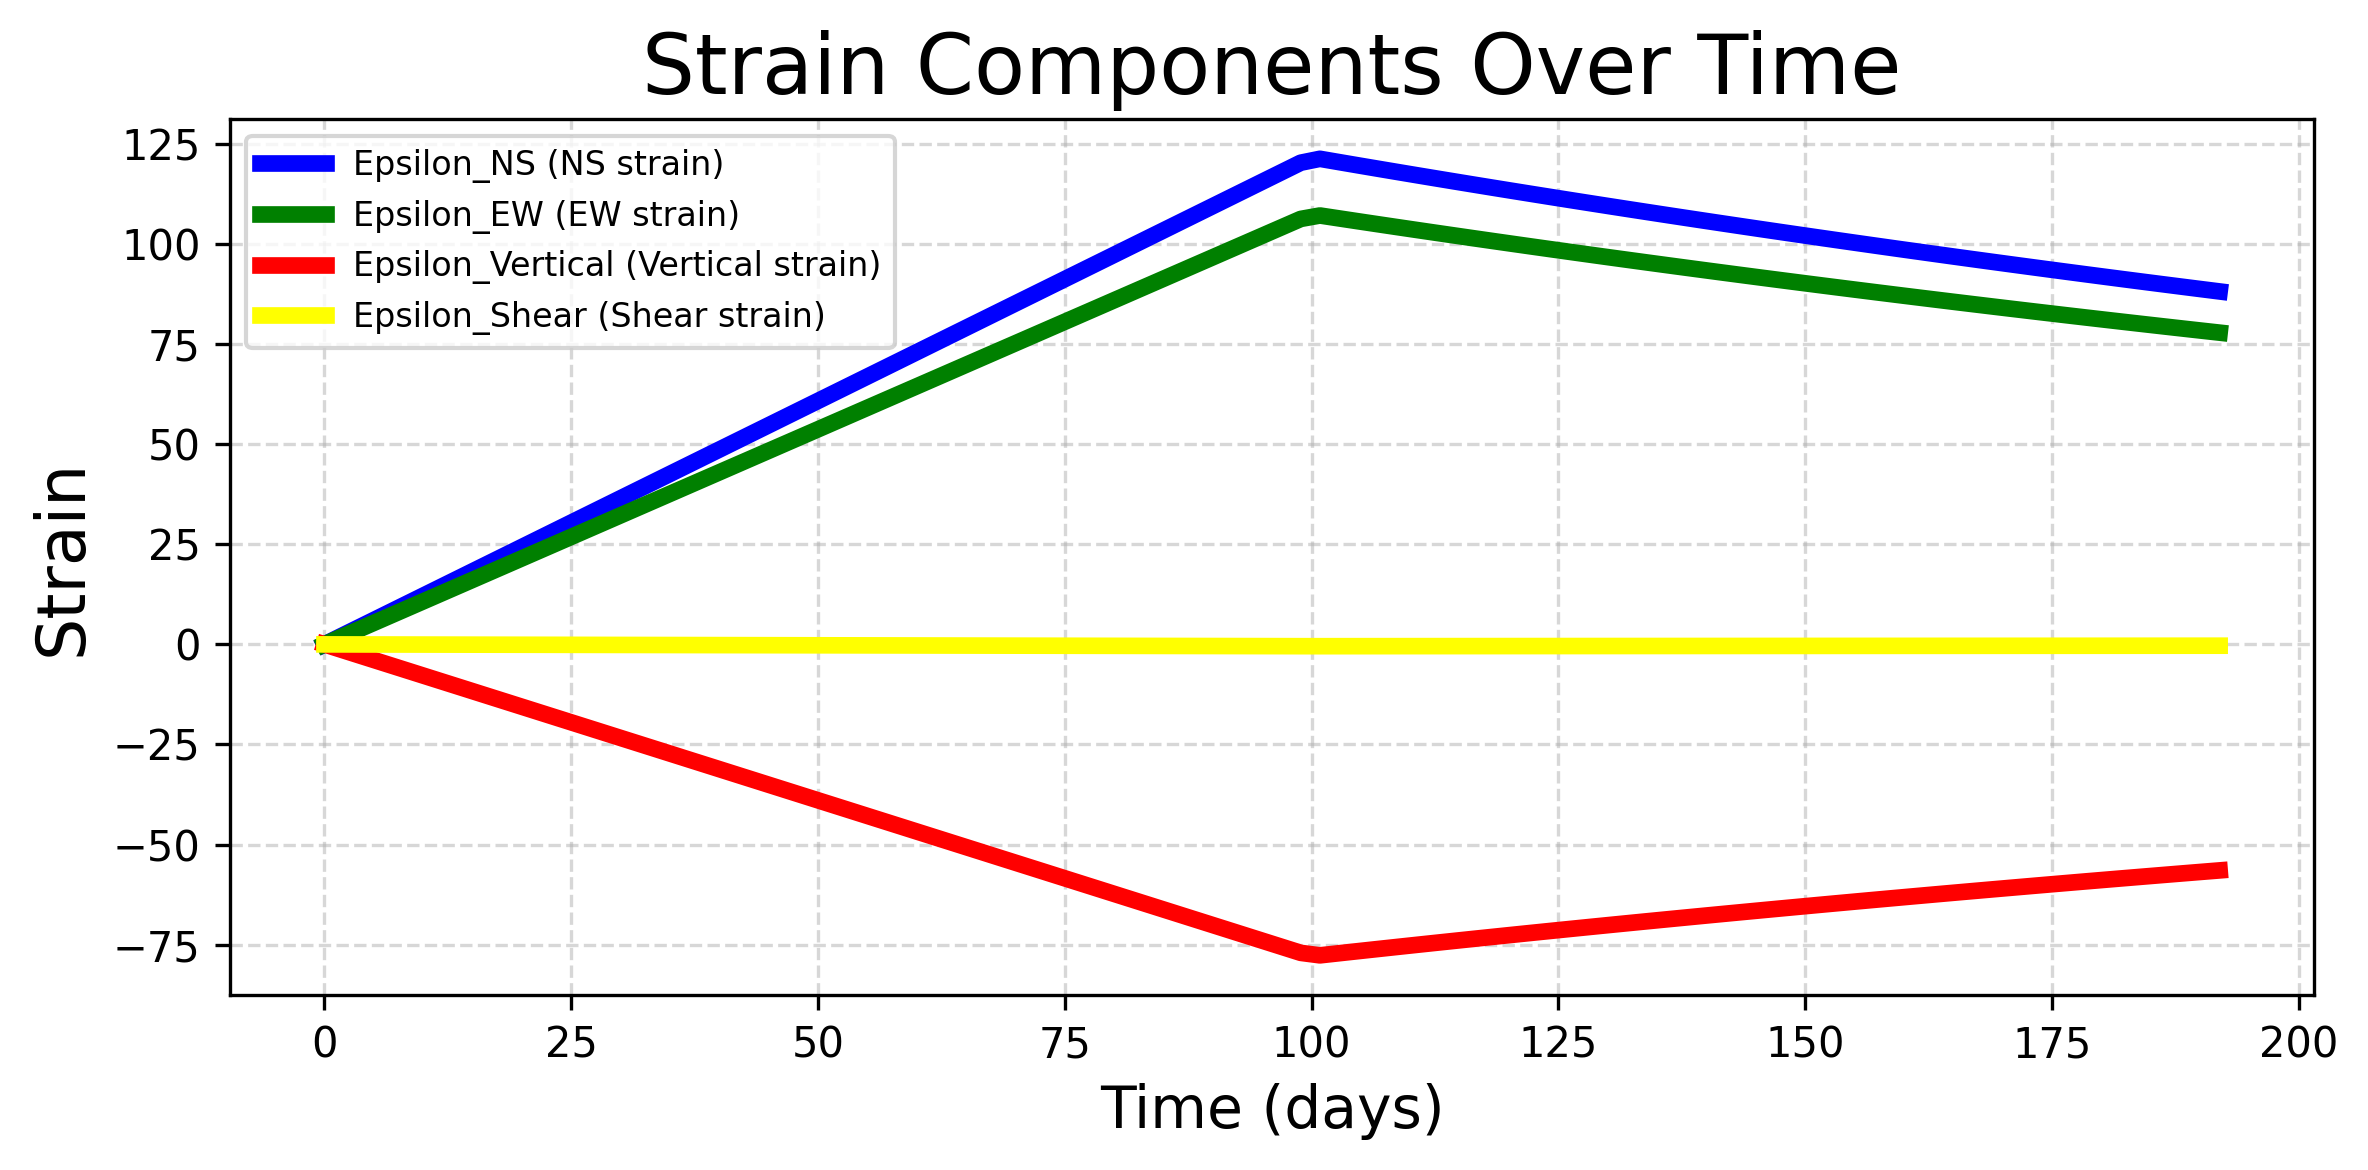

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4), dpi=300)  # Set high resolution and figure size

# Plot strain components
plt.plot(dataset["Time (hours)"], dataset["Epsilon_NS"], label="Epsilon_NS (NS strain)", color='blue', linewidth=4)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_EW"], label="Epsilon_EW (EW strain)", color='green', linewidth=4)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_Vertical"], label="Epsilon_Vertical (Vertical strain)", color='red', linewidth=4)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_Shear"], label="Epsilon_Shear (Shear strain)", color='yellow', linewidth=4)

plt.xlabel("Time (days)", fontsize=14)
plt.ylabel("Strain", fontsize=16)
plt.title("Strain Components Over Time", fontsize=20)
plt.legend(fontsize=8, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# **Save the plot as EPS**
plt.savefig("strain_plot.eps", format="eps", dpi=300)

# Show the plot
plt.show()


In [51]:
print(theta_deg)

-17.198541220065866


In [52]:
"""
# Compute ec separately
p = 250000  # Example pressure
E = 10e9  # Young's modulus
alpha = 0.8  # Biot coefficient
nu = 0.25  # Poisson's ratio
ec = charac_strain(linear_trans(alpha, nu, p, E))

# Compute strain in cross-section
fixed_y = -62.9
strain_ns = np.array([[strain(x, fixed_y, z, a, b, c, ec, h)[0, 0] for x in x_vals] for z in z_vals])
"""

"\n# Compute ec separately\np = 250000  # Example pressure\nE = 10e9  # Young's modulus\nalpha = 0.8  # Biot coefficient\nnu = 0.25  # Poisson's ratio\nec = charac_strain(linear_trans(alpha, nu, p, E))\n\n# Compute strain in cross-section\nfixed_y = -62.9\nstrain_ns = np.array([[strain(x, fixed_y, z, a, b, c, ec, h)[0, 0] for x in x_vals] for z in z_vals])\n"

In [53]:
def compute_relative_xyz(xp, yp, x0p, y0p, theta_deg, zg, inclusion_depth):
    """
    Converts primed coordinates (xp, yp) to the relative unprimed/global frame
    based on rotated inclusion geometry and fixed depth.

    Parameters:
    - xp, yp: Plan-view coordinates in primed system.
    - x0p, y0p: Inclusion center in primed system.
    - theta_deg: Rotation angle clockwise from north (defines inclusion orientation).
    - zg: Fixed global depth where strain is evaluated (e.g., 530 m).
    - inclusion_depth: Depth of inclusion center (positive downward).

    Returns:
    - x, y, z: Coordinates relative to inclusion center in rotated global frame.
    """
    # Convert angle to radians for rotation
    theta = np.radians(theta_deg)

    # Translate primed coordinates relative to inclusion center
    dxp = xp - x0p
    dyp = yp - y0p

    # Rotate into unprimed (global) frame aligned to inclusion axis
    x = dxp * np.cos(theta) + dyp * np.sin(theta)
    y = -dxp * np.sin(theta) + dyp * np.cos(theta)

    # With z positive downward
    z = zg - inclusion_depth

    return x, y, z


In [54]:
"""
import numpy as np
import matplotlib.pyplot as plt

# Define grid along the cross-section (fixed y value)
x_vals = np.linspace(200, 3000, 50)  # X range
Y_vals = np.linspace(10, 50, 50)  # Z range (Depth)
X, Y = np.meshgrid(x_vals, y_vals)

# Fixed parameters
fixed_z = 530
p = 250000  # Pressure
E = 10e9  # Young's modulus
alpha = 0.8  # Biot coefficient
nu = 0.25  # Poisson's ratio
ec = charac_strain(linear_trans(alpha, nu, p, E))  # Compute characteristic strain

# Compute strain components and scale them for visibility
strain_ns = np.array([[strain(x, fixed_z, y, a, b, c, ec, h, theta_deg)[0, 0] for x in x_vals] for y in y_vals]) * 1e9
strain_ew = np.array([[strain(x, fixed_z, y, a, b, c, ec, h, theta_deg)[1, 1] for x in x_vals] for y in y_vals]) * 1e9
strain_vertical = np.array([[strain(x, fixed_z, y, a, b, c, ec, h, theta_deg)[2, 2] for x in x_vals] for y in y_vals]) * 1e9

# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# NS Strain
cont1 = axes[0].contourf(X, Z, strain_ns, cmap='coolwarm')
fig.colorbar(cont1, ax=axes[0], label="Epsilon_NS")
axes[0].set_title("Cross-Sectional View of NS Strain")
axes[0].set_xlabel("X Coordinate")
axes[0].set_ylabel("Depth (Z)")

# EW Strain
cont2 = axes[1].contourf(X, Z, strain_ew, cmap='coolwarm')
fig.colorbar(cont2, ax=axes[1], label="Epsilon_EW")
axes[1].set_title("Cross-Sectional View of EW Strain")
axes[1].set_xlabel("X Coordinate")
axes[1].set_ylabel("Depth (Z)")

# Vertical Strain
cont3 = axes[2].contourf(X, Z, strain_vertical, cmap='coolwarm')
fig.colorbar(cont3, ax=axes[2], label="Epsilon_Vertical")
axes[2].set_title("Cross-Sectional View of Vertical Strain")
axes[2].set_xlabel("X Coordinate")
axes[2].set_ylabel("Depth (Z)")

plt.tight_layout()
plt.show()

# Create figure and axes for streamplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# NS Strain Streamplot
axes[0].streamplot(X, Z, strain_ns, strain_vertical, color="black", density=2)
axes[0].set_title("Strain Vector Field (NS & Vertical)")
axes[0].set_xlabel("X Coordinate")
axes[0].set_ylabel("Depth (Z)")

# EW Strain Streamplot
axes[1].streamplot(X, Y, strain_ew, strain_vertical, color="black", density=2)
axes[1].set_title("Strain Vector Field (EW & Vertical)")
axes[1].set_xlabel("X Coordinate")
axes[1].set_ylabel("Depth (Z)")

# Vertical Strain with NS as U component (for visualization)
axes[2].streamplot(X, Y, strain_ns, strain_ew, color="black", density=2)
axes[2].set_title("Strain Vector Field (NS & EW)")
axes[2].set_xlabel("X Coordinate")
axes[2].set_ylabel("Depth (Z)")


plt.tight_layout()
plt.show()
plt.savefig("strain_vector_field.eps", format="eps", dpi=600)

"""

'\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Define grid along the cross-section (fixed y value)\nx_vals = np.linspace(200, 3000, 50)  # X range\nY_vals = np.linspace(10, 50, 50)  # Z range (Depth)\nX, Y = np.meshgrid(x_vals, y_vals)\n\n# Fixed parameters\nfixed_z = 530\np = 250000  # Pressure\nE = 10e9  # Young\'s modulus\nalpha = 0.8  # Biot coefficient\nnu = 0.25  # Poisson\'s ratio\nec = charac_strain(linear_trans(alpha, nu, p, E))  # Compute characteristic strain\n\n# Compute strain components and scale them for visibility\nstrain_ns = np.array([[strain(x, fixed_z, y, a, b, c, ec, h, theta_deg)[0, 0] for x in x_vals] for y in y_vals]) * 1e9\nstrain_ew = np.array([[strain(x, fixed_z, y, a, b, c, ec, h, theta_deg)[1, 1] for x in x_vals] for y in y_vals]) * 1e9\nstrain_vertical = np.array([[strain(x, fixed_z, y, a, b, c, ec, h, theta_deg)[2, 2] for x in x_vals] for y in y_vals]) * 1e9\n\n# Create figure and axes\nfig, axes = plt.subplots(1, 3, figsize=(18, 6))\n\n# NS 

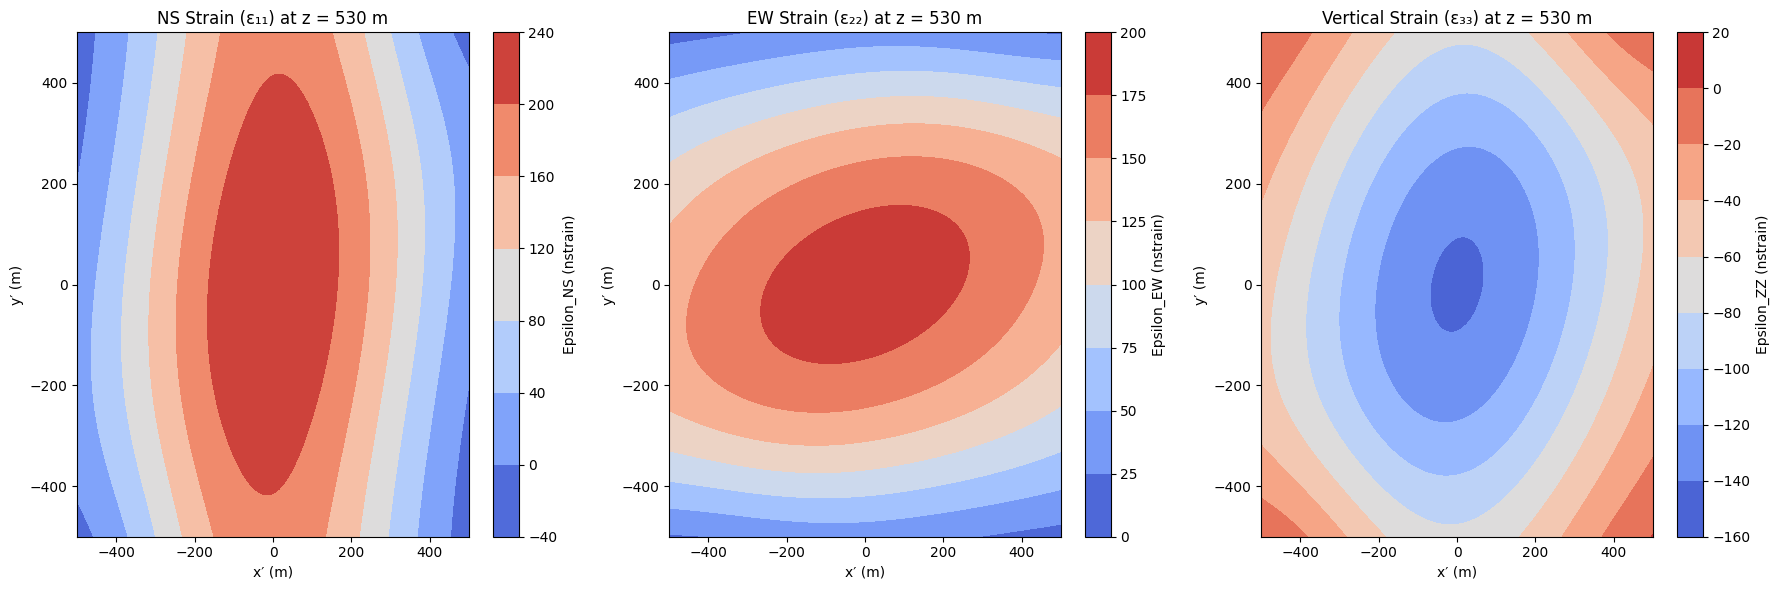

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed depth for plan view (e.g., 30 m or 530 m)
z_fixed_global = 530  # or 30

# Define inclusion center and depth in the primed system
# These values should be consistent with your problem setup
x0p = 0 # Example: x-coordinate of inclusion center in primed system
y0p = 0 # Example: y-coordinate of inclusion center in primed system
inclusion_depth = 530 # Example: Depth of the inclusion center (positive downward)


# Create grid in (x′, y′)
x_prime_vals = np.linspace(-500, 500, 100)
y_prime_vals = np.linspace(-500, 500, 100)  # cross-section left-right around injection
X_prime, Y_prime = np.meshgrid(x_prime_vals, y_prime_vals)

# Initialize strain arrays
strain_ns = np.zeros_like(X_prime)
strain_ew = np.zeros_like(X_prime)
strain_vert = np.zeros_like(X_prime)

# Ensure ec, h, nu, a, b, c, theta_deg are defined from previous cells or define them here
# Example placeholder values (replace with your actual values):
# ec = ... # Characteristic strain (should be defined based on pressure and material properties)
# h = inclusion_depth # Depth to the center of the inclusion (should be consistent with inclusion_depth)
# nu = 0.25 # Poisson's ratio
# a = 270 # Inclusion semi-dimension
# b = 550 # Inclusion semi-dimension
# c = 20 # Inclusion semi-dimension
# theta_deg = -17.199 # Rotation angle in degrees

# Assuming a representative pressure to calculate ec for this plot
representative_pressure = 250000 # Example pressure in kPa
# Ensure linear_trans and charac_strain functions are defined and accessible
# Ensure E and alpha are defined (Young's modulus and Biot coefficient)
# Example placeholder values (replace with your actual values):
E = 10e9 # Young's modulus (Pa)
alpha = 0.8 # Biot coefficient
nu = 0.25 # Poisson's ratio
a = 270 # Inclusion semi-dimension
b = 550 # Inclusion semi-dimension
c = 20 # Inclusion semi-dimension
h = inclusion_depth # Depth to the center of the inclusion
theta_deg = -17.199 # Rotation angle in degrees

ec = charac_strain(linear_trans(alpha=alpha, nu=nu, p=representative_pressure, E=E))


for i in range(X_prime.shape[0]):
    for j in range(X_prime.shape[1]):
        xp = X_prime[i, j]
        yp = Y_prime[i, j]
        zg = z_fixed_global

        try:
            x, y, z = compute_relative_xyz(xp, yp, x0p, y0p, theta_deg, zg, inclusion_depth)
            strain_tensor = strain(x, y, z, a, b, c, ec, h, theta_deg)

            strain_ns[i, j] = strain_tensor[0, 0]
            strain_ew[i, j] = strain_tensor[1, 1]
            strain_vert[i, j] = strain_tensor[2, 2]
        except Exception as e:
            print(f"Error at ({i}, {j}): {e}")
            strain_ns[i, j] = strain_ew[i, j] = strain_vert[i, j] = np.nan

# Convert to nanostrain
strain_ns *= 1e9
strain_ew *= 1e9
strain_vert *= 1e9

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# NS Strain
cont1 = axes[0].contourf(X_prime, Y_prime, strain_ns, cmap='coolwarm')
fig.colorbar(cont1, ax=axes[0], label="Epsilon_NS (nstrain)")
axes[0].set_title(f"NS Strain (ε₁₁) at z = {z_fixed_global} m")
axes[0].set_xlabel("x′ (m)")
axes[0].set_ylabel("y′ (m)")

# EW Strain
cont2 = axes[1].contourf(X_prime, Y_prime, strain_ew, cmap='coolwarm')
fig.colorbar(cont2, ax=axes[1], label="Epsilon_EW (nstrain)")
axes[1].set_title(f"EW Strain (ε₂₂) at z = {z_fixed_global} m")
axes[1].set_xlabel("x′ (m)")
axes[1].set_ylabel("y′ (m)")

# Vertical Strain
cont3 = axes[2].contourf(X_prime, Y_prime, strain_vert, cmap='coolwarm')
fig.colorbar(cont3, ax=axes[2], label="Epsilon_ZZ (nstrain)")
axes[2].set_title(f"Vertical Strain (ε₃₃) at z = {z_fixed_global} m")
axes[2].set_xlabel("x′ (m)")
axes[2].set_ylabel("y′ (m)")

plt.tight_layout()
plt.savefig(f"strain_plan_view_z{z_fixed_global}m.eps", format="eps", dpi=600)
plt.show()

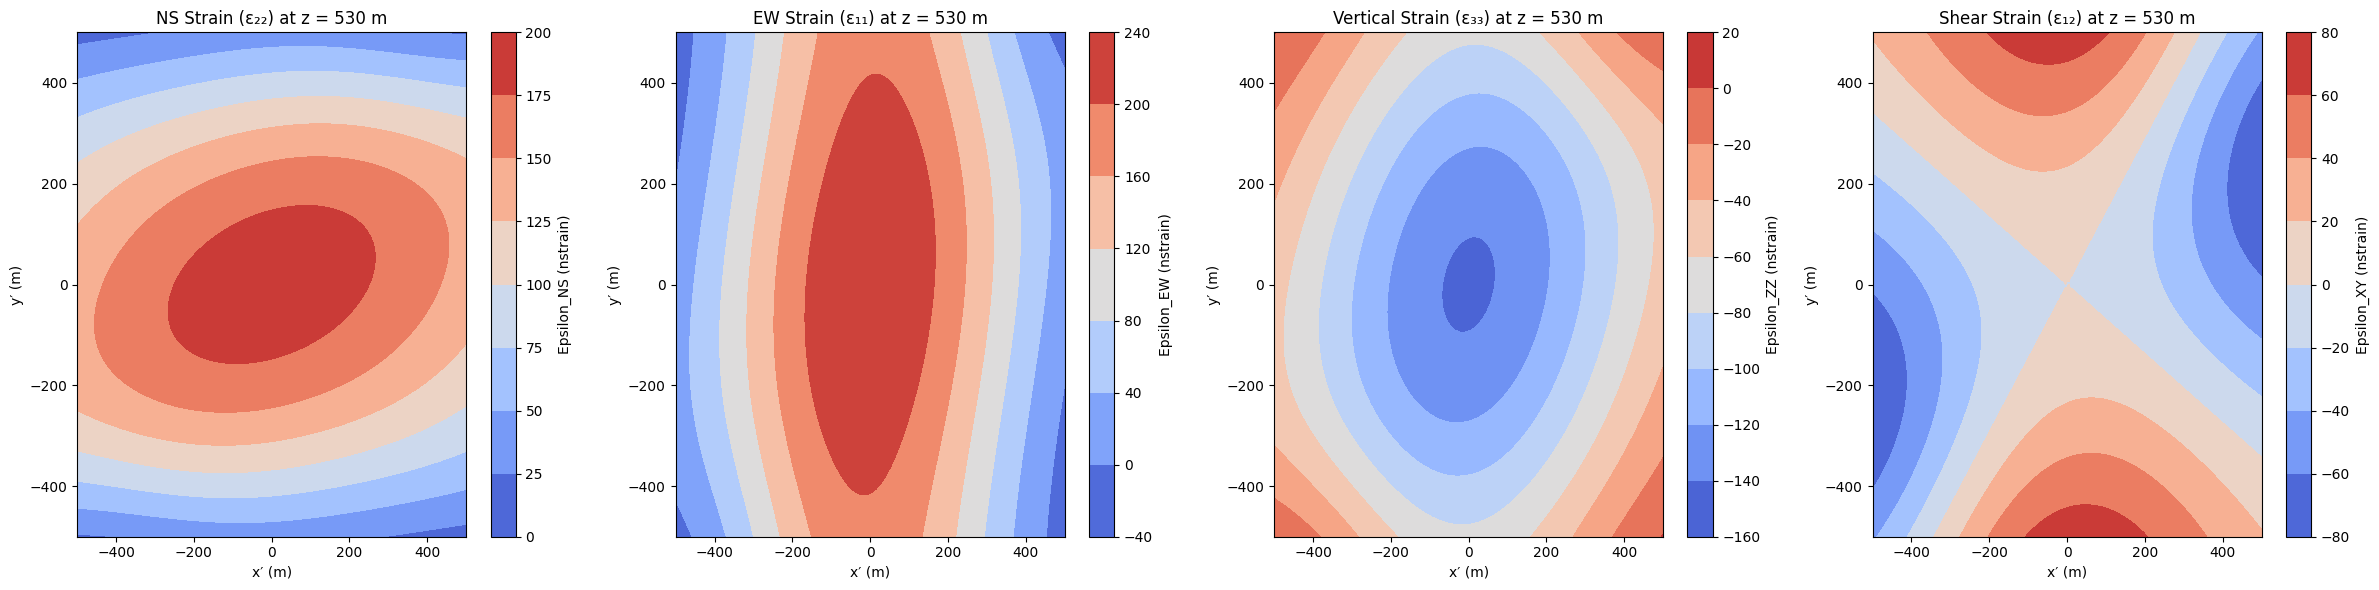

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed depth for plan view (e.g., 30 m or 530 m)
z_fixed_global = 530  # or 30

# Define inclusion center and depth in the primed system
# These values should be consistent with your problem setup
x0p = 0 # Example: x-coordinate of inclusion center in primed system
y0p = 0 # Example: y-coordinate of inclusion center in primed system
inclusion_depth = 530 # Example: Depth of the inclusion center (positive downward)

# Create grid in (x′, y′)
x_prime_vals = np.linspace(-500, 500, 100)
y_prime_vals = np.linspace(-500, 500, 100)
X_prime, Y_prime = np.meshgrid(x_prime_vals, y_prime_vals)

# Initialize strain arrays
strain_ns = np.zeros_like(X_prime)
strain_ew = np.zeros_like(X_prime)
strain_vert = np.zeros_like(X_prime)
strain_shear = np.zeros_like(X_prime)

# Ensure ec, h, nu, a, b, c, theta_deg are defined from previous cells or define them here
# Example placeholder values (replace with your actual values):
# ec = ... # Characteristic strain (should be defined based on pressure and material properties)
# h = inclusion_depth # Depth to the center of the inclusion (should be consistent with inclusion_depth)
# nu = 0.25 # Poisson's ratio
# a = 270 # Inclusion semi-dimension
# b = 550 # Inclusion semi-dimension
# c = 20 # Inclusion semi-dimension
# theta_deg = -17.199 # Rotation angle in degrees

# Assuming a representative pressure to calculate ec for this plot
representative_pressure = 250000 # Example pressure in kPa
# Ensure linear_trans and charac_strain functions are defined and accessible
# Ensure E and alpha are defined (Young's modulus and Biot coefficient)
# Example placeholder values (replace with your actual values):
E = 10e9 # Young's modulus (Pa)
alpha = 0.8 # Biot coefficient
nu = 0.25 # Poisson's ratio
a = 270 # Inclusion semi-dimension
b = 550 # Inclusion semi-dimension
c = 20 # Inclusion semi-dimension
h = inclusion_depth # Depth to the center of the inclusion
theta_deg = -17.199 # Rotation angle in degrees

ec = charac_strain(linear_trans(alpha=alpha, nu=nu, p=representative_pressure, E=E))


for i in range(X_prime.shape[0]):
    for j in range(X_prime.shape[1]):
        xp = X_prime[i, j]
        yp = Y_prime[i, j]
        zg = z_fixed_global

        try:
            x, y, z = compute_relative_xyz(xp, yp, x0p, y0p, theta_deg, zg, inclusion_depth)
            strain_tensor = strain(x, y, z, a, b, c, ec, h, theta_deg)

            strain_ns[i, j] = strain_tensor[1, 1]  # y′–y′ → North–South
            strain_ew[i, j] = strain_tensor[0, 0]  # x′–x′ → East–West
            strain_vert[i, j] = strain_tensor[2, 2]
            strain_shear[i, j] = strain_tensor[0, 1]  # ε₁₂ (xy shear strain)
        except Exception as e:
            print(f"Error at ({i}, {j}): {e}")
            strain_ns[i, j] = strain_ew[i, j] = strain_vert[i, j] = strain_shear[i, j] = np.nan

# Convert to nanostrain
strain_ns *= 1e9
strain_ew *= 1e9
strain_vert *= 1e9
strain_shear *= 1e9

# Plotting
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# NS Strain
cont1 = axes[0].contourf(X_prime, Y_prime, strain_ns, cmap='coolwarm')
fig.colorbar(cont1, ax=axes[0], label="Epsilon_NS (nstrain)")
axes[0].set_title(f"NS Strain (ε₂₂) at z = {z_fixed_global} m")
axes[0].set_xlabel("x′ (m)")
axes[0].set_ylabel("y′ (m)")

# EW Strain
cont2 = axes[1].contourf(X_prime, Y_prime, strain_ew, cmap='coolwarm')
fig.colorbar(cont2, ax=axes[1], label="Epsilon_EW (nstrain)")
axes[1].set_title(f"EW Strain (ε₁₁) at z = {z_fixed_global} m")
axes[1].set_xlabel("x′ (m)")
axes[1].set_ylabel("y′ (m)")

# Vertical Strain
cont3 = axes[2].contourf(X_prime, Y_prime, strain_vert, cmap='coolwarm')
fig.colorbar(cont3, ax=axes[2], label="Epsilon_ZZ (nstrain)")
axes[2].set_title(f"Vertical Strain (ε₃₃) at z = {z_fixed_global} m")
axes[2].set_xlabel("x′ (m)")
axes[2].set_ylabel("y′ (m)")

# Shear Strain
cont4 = axes[3].contourf(X_prime, Y_prime, strain_shear, cmap='coolwarm')
fig.colorbar(cont4, ax=axes[3], label="Epsilon_XY (nstrain)")
axes[3].set_title(f"Shear Strain (ε₁₂) at z = {z_fixed_global} m")
axes[3].set_xlabel("x′ (m)")
axes[3].set_ylabel("y′ (m)")

plt.tight_layout()
plt.savefig(f"strain_plan_view_with_shear_z{z_fixed_global}m.eps", format="eps", dpi=600)
plt.show()

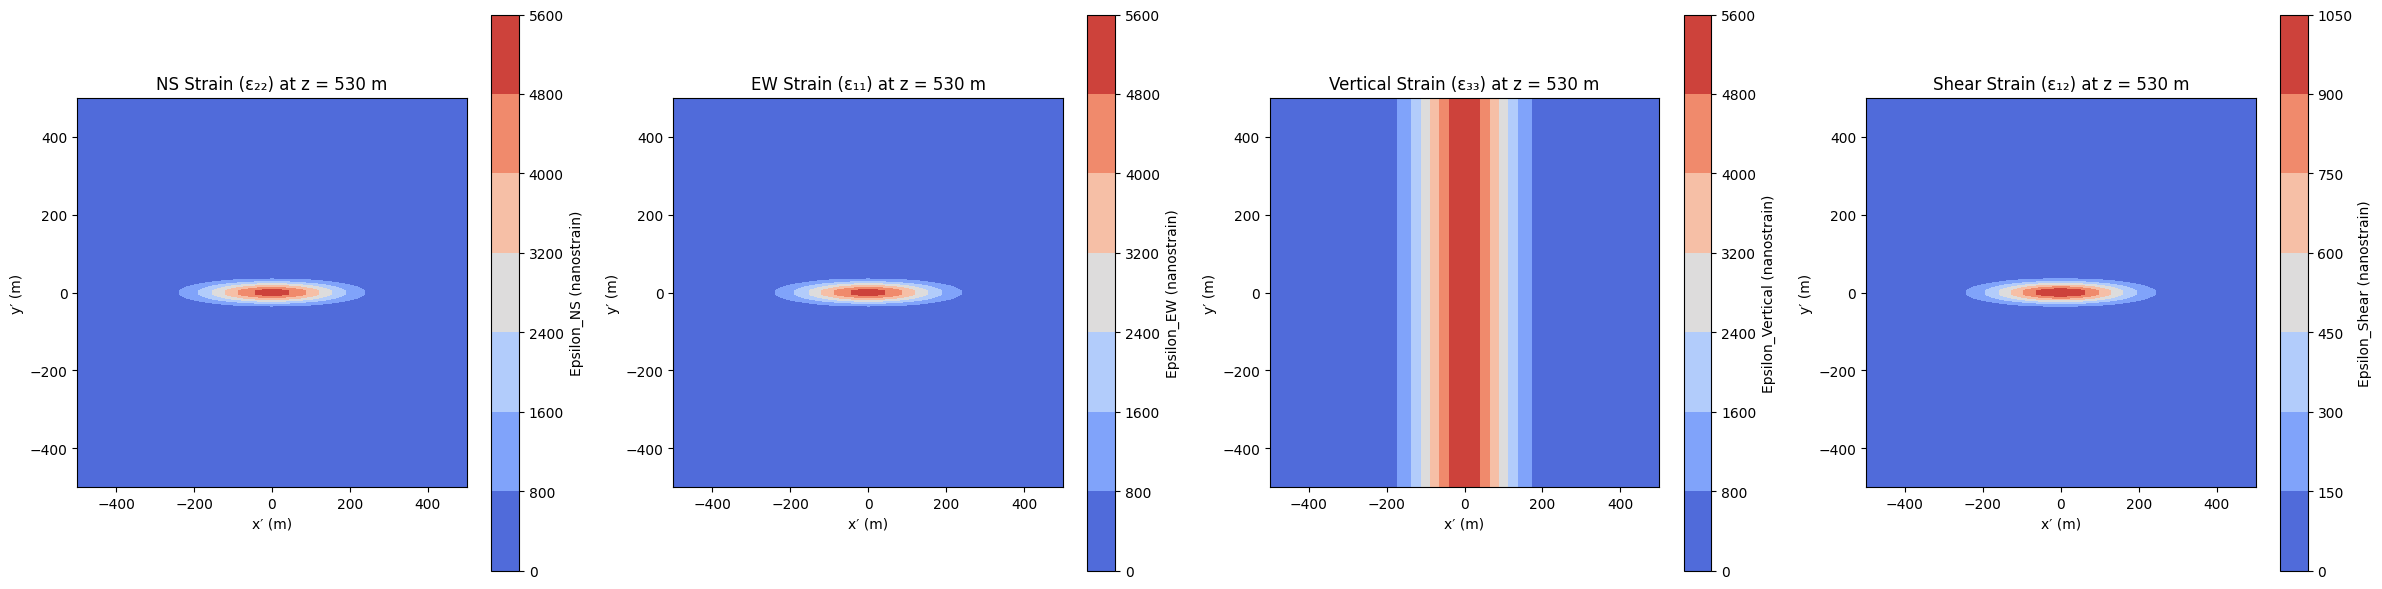

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Inclusion and Material Parameters (Example 2)
# ----------------------------
a, b, c = 175, 25, 125              # Semi-dimensions (m)
h = 2500                            # Depth to center (m)
p = 1e6                             # Pressure (Pa)
nu = 0.25                           # Poisson's ratio
E = 10e9                            # Young's modulus (Pa)
alpha = 0.8                         # Biot coefficient

# Characteristic strain
def linear_trans(alpha, nu, p, E):
    return (alpha * (1 - 2 * nu) * p) / E

def charac_strain(e_lin):
    return (1 / (4 * np.pi)) * ((1 + nu) / (1 - nu)) * e_lin

ec = charac_strain(linear_trans(alpha, nu, p, E))

# ----------------------------
# Rotation Setup
# ----------------------------
theta_deg = 0      # For now, no rotation to preserve symmetry
x0p, y0p = 0, 0     # Center of inclusion in primed system
inclusion_depth = h

# Coordinate transformation
def compute_relative_xyz(xp, yp, x0p, y0p, theta_deg, zg, z0):
    theta = np.radians(theta_deg)
    dx = xp - x0p
    dy = yp - y0p
    x = dx * np.cos(theta) + dy * np.sin(theta)
    y = -dx * np.sin(theta) + dy * np.cos(theta)
    z = zg - z0
    return x, y, z

# Analytical strain function placeholder
def strain(x, y, z, a, b, c, ec, h, theta_deg):
    # Replace this with your actual strain tensor function
    # Dummy symmetric tensor for plotting
    return np.array([
        [np.exp(-((x/a)**2 + (y/b)**2)), 0.2*np.exp(-((x/a)**2 + (y/b)**2)), 0],
        [0.2*np.exp(-((x/a)**2 + (y/b)**2)), np.exp(-((x/a)**2 + (y/b)**2)), 0],
        [0, 0, np.exp(-((x/c)**2))]
    ]) * ec * 1e9  # Output in nanostrain

# ----------------------------
# Grid for Plan View at fixed depth (z′)
# ----------------------------
z_fixed_global = 530  # You can try z = h (2500) for mid-section or others

grid_range = 500       # Grid spans ±500 m around center
x_prime_vals = np.linspace(-grid_range, grid_range, 100)
y_prime_vals = np.linspace(-grid_range, grid_range, 100)
X_prime, Y_prime = np.meshgrid(x_prime_vals, y_prime_vals)

strain_ns = np.zeros_like(X_prime)
strain_ew = np.zeros_like(X_prime)
strain_vert = np.zeros_like(X_prime)
strain_shear = np.zeros_like(X_prime)

# ----------------------------
# Strain Tensor Evaluation Over Grid
# ----------------------------
for i in range(X_prime.shape[0]):
    for j in range(X_prime.shape[1]):
        xp = X_prime[i, j]
        yp = Y_prime[i, j]
        zg = z_fixed_global

        try:
            x, y, z = compute_relative_xyz(xp, yp, x0p, y0p, theta_deg, zg, inclusion_depth)
            tensor = strain(x, y, z, a, b, c, ec, h, theta_deg)
            strain_ew[i, j] = tensor[0, 0]
            strain_ns[i, j] = tensor[1, 1]
            strain_vert[i, j] = tensor[2, 2]
            strain_shear[i, j] = tensor[0, 1]
        except Exception as e:
            print(f"Error at ({i}, {j}): {e}")
            strain_ns[i, j] = strain_ew[i, j] = strain_vert[i, j] = strain_shear[i, j] = np.nan

# ----------------------------
# Plotting Strain Contours in Plan View
# ----------------------------
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
strain_labels = ["Epsilon_NS", "Epsilon_EW", "Epsilon_Vertical", "Epsilon_Shear"]
strain_fields = [strain_ns, strain_ew, strain_vert, strain_shear]
titles = [
    f"NS Strain (ε₂₂) at z = {z_fixed_global} m",
    f"EW Strain (ε₁₁) at z = {z_fixed_global} m",
    f"Vertical Strain (ε₃₃) at z = {z_fixed_global} m",
    f"Shear Strain (ε₁₂) at z = {z_fixed_global} m"
]

for ax, data, label, title in zip(axes, strain_fields, strain_labels, titles):
    cont = ax.contourf(X_prime, Y_prime, data, cmap='coolwarm')
    fig.colorbar(cont, ax=ax, label=f"{label} (nanostrain)")
    ax.set_title(title)
    ax.set_xlabel("x′ (m)")
    ax.set_ylabel("y′ (m)")
    ax.set_aspect('equal')

plt.tight_layout()
plt.savefig(f"strain_plan_view_z{z_fixed_global}m.eps", format="eps", dpi=600)
plt.show()


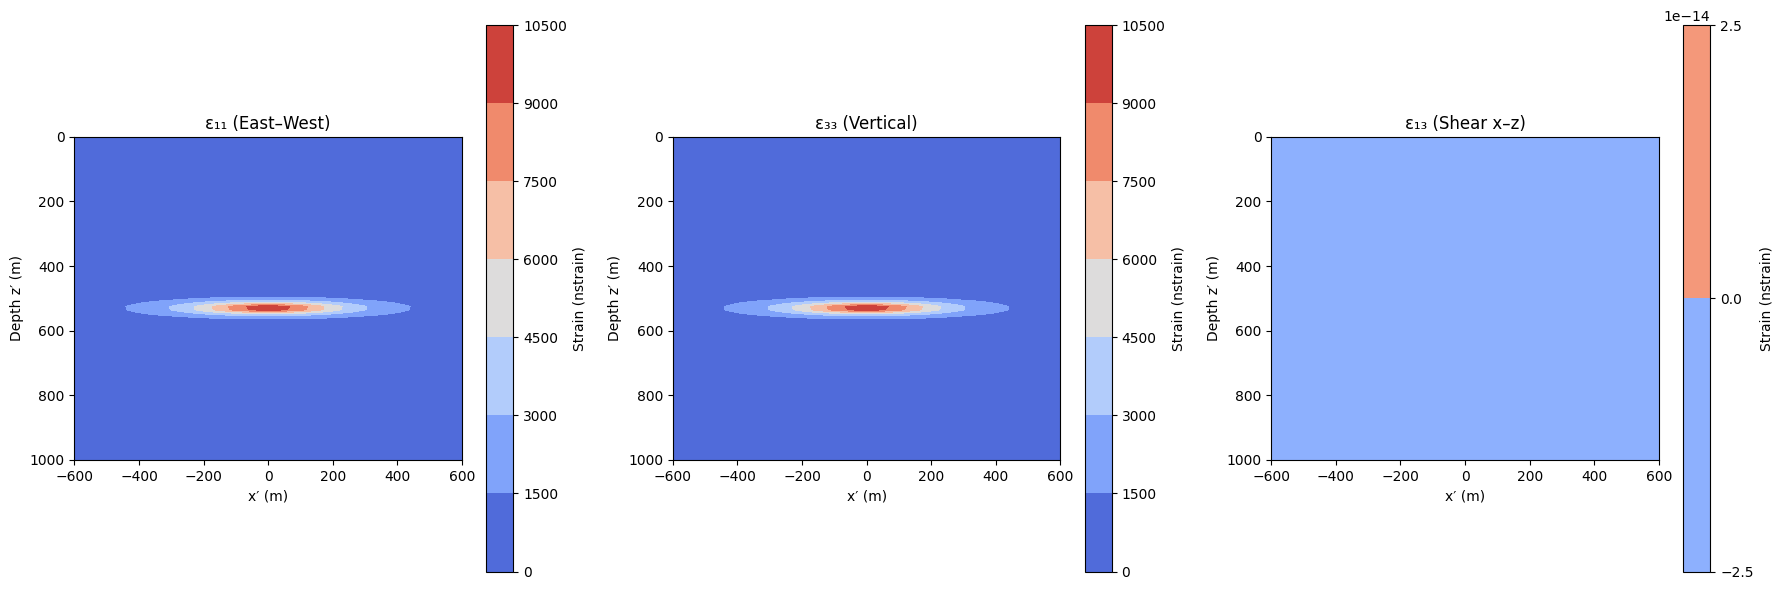

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Inclusion and material properties
a, b, c = 270, 550, 20
h = 530
p = 1e6
E = 1e10
nu = 0.25
alpha = 0.8
theta_deg = 0
y_prime_fixed = 0

def linear_trans(alpha, nu, p, E):
    return (alpha * (1 - 2 * nu) * p) / E

def charac_strain(e_lin):
    return (1 / (4 * np.pi)) * ((1 + nu) / (1 - nu)) * e_lin

ec = charac_strain(linear_trans(alpha, nu, p, E))

# Coordinate transform: primed → global → inclusion-centered
def compute_relative_xyz(xp, yp, x0p, y0p, theta_deg, zg, z0):
    theta = np.radians(theta_deg)
    dx = xp - x0p
    dy = yp - y0p
    x = dx * np.cos(theta) + dy * np.sin(theta)
    y = -dx * np.sin(theta) + dy * np.cos(theta)
    z = zg - z0
    return x, y, z

# Displacement gradient integrals
def delta(i, j): return 1 if i == j else 0

def v20(i, j, x, y, z, a, b, c):
    denom = np.sqrt((x + a)**2 + (y + b)**2 + (z + c)**2)
    return (delta(i, j) / denom) + (x * y * z / denom**3)

def v30(i, j, x, y, z, a, b, c):
    denom = ((x / a)**2 + (y / b)**2 + (z / c)**2 + 1)**1.5
    return delta(i, j) / denom

# Full strain tensor
def strain(i, j, x, y, z, a, b, c, ec, h, theta_deg):
    xx, yy, zz = x, y, z
    term1 = v20(i, j, xx, yy, zz, a, b, c)
    term2 = v20(j, i, xx, yy, zz, a, b, c)
    term3 = v30(i, j, xx, yy, zz, a, b, c)
    term4 = v30(j, i, xx, yy, zz, a, b, c)
    return ec * (term1 + term2 + term3 + term4)

# Grid setup for vertical slice (x′–z′)
x_prime_vals = np.linspace(-600, 600, 100)
z_vals = np.linspace(0, 1000, 100)
X_prime, Z = np.meshgrid(x_prime_vals, z_vals)

strain_xx = np.zeros_like(X_prime)
strain_zz = np.zeros_like(X_prime)
strain_xz = np.zeros_like(X_prime)

for i in range(X_prime.shape[0]):
    for j in range(X_prime.shape[1]):
        xp = X_prime[i, j]
        yp = y_prime_fixed
        zg = Z[i, j]

        try:
            x, y, z = compute_relative_xyz(xp, yp, 0, 0, theta_deg, zg, h)

            strain_xx[i, j] = strain(0, 0, x, y, z, a, b, c, ec, h, theta_deg)
            strain_zz[i, j] = strain(2, 2, x, y, z, a, b, c, ec, h, theta_deg)
            strain_xz[i, j] = strain(0, 2, x, y, z, a, b, c, ec, h, theta_deg)
        except Exception as e:
            print(f"Error at ({i},{j}): {e}")
            strain_xx[i, j] = strain_zz[i, j] = strain_xz[i, j] = np.nan

# Convert to nanostrain
strain_xx *= 1e9
strain_zz *= 1e9
strain_xz *= 1e9

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles = ["ε₁₁ (East–West)", "ε₃₃ (Vertical)", "ε₁₃ (Shear x–z)"]
fields = [strain_xx, strain_zz, strain_xz]

for ax, data, title in zip(axes, fields, titles):
    cont = ax.contourf(X_prime, Z, data, cmap='coolwarm')
    fig.colorbar(cont, ax=ax, label="Strain (nstrain)")
    ax.set_title(title)
    ax.set_xlabel("x′ (m)")
    ax.set_ylabel("Depth z′ (m)")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_aspect('equal')

plt.tight_layout()
plt.savefig("strain_cross_section_xz_full_tensor.eps", format="eps", dpi=600)
plt.show()


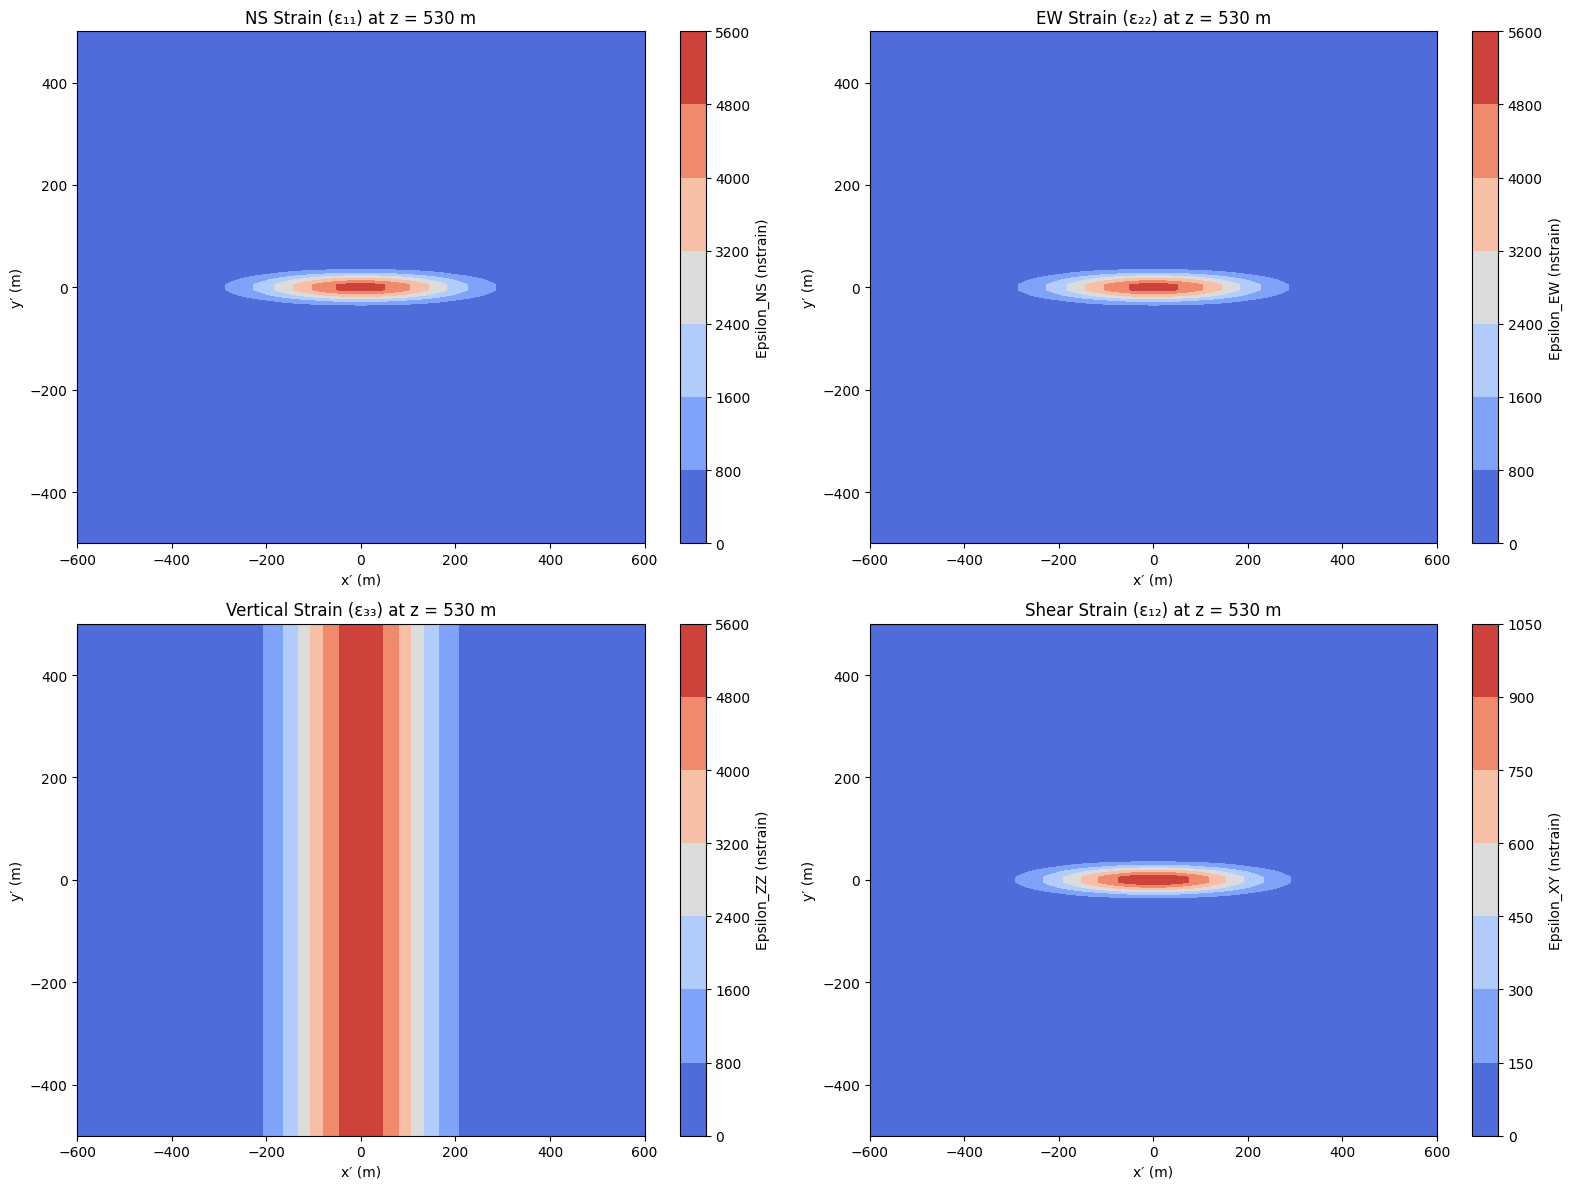

In [59]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows, 2 columns

# NS Strain (ε₁₁)
cont1 = axes[0, 0].contourf(X_prime, Y_prime, strain_ns, cmap='coolwarm')
fig.colorbar(cont1, ax=axes[0, 0], label="Epsilon_NS (nstrain)")
axes[0, 0].set_title(f"NS Strain (ε₁₁) at z = {z_fixed_global} m")
axes[0, 0].set_xlabel("x′ (m)")
axes[0, 0].set_ylabel("y′ (m)")

# EW Strain (ε₂₂)
cont2 = axes[0, 1].contourf(X_prime, Y_prime, strain_ew, cmap='coolwarm')
fig.colorbar(cont2, ax=axes[0, 1], label="Epsilon_EW (nstrain)")
axes[0, 1].set_title(f"EW Strain (ε₂₂) at z = {z_fixed_global} m")
axes[0, 1].set_xlabel("x′ (m)")
axes[0, 1].set_ylabel("y′ (m)")

# Vertical Strain (ε₃₃)
cont3 = axes[1, 0].contourf(X_prime, Y_prime, strain_vert, cmap='coolwarm')
fig.colorbar(cont3, ax=axes[1, 0], label="Epsilon_ZZ (nstrain)")
axes[1, 0].set_title(f"Vertical Strain (ε₃₃) at z = {z_fixed_global} m")
axes[1, 0].set_xlabel("x′ (m)")
axes[1, 0].set_ylabel("y′ (m)")

# Shear Strain (ε₁₂)
cont4 = axes[1, 1].contourf(X_prime, Y_prime, strain_shear, cmap='coolwarm')
fig.colorbar(cont4, ax=axes[1, 1], label="Epsilon_XY (nstrain)")
axes[1, 1].set_title(f"Shear Strain (ε₁₂) at z = {z_fixed_global} m")
axes[1, 1].set_xlabel("x′ (m)")
axes[1, 1].set_ylabel("y′ (m)")

plt.tight_layout()
plt.savefig(f"strain_plan_view_with_shear_z{z_fixed_global}m_2x2.eps", format="eps", dpi=600)
plt.show()


In [60]:
!pip install pydream

In [61]:
!git clone https://github.com/LoLab-VU/PyDREAM.git

fatal: destination path 'PyDREAM' already exists and is not an empty directory.


In [62]:
# Define the forward model.
import pydream
import numpy as np
import pandas as pd

# Assuming charac_strain, and linear_trans are defined in other cells and accessible
# Assuming R_n, delta, deltamod, V0, and pressure are defined globally and accessible

def forward_model(params, time, x, y, z, nu, h, pmax, tpeak, d):
    """
    Forward model to compute strain tensor components given parameters.
    Scales output to nanostrain for compatibility with observed data.
    """
    a, b, c, E, theta_deg = params  # Parameters to estimate
    pressure_values = pressure(pmax, tpeak, d, time)

    # Redefine necessary functions locally to ensure correct definitions are used

    def C_matrix(x, y, z, a, b, c, theta_deg=0):
        # Step 1: Define the center
        center = np.array([x, y, z])

        # Step 2: Build the cuboid (same as before)
        corners = np.array([
            [x - a, y - b, z - c],
            [x + a, y - b, z - c],
            [x + a, y + b, z - c],
            [x - a, y + b, z - c],
            [x - a, y + b, z + c],
            [x - a, y - b, z + c],
            [x + a, y - b, z + c],
            [x + a, y + b, z + c]
        ])

        # Step 3: Apply rotation if needed
        if theta_deg != 0:
            # Assuming rotate_z is defined globally and accessible
            corners = rotate_z(corners, theta_deg, origin=center)

        return corners

    def R_n(n,C):
      return np.linalg.norm(C[n])

    def delta(i,j):
      return int(i==j)

    deltamod = np.array([[0,1,0],[0,0,1],[1,0,0]])


    def v10(x,y,z,a,b,c,theta_deg=0):
       C = C_matrix(x,y,z,a,b,c,theta_deg)
       R_n_list = [R_n(n,C) for n in range(8)]
       result = np.zeros(3)
       for i in range(3):
        for n in range(8):
            result[i] += ((-1)**(n+1)) * ((C[n,(i+1)%3])*np.log(R_n_list[n]+C[n,(i+2)%3])+C[n,(i+2)%3]*np.log(R_n_list[n]+C[n,(i+1)%3]) - (C[n,i])*np.arctan((C[n,(i+1)%3]*C[n,(i+2)%3])/(C[n,i]*R_n_list[n])))
       return result

    def v20(x,y,z,a,b,c,theta_deg=0):
       C = C_matrix(x,y,z,a,b,c,theta_deg)
       R_n_list = [R_n(n,C) for n in range(8)]
       result = np.zeros([3,3])
       for i in range(3):
        for j in range(3):
          for n in range(8):
            result[i,j] += ((-1)**(n+1)) * ((deltamod[i,j] * np.log(C[n, (j+1)%3] + R_n_list[n])) + deltamod[j,i] * np.log(C[n, (i+1)%3] + R_n_list[n]) - delta(i,j) * np.arctan((C[n,(i+1)%3]*C[n,(i+2)%3])/(C[n,i]*R_n_list[n])))
       return result

    def v30(x,y,z,a,b,c,theta_deg=0):
       C = C_matrix(x,y,z,a,b,c,theta_deg)
       R_n_list = [R_n(n,C) for n in range(8)]
       result = np.zeros([3,3])
       for i in range(3):
        for j in range(3):
          for n in range(8):
            result[i,j] += ((-1)**(n+1)) * (((deltamod[i,j] * (C[n, 2] + delta(i,0) * R_n_list[n]))/ (R_n_list[n] * (C[n, (i+2)%3] + R_n_list[n]))) + ((deltamod[j,i] * (C[n, 2] + delta(j,0) * R_n_list[n]))/ ((R_n_list[n] * (C[n, (j+2)%3] + R_n_list[n])))) - delta(i,j) * ((C[n, 0] * C[n, 1] *((1 - 2 * delta(i, 2)) * ((R_n_list[n]) ** 2) - (C[n, 2]**2))) / (R_n_list[n] * ((C[n, i] **2) * (R_n_list[n] **2)  + (C[n, (i+ 1)% 3] **2) * ((C[n, (i+ 2)% 3]) **2)))))
       return result

    def disp(x,y,z,a,b,c, ec, h, theta_deg=0):
      result = np.zeros(3)
      V101 = v10(x,y,z-h,a,b,c, theta_deg)
      V102 = v10(x,y,-z-h,a,b,c, theta_deg)
      v201 = v20(x,y,-z-h,a,b,c, theta_deg)
      for i in range(3):
        result[i] = -ec * (V101[i]+ (3 - 4 * nu) * V102[i] - 2 *(1 - 2 * delta(i,2))*z * v201[i,2])
      return result

    def disp_prime(x,y,z,a,b,c, ec, h, theta_deg=0):
      v201 = v20(x,y,z-h,a,b,c,theta_deg)
      v202 = v20(x,y,-z-h,a,b,c,theta_deg)
      v301 = v30(x,y,-z-h,a,b,c,theta_deg)
      result = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
           result[i,j] = -ec * (v201[i,j] + ((3 - 4 * nu) * (1 - 2 * delta(j,2)) - 2 * (1 - 2 * delta(i, 2)) * delta(j,2)) * v202[i,j] + (-2)*(1- 2 * delta(i,2))*(1- 2 * delta(j,2)) * z * v301[i,j])
      return result


    def strain(x,y,z,a,b,c, ec, h, theta_deg):
      local_disp_prime = disp_prime(x,y,z,a,b,c, ec, h, theta_deg)
      result = np.zeros([3,3])
      for i in range(3):
        for j in range(3):
          result[i,j] = 0.5 * (local_disp_prime[i,j] + local_disp_prime[j, i])
      return result


    # Initialize empty lists for strain components
    epsilon_ns = []
    epsilon_ew = []
    epsilon_vertical = []
    epsilon_shear = []

    for p in pressure_values:
        ec = charac_strain(linear_trans(alpha=0.8, nu=nu, p=p, E=E))
        # Ensure the correct strain function is called with all arguments
        strain_tensor = strain(x, y, z, a, b, c, ec, h, theta_deg)

        # Append raw strain components
        epsilon_ew.append(strain_tensor[0, 0])
        epsilon_ns.append(strain_tensor[1, 1])
        epsilon_vertical.append(strain_tensor[2, 2])
        epsilon_shear.append(strain_tensor[0, 1])

    # Scale all strain components to nanostrain
    strain_array = np.array([
        epsilon_ns,
        epsilon_ew,
        epsilon_vertical,
        epsilon_shear
    ]) * 1e9  # Unit adjustment to match observed_data

    return strain_array

In [63]:
# Define the likelihood function.
def likelihood(params, observed_data, time, x, y, z, nu, h,pmax, tpeak, d):
    """
    Likelihood function to compare observed and predicted strain data.
    """
    predicted_data = forward_model(params, time, x, y, z, nu, h,pmax, tpeak, d)
    residuals = observed_data - predicted_data
    sigma = 10  # Assumed noise level in the data
    return -0.5 * np.sum((residuals / sigma) ** 2)

In [64]:
def likelihood(params, observed_data, time, x, y, z, nu, pmax, h, tpeak, d):
    predicted_data = forward_model(params, time, x, y, z, nu, h, pmax, tpeak, d)
    residuals = observed_data - predicted_data
    sigma = np.std(observed_data)  # Or set to a fixed realistic value like 10
    return -0.5 * np.sum((residuals / sigma) ** 2)


In [ ]:
# Running the core of pydreamz

from pydream.core import run_dream
from pydream.parameters import SampledParam
from scipy.stats import norm
import numpy as np

# Define priors for parameters
param_priors = [
    SampledParam(norm, loc=270, scale=50),   # Prior for 'a'
    SampledParam(norm, loc=550, scale=100),  # Prior for 'b'
    SampledParam(norm, loc=20, scale=10),    # Prior for 'c'
    SampledParam(norm, loc=3e9, scale=1e8),   # Prior for 'E'
    SampledParam(norm, loc=-10, scale=10),    # Prior for 'theta_deg'
]

# Observed strain data (replace with your actual dataset)
observed_data = np.array([
    dataset["Epsilon_NS"].values,
    dataset["Epsilon_EW"].values,
    dataset["Epsilon_Vertical"].values,
    dataset["Epsilon_Shear"].values
])

# Define the likelihood function
def likelihood_function(params):
    """Likelihood function to compare observed and predicted strain data."""
    return likelihood(params, observed_data, time, x, y, z, nu, h, pmax, tpeak, d)

# Run the DREAM algorithm
sampled_params, logps = run_dream(
    parameters=param_priors,
    likelihood=likelihood_function,
    niterations=10000,
    nchains=4,
    save_history=True,
    model_name='strain_inversion'
)

# Save the results
np.save('strain_inversion_sampled_params.npy', sampled_params)
np.save('strain_inversion_logps.npy', logps)


Iteration:  0  acceptance rate: Iteration: Iteration: Iteration:  0.0   0 
00 acceptance rate:  0.0
 Iteration:  Iteration:  acceptance rate:  0.0
Iteration:   acceptance rate:  00   00.0
Iteration:   0  acceptance rate over last 100 iterations:   acceptance rate over last 100 iterations:  0.0
History file not loaded.
  acceptance rate over last 100 iterations: Seeding history with 0.0  acceptance rate over last 100 iterations: 
50    draws from prior.0.0
0.0

Setting crossover probability starting values.
Set probability of different crossover values to:  [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Setting start to random draw from prior.
Start:  [ 3.00964544e+02  6.49768339e+02  1.40864990e+01  2.90972930e+09
 -6.93446273e+00]
History file not loaded.
Setting crossover probability starting values.
Set probability of different crossover values to:  [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Setting start to random draw from prior.
Start:  [ 3.3672990

In [ ]:
# Plot the improvement of iterations with time.


In [ ]:
# Analyze the results.
import numpy as np
import matplotlib.pyplot as plt

# Load the sampled parameters
sampled_params = np.load('strain_inversion_sampled_params.npy', allow_pickle=True)

# Flatten the chains for analysis
flat_samples = np.concatenate(sampled_params, axis=0)

# Plot histograms of the posterior distributions
param_names = ['a', 'b', 'c', 'E', 'theta_deg']
plt.figure(figsize=(12, 10)) # Adjusted figure size for a 3x2 grid
for i, param_name in enumerate(param_names):
    plt.subplot(3, 2, i + 1) # Changed subplot grid to 3x2
    plt.hist(flat_samples[:, i], bins=50, density=True)
    plt.title(f'Posterior of {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [ ]:
# Plots to access the uncertainty in the predictions as bands.
import numpy as np
import matplotlib.pyplot as plt

# Load sampled parameters
sampled_params = np.load('strain_inversion_sampled_params.npy', allow_pickle=True)

# Reshape sampled_params to combine chains and iterations
# Assuming sampled_params is (n_chains, n_iterations, n_params)
n_chains, n_iterations, n_params = sampled_params.shape
flat_samples = sampled_params.reshape(-1, n_params)

# Calculate percentiles for uncertainty bands at each iteration
# This requires calculating percentiles across chains for each iteration
lower_bound_iter = np.percentile(sampled_params, 2.5, axis=0)  # 2.5% percentile across chains for each iteration
upper_bound_iter = np.percentile(sampled_params, 97.5, axis=0)  # 97.5% percentile across chains for each iteration
median_value_iter = np.percentile(sampled_params, 50, axis=0)  # Median across chains for each iteration

# Iteration numbers
iterations = np.arange(n_iterations)

plt.figure(figsize=(12, 8))

# Plot each parameter separately with uncertainty bands over iterations
param_names = ['a', 'b', 'c', 'E', 'theta_deg']
for i, param_name in enumerate(param_names):
    plt.subplot(3, 2, i + 1) # Use a 3x2 grid for 5 parameters
    plt.plot(iterations, median_value_iter[:, i], label=f"Median {param_name}", linewidth=2)
    plt.fill_between(iterations, lower_bound_iter[:, i], upper_bound_iter[:, i], alpha=0.2, label=f"95% Credible Interval for {param_name}")
    plt.title(f'Evolution of {param_name} over Iterations')
    plt.xlabel("Iteration")
    plt.ylabel(param_name)
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Trace Plots
import numpy as np
import matplotlib.pyplot as plt

# Load the sampled parameters from PyDREAM
sampled_params = np.load('strain_inversion_sampled_params.npy', allow_pickle=True)

# Number of chains used in sampling
nchains = 4  # Adjust based on your setup

# Number of parameters
param_names = ['a', 'b', 'c', 'E', 'theta_deg']

plt.figure(figsize=(12, 8))

for i, param_name in enumerate(param_names):
    plt.subplot(3, 2, i + 1) # Changed subplot grid to 3x2
    for chain in range(nchains):
        plt.plot(sampled_params[chain][:, i], alpha=0.7, label=f'Chain {chain+1}')
    plt.title(f'Trace of {param_name}')
    plt.xlabel('Iteration')
    plt.ylabel(param_name)
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Analyze the results.
import numpy as np

# Load the sampled parameters from PyDREAM
sampled_params = np.load('strain_inversion_sampled_params.npy', allow_pickle=True)

# Assuming sampled_params is (nchains, niterations, nparams)
samples = np.array(sampled_params)

# Define parameter names to get the index for 'E'
param_names = ['a', 'b', 'c', 'E', 'theta_deg']
e_index = param_names.index('E')

# Access the samples for parameter 'E' using its numerical index
e_samples = samples[:, :, e_index]

# Flatten the samples for 'E' across chains and iterations to calculate mean and median
flat_e_samples = e_samples.flatten()

# Calculate mean and median for 'E'
E_mean = np.mean(flat_e_samples)
E_median = np.median(flat_e_samples)

print(f"Mean of E: {E_mean:.3e}")
print(f"Median of E: {E_median:.3e}")

In [ ]:
# Check the convergence with Gelman-Rubin diagnostic
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment

# Load sampled parameters from PyDREAM
sampled_params = np.load('strain_inversion_sampled_params.npy', allow_pickle=True)

# Convert sampled parameters into a NumPy array (nchains, niterations, nparams)
samples = np.array(sampled_params)

# Number of chains and iterations
nchains, niterations, nparams = samples.shape

# Compute Gelman-Rubin diagnostic (R-hat)
def gelman_rubin(samples):
    chain_means = np.mean(samples, axis=1)  # Mean per chain
    overall_mean = np.mean(chain_means, axis=0)  # Overall mean
    within_chain_var = np.mean(np.var(samples, axis=1, ddof=1), axis=0)  # Within-chain variance
    between_chain_var = np.var(chain_means, axis=0, ddof=1) * niterations  # Between-chain variance

    var_est = ((niterations - 1) / niterations) * within_chain_var + (1 / niterations) * between_chain_var
    R_hat = np.sqrt(var_est / within_chain_var)  # Gelman-Rubin statistic

    return R_hat

# Compute R-hat for all parameters
r_hat_values = gelman_rubin(samples)

# Plot R-hat values
plt.figure(figsize=(8, 5))
plt.bar(range(nparams), r_hat_values, color="royalblue")
plt.axhline(y=1.1, color="red", linestyle="--", label="Ideal Convergence (<1.1)")
plt.xlabel("Parameter Index")
plt.ylabel("R-hat Value")
plt.title("Gelman-Rubin Diagnostic (R-hat)")
plt.legend()
plt.grid()
plt.show()

# Print results
for i, r_hat in enumerate(r_hat_values):
    print(f"Parameter {i}: R-hat = {r_hat:.3f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the sampled parameters
sampled_params = np.load('strain_inversion_sampled_params.npy', allow_pickle=True)

# Function to calculate the Gelman-Rubin diagnostic (R̂)
def gelman_rubin_diagnostic(chains):
    # Chains is expected to be a list of arrays, one for each Markov chain
    num_chains = len(chains)
    num_samples = len(chains[0])

    # Calculate mean within each chain
    chain_means = np.mean(chains, axis=1)

    # Calculate variance within each chain
    chain_variances = np.var(chains, axis=1, ddof=1)

    # Mean of all chains combined
    overall_mean = np.mean(chain_means)

    # Between-chain variance (B)
    B = num_samples * np.var(chain_means, ddof=1)

    # Within-chain variance (W)
    W = np.mean(chain_variances)

    # Calculate potential scale reduction factor (R̂)
    var_plus = (1 - 1 / num_samples) * W + (1 / num_samples) * B
    R_hat = np.sqrt(var_plus / W)
    return R_hat

# Assuming sampled_params contains a list of arrays, one for each chain
gelman_rubin_stats = []
for param_index in range(sampled_params[0].shape[1]):  # For each parameter
    chains = [chain[:, param_index] for chain in sampled_params]  # Extract chains
    R_hat = gelman_rubin_diagnostic(chains)
    gelman_rubin_stats.append(R_hat)

# Plot Gelman-Rubin diagnostic
param_names = ['a', 'b', 'c', 'E', 'theta_deg']
plt.figure(figsize=(8, 6))
plt.bar(param_names, gelman_rubin_stats, color='skyblue')
plt.axhline(y=1.1, color='red', linestyle='--', label='Convergence Threshold (1.1)')
plt.ylabel('Gelman-Rubin R̂')
plt.title('Gelman-Rubin Diagnostic')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Assuming `sampled_params` is a list of chains
# Reshape `flat_samples` to extract the mean of samples per time step
# Correcting to plot mean of parameters over iterations
n_chains = len(sampled_params)  # Number of chains
n_iterations = sampled_params.shape[1] # Number of iterations

# Calculate the mean of the sampled parameters across chains for each iteration
mean_params_over_iterations = np.mean(sampled_params, axis=0)

# Iteration numbers for the x-axis
iterations = np.arange(n_iterations)

# Define parameter names (assuming the order matches the columns in mean_params_over_iterations)
param_names = ['a', 'b', 'c', 'E', 'theta_deg'] # Adjust if your parameter order is different

# Plot each parameter's mean posterior over iterations
plt.figure(figsize=(12, 8))
for i, param_name in enumerate(param_names):
    plt.plot(iterations, mean_params_over_iterations[:, i], label=f"Mean {param_name}", linewidth=2)

plt.xlabel("Iteration", fontsize=12) # Changed label to Iteration
plt.ylabel("Parameter Value", fontsize=12) # Changed label to Parameter Value
plt.title("Evolution of Mean Parameter Values Over Iterations", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
files.download("strain_pressure_dataset.csv")


In [ ]:
import pandas as pd

# Load your strain tensor data into a pandas dataframe
data = pd.read_csv('strain_pressure_dataset.csv')  # Replace 'your_data.csv' with the file path


In [ ]:
!pip install git+https://github.com/LoLab-VU/PyDREAM.git


In [ ]:
!pip show pydream

In [ ]:
!pip show pydream
!pip freeze


In [ ]:
import pydream

In [ ]:
from pydream import Dream

In [ ]:
lower_bounds = [1e6, 0.1]  # Young's modulus and Poisson's ratio ranges
upper_bounds = [1e10, 0.5]


In [ ]:
def objective_function(params):
    youngs_modulus, poisson_ratio = params
    return some_error_metric(youngs_modulus, poisson_ratio)


In [ ]:
print(dir(pydream))

In [ ]:
import unittest
from os import remove

import multiprocessing as mp
import numpy as np
import pydream.Dream_shared_vars
from pydream.Dream import Dream
from pydream.core import run_dream, _setup_mp_dream_pool, _sample_dream, _sample_dream_pt, _sample_dream_pt_chain
from pydream.model import Model
#from pydream.tests.test_models import onedmodel, multidmodel, multidmodel_uniform


In [ ]:
import pydream.core as core
print(dir(core))

In [ ]:
# Define my own probablity distribution function.
#Parameters defined for simple example statistical models for testing DREAM


from pydream.parameters import SampledParam
from scipy.stats import norm, uniform
import numpy as np

def onedmodel():
    """One dimensional model with normal prior."""

    mu = -2
    sd = 3
    x = SampledParam(norm, loc=mu, scale=sd)
    like = simple_likelihood

    return [x], like

def multidmodel():
    """Multidimensional model with normal prior."""

    mu = np.array([-6.6, 3, 1.0, -.12])
    sd = np.array([.13, 5, .9, 1.0])

    x = SampledParam(norm, loc=mu, scale=sd)
    like = simple_likelihood

    return [x], like

def multidmodel_uniform():
    """Multidimensional model with uniform priors."""

    lower = np.array([-5, -9, 5, 3])
    upper = np.array([10, 2, 7, 8])
    range = upper-lower

    x = SampledParam(uniform, loc=lower, scale=range)
    like =simple_likelihood

    return [x], like

def simple_likelihood(param):
    """Flat likelihood."""

    return np.sum(param + 3)

In [ ]:
# Distribution function continued.

import numpy as np

class UniformModel:
    """
    A model with uniform priors for parameters.
    """

    def __init__(self, lower_bounds, upper_bounds):
        self.lower_bounds = lower_bounds
        self.upper_bounds = upper_bounds
        self.sampled_parameters = [
            {'name': 'param_1', 'lower_bound': lower_bounds[0], 'upper_bound': upper_bounds[0]},
            {'name': 'param_2', 'lower_bound': lower_bounds[1], 'upper_bound': upper_bounds[1]}
        ]

    def total_logp(self, params):
        """
        Calculates the total log-probability (prior + likelihood).
        """
        prior = 0
        for i, param in enumerate(params):
            if self.lower_bounds[i] <= param <= self.upper_bounds[i]:
                prior += 0  # Uniform prior (log(1) = 0)
            else:
                prior = -np.inf  # Parameter outside bounds
                break  # No need to continue if one parameter is out of bounds

        # Likelihood (example: assuming a simple Gaussian likelihood)
        # likelihood = -0.5 * np.sum((params - [5e8, 0.3])**2 / [1e16, 0.01])
        # Using a flat likelihood (to be modified later)
        likelihood = 0  # This is an arbitrary value

        return prior, likelihood


def onedmodel(params):
    """
    Example 1D model function.
    """
    return params[0]

def multidmodel(params):
    """
    Example multi-dimensional model function.
    """
    return np.sum(params)

def multidmodel_uniform(params):
    """
    Example multi-dimensional model function with uniform priors.
    """
    return np.sum(params)

In [ ]:
# Probability distribution for the different priors(normal and uniform distribution)
# Had to define my own probability distribution function classes.
import numbers
import sys

class Test_Dream_Initialization(unittest.TestCase):

    def test_fail_with_one_chain(self):
        """Test that DREAM fails if run with only one chain."""
        self.param, self.like = onedmodel()
        assertRaisesRegex = self.assertRaisesRegexp if sys.version_info[0] < 3 else self.assertRaisesRegex
        assertRaisesRegex(Exception, 'Dream should be run with at least ', run_dream, self.param, self.like, nchains=1)

    def test_total_var_dimension_init(self):
        """Test that DREAM correctly identifies the total number of dimensions in all sampled parameters for a few test cases."""
        self.param, self.like = onedmodel()
        model = Model(likelihood=self.like, sampled_parameters=self.param)
        step = Dream(model=model, variables=self.param)
        self.assertEqual(step.total_var_dimension, 1)

        self.param, self.like = multidmodel()
        model = Model(likelihood=self.like, sampled_parameters=self.param)
        step = Dream(model=model, variables=self.param)
        self.assertEqual(step.total_var_dimension, 4)

class Test_Dream_Algorithm_Components(unittest.TestCase):

    def test_gamma_unityfraction(self):
        """Test that gamma value is set to 1 the fraction of times indicated by the p_gamma_unity DREAM parameter."""
        self.param, self.like = onedmodel()
        n_unity_choices = 0
        model = Model(likelihood=self.like, sampled_parameters=self.param)
        step = Dream(model=model)
        fraction = step.p_gamma_unity
        for iteration in range(10000):
           choice = step.set_gamma(DEpairs=1, snooker_choice=False, gamma_level_choice=1, d_prime=step.total_var_dimension)
           if choice == 1:
               n_unity_choices += 1
        emp_frac = n_unity_choices/10000.0
        self.assertAlmostEqual(emp_frac, fraction, places=1)

1. Understand Your Inversion Problem
Clearly define the inversion problem: What are the parameters you want to estimate? What is the forward model that relates the parameters to the observed data? What is the likelihood function?
Ensure you have a forward model and a likelihood function that can evaluate the fit between the observed data and the model predictions.

2. Modify or Create a Model
Replace the test models (onedmodel, multidmodel, etc.) with your own model that represents the inversion problem.
Define the likelihood function for your problem. This function should compute the probability of the observed data given the model parameters.

In [ ]:
# The solution steps.
import numpy as np

def forward_model(params):
    """
    Define your forward model here.
    Example: A simple linear model y = mx + c
    """
    x = np.linspace(0, 10, 100)  # Example independent variable
    m, c = params  # Example parameters
    return m * x + c

def likelihood(params, observed_data):
    """
    Define the likelihood function for your inversion problem.
    Example: Gaussian likelihood
    """
    model_predictions = forward_model(params)
    residuals = observed_data - model_predictions
    sigma = 1.0  # Standard deviation of noise
    return -0.5 * np.sum((residuals / sigma) ** 2)

In [ ]:
# Define the parameter space.
from pydream.model import SampledParam
from scipy.stats import uniform

# Define parameter priors
param_priors = [
    SampledParam(uniform, loc=0, scale=10),  # Prior for parameter m
    SampledParam(uniform, loc=-5, scale=10)  # Prior for parameter c
]

In [ ]:
# Configure the DREAM algorithm for the inversion.
from pydream.core import run_dream
from inversion_model import param_priors, likelihood
import numpy as np

# Observed data for the inversion problem
observed_data = np.linspace(0, 10, 100) + np.random.normal(0, 1, 100)  # Example noisy data

# Run the DREAM algorithm
sampled_params, logps = run_dream(
    parameters=param_priors,
    likelihood=lambda params: likelihood(params, observed_data),
    niterations=10000,  # Number of iterations
    nchains=4,          # Number of chains
    save_history=True,
    model_name='inversion_model'
)

# Save the results
np.save('inversion_model_sampled_params.npy', sampled_params)
np.save('inversion_model_logps.npy', logps)

In [ ]:
# Analyze the results
import numpy as np
import matplotlib.pyplot as plt

# Load the sampled parameters
sampled_params = np.load('inversion_model_sampled_params.npy', allow_pickle=True)

# Flatten the chains for analysis
flat_samples = np.concatenate(sampled_params, axis=0)

# Plot histograms of the posterior distributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(flat_samples[:, 0], bins=50, density=True)
plt.title('Posterior of Parameter m')
plt.xlabel('m')

plt.subplot(1, 2, 2)
plt.hist(flat_samples[:, 1], bins=50, density=True)
plt.title('Posterior of Parameter c')
plt.xlabel('c')

plt.tight_layout()
plt.show()

In [ ]:
# Automate testing.
import unittest
from inversion_model import forward_model, likelihood
import numpy as np

class TestInversionModel(unittest.TestCase):
    def test_forward_model(self):
        params = [2, 1]
        predictions = forward_model(params)
        self.assertEqual(len(predictions), 100)
        self.assertAlmostEqual(predictions[0], 1)
        self.assertAlmostEqual(predictions[-1], 21)

    def test_likelihood(self):
        params = [2, 1]
        observed_data = np.linspace(0, 10, 100) + np.random.normal(0, 1, 100)
        logp = likelihood(params, observed_data)
        self.assertTrue(isinstance(logp, float))

if __name__ == '__main__':
    unittest.main()

Summary of Steps
Define your forward model and likelihood function.
Specify the parameter space and priors.
Configure and run the DREAM algorithm.
Analyze the results to infer posterior distributions.
Validate the results using synthetic or real data.
Add unit tests to ensure correctness.
By following these steps, you can adapt the provided code to solve your inversion problem

In [ ]:
# Running the function call above
if __name__ == '__main__':
    unittest.main()

$ω x^4$

In [ ]:
sampled_params, likelihood = onedmodel()
print("Sampled parameters:", sampled_params)
print("Likelihood function output:", likelihood([-1]))


In [ ]:
from pydream.tests.test_models import onedmodel, multidmodel, multidmodel_uniform

In [ ]:
from pydream.core import Dream # Import the Dream class
from pydream.model import UniformModel  # Import a model class

# Create a model object (example using UniformModel)
model = UniformModel(lower_bounds, upper_bounds)

sampler = Dream(model=Model, # Pass the model object to Dream
                dim=2,
                lower_bounds=lower_bounds,
                upper_bounds=upper_bounds,
                obj_fun=objective_function,
                n_iterations=1000,
                n_chains=10,
                n_burnin=200,
                adaptive_sampling=True)

# Run the sampler
sampler.sample()

In [ ]:
from pydream.core import Dream # Import the Dream class

sampler = Dream(dim=2,
                lower_bounds=lower_bounds,
                upper_bounds=upper_bounds,
                obj_fun=objective_function,
                n_iterations=1000,
                n_chains=10,
                n_burnin=200,
                adaptive_sampling=True)

# Run the sampler
sampler.sample()

In [ ]:
def model_function(params, time, pressure):
    # Example model: Simple linear relation between pressure and strain components.
    # You can modify this model depending on your system's characteristics.
    youngs_modulus = params[0]
    poisson_ratio = params[1]

    # Example calculations for strain components
    epsilon_NW = (pressure / youngs_modulus) * (1 - poisson_ratio)
    epsilon_EW = (pressure / youngs_modulus) * (1 - poisson_ratio)
    epsilon_vertical = (pressure / youngs_modulus) * (1 - poisson_ratio)
    epsilon_shear = (pressure / youngs_modulus) * (1 - poisson_ratio)

    return epsilon_NW, epsilon_EW, epsilon_vertical, epsilon_shear


In [ ]:
from pyDREAMz import DREAMz

# Define bounds for the parameters: [Young's Modulus, Poisson's Ratio]
lower_bounds = [1e6, 0.1]  # Example: Young's modulus in Pascals, Poisson's ratio between 0 and 0.5
upper_bounds = [1e10, 0.5]

# Define your objective function (misfit function)
def objective_function(params):
    youngs_modulus = params[0]
    poisson_ratio = params[1]

    # Predict strain components using the model function
    predicted_NW, predicted_EW, predicted_vertical, predicted_shear = model_function(
        params, data['Time'], data['Pressure'])

    # Calculate the misfit: sum of squared differences between observed and predicted strain components
    epsilon_NW_diff = (data['Epsilon_NW'] - predicted_NW)**2
    epsilon_EW_diff = (data['Epsilon_EW'] - predicted_EW)**2
    epsilon_vertical_diff = (data['Epsilon_Vertical'] - predicted_vertical)**2
    epsilon_shear_diff = (data['Epsilon_Shear'] - predicted_shear)**2

    # Total misfit
    misfit = sum(epsilon_NW_diff + epsilon_EW_diff + epsilon_vertical_diff + epsilon_shear_diff)

    return misfit

# Initialize the DREAMz MCMC sampler
sampler = DREAMz.DREAMz(dim=2,  # Number of parameters: Young's modulus and Poisson's ratio
                        lower_bounds=lower_bounds,
                        upper_bounds=upper_bounds,
                        obj_fun=objective_function,
                        n_iterations=1000,  # Number of MCMC iterations
                        n_chains=10,  # Number of chains
                        n_burnin=200,  # Burn-in period
                        adaptive_sampling=True)

# Run the sampler
sampler.sample()


In [ ]:
import matplotlib.pyplot as plt

# Plot the trace of the parameter estimates
sampler.plot_trace()

# Plot the posterior distributions of the parameters
sampler.plot_posterior()

# Extract the best parameter values
best_params = sampler.get_best_parameters()
print("Best Parameters: ", best_params)


In [ ]:
from multiprocessing import Pool, TimeoutError
import time
import os

def f(x):
    return x*x

if __name__ == '__main__':
    # start 4 worker processes
    with Pool(processes=4) as pool:

        # print "[0, 1, 4,..., 81]"
        print(pool.map(f, range(10)))

        # print same numbers in arbitrary order
        for i in pool.imap_unordered(f, range(10)):
            print(i)

        # evaluate "f(20)" asynchronously
        res = pool.apply_async(f, (20,))      # runs in *only* one process
        print(res.get(timeout=1))             # prints "400"

        # evaluate "os.getpid()" asynchronously
        res = pool.apply_async(os.getpid, ()) # runs in *only* one process
        print(res.get(timeout=1))             # prints the PID of that process

        # launching multiple evaluations asynchronously *may* use more processes
        multiple_results = [pool.apply_async(os.getpid, ()) for i in range(4)]
        print([res.get(timeout=1) for res in multiple_results])

        # make a single worker sleep for 10 seconds
        res = pool.apply_async(time.sleep, (10,))
        try:
            print(res.get(timeout=1))
        except TimeoutError:
            print("We lacked patience and got a multiprocessing.TimeoutError")

        print("For the moment, the pool remains available for more work")

    # exiting the 'with'-block has stopped the pool
    print("Now the pool is closed and no longer available")

In [ ]:
!pip install git+https://github.com/LoLab-VU/PyDREAM.git

In [ ]:
# Let's use DREAMz codes to do stochastic inversion for the elastic moduli
# -*- coding: utf-8 -*-

import numpy as np
import random
from .import Dream_shared_vars
from datetime import datetime
import traceback
import multiprocessing as mp
from multiprocessing import pool
import time

class Dream():
    """An implementation of the MT-DREAM\ :sub:`(ZS)`\  algorithm introduced in:
        Laloy, E. & Vrugt, J. A. High-dimensional posterior exploration of hydrologic models using multiple-try DREAM\ :sub:`(ZS)`\  and high-performance computing. Water Resources Research 48, W01526 (2012).

    Parameters
    ----------
    variables : iterable of instance(s) of SampledParam class
        Model parameters to be sampled with specified prior.
    nseedchains : int
        Number of draws with which to initialize the DREAM history.  Default = 10 * n dimensions
    nCR : int
        Number of crossover values to sample from during run (and to fit during crossover burn-in period).  Default = 3
    adapt_crossover : bool
        Whether to adapt crossover values during the burn-in period.  Default is to adapt.
    crossover_burnin : int
        Number of iterations to fit the crossover values.  Defaults to 10% of total iterations.
    DEpairs : int or list
        Number of chain pairs to use for crossover and selection of next point.  Default = 1.  Can pass a list to have a random number of pairs selected every iteration.
    lamb : float
        e sub d in DREAM papers.  Random error for ergodicity.  Default = .05
    zeta : float
        Epsilon in DREAM papers.  Randomization term. Default = 1e-12
    history_thin : int
        Thinning rate for history to reduce storage requirements.  Every n-th iteration will be added to the history.
    snooker : float
        Probability of proposing a snooker update.  Default is .1.  To forego snooker updates, set to 0.
    p_gamma_unity : float
        Probability of proposing a point with gamma=unity (i.e. a point relatively far from the current point to enable jumping between disconnected modes).  Default = .2.
    start_random : bool
        Whether to intialize chains from a random point in parameter space drawn from the prior (default = yes).  Will override starting position set when sample was called, if any.
    save_history : bool
        Whether to save the history to file at the end of the run (essential if you want to continue the run).  Default is yes.
    history_file : str
        Name of history file to be loaded.  Assumed to be in directory you ran the script from.  If False, no file to be loaded.
    crossover_file : str
        Name of crossover file to be loaded. Assumed to be in directory you ran the script from.  If False, no file to be loaded.
    multitry : bool
        Whether to utilize multi-try sampling.  Default is no.  If set to True, will be set to 5 multiple tries.  Can also directly specify an integer if desired.
    parallel : bool
        Whether to run multi-try samples in parallel (using multiprocessing).  Default is false.  Irrelevant if multitry is set to False.
    verbose : bool
        Whether to print verbose progress.  Default is false.
    model_name : str
        A model name to be used as a prefix when saving history and crossover value files.
    hardboundaries : bool
        Whether to relect point back into bounds of hard prior (i.e., if using a uniform prior, reflect points outside of boundaries back in, so you don't waste time looking at points with logpdf = -inf).
    mp_context : multiprocessing context or None.
        Method used to to start the processes. If it's None, the default context, which depends in Python version and OS, is used.
        For more information please check: https://docs.python.org/3/library/multiprocessing.html#contexts-and-start-methods
    """

    def __init__(self, model, variables=None, nseedchains=None, nCR=3, adapt_crossover=True, adapt_gamma=False,
                 crossover_burnin=None, DEpairs=1, lamb=.05, zeta=1e-12, history_thin=10, snooker=.10,
                 p_gamma_unity=.20, gamma_levels=1, start_random=True, save_history=True, history_file=False,
                 crossover_file=False, gamma_file=False, multitry=False, parallel=False, verbose=False,
                 model_name=False, hardboundaries=True, mp_context=None, **kwargs):

        # Set Dream multiprocessing context
        self.mp_context = mp_context
        # Set model and variable attributes (if no variables passed, set to all parameters)
        self.model = model
        self.model_name = model_name
        if variables is None:
            self.variables = self.model.sampled_parameters
        else:
            self.variables = variables

        #Calculate total variable dimension and set boundaries
        self.boundaries = hardboundaries
        self.total_var_dimension = 0
        for var in self.variables:
            self.total_var_dimension += var.dsize

        #Set min and max values for boundaries
        if self.boundaries:
            if self.total_var_dimension == 1:
                self.boundary_mask = True
            else:
                self.boundary_mask = np.ones((self.total_var_dimension), dtype=bool)
            self.mins = []
            self.maxs = []
            n = 0
            for var in self.variables:
                interval = var.interval(1)

                if var.dsize > 1:
                    self.mins += list(interval[0])
                    self.maxs += list(interval[1])
                else:
                    self.mins.append(interval[0])
                    self.maxs.append(interval[1])
                n += var.dsize
            self.mins = np.array(self.mins)
            self.maxs = np.array(self.maxs)

        self.nseedchains = nseedchains
        self.nCR = nCR

        #If the number of crossover values is greater than the total variable dimension, set it to be the total variable dimension
        if self.nCR > self.total_var_dimension:
            self.nCR = self.total_var_dimension
            print('Warning: the total number of crossover values specified ('+str(nCR)+') is less than the total dimension of all variables ('+str(self.total_var_dimension)+').  Setting the number of crossover values to be equal to the total variable dimension.')

        #If there is only one variable dimension, don't adapt crossover values
        if self.total_var_dimension == 1 and adapt_crossover:
            adapt_crossover = False
            print('Warning: the total variable dimension = 1, so crossover values will not be adapted, even though crossover adaptation was requested.')

        self.ngamma = gamma_levels
        self.njoint_cr_gamma_probs = nCR*gamma_levels
        self.crossover_burnin = crossover_burnin
        self.crossover_file = crossover_file

        self.adapt_crossover = adapt_crossover

        #Load crossover values from file if given, else set to 1/nCR for all and adapt if requested
        if crossover_file:
            self.CR_probabilities = np.load(crossover_file)
            self.nCR = len(self.CR_probabilities)
            if self.adapt_crossover:
                print('Warning: Crossover values loaded and adapt_crossover = True.  Crossover values will be further adapted.')
        else:
            self.CR_probabilities = [1/float(self.nCR) for i in range(self.nCR)]

        #Load gamma values from file if given, otherwise set to 1/ngamma for all
        self.adapt_gamma = adapt_gamma
        if gamma_file:
            self.gamma_probabilities = np.load(gamma_file)
            if adapt_gamma:
                print('Warning: Gamma values loaded and adapt gamma = True.  Gamma values will be further adapted.')
        else:
            self.gamma_probabilities = [1/float(self.ngamma) for i in range(self.ngamma)]

        #Set crossover values and gamma (the proportion of dimensions to crossover/gamma level to choose)
        self.CR_values = np.array([m/float(self.nCR) for m in range(1, self.nCR+1)])
        self.gamma_level_values = np.array([m for m in range(1, self.ngamma+1)])

        #Set number of pairs to use for determining distance between points for proposals
        self.DEpairs = np.linspace(1, DEpairs, num=DEpairs, dtype=int) #This is delta in original Matlab code

        self.snooker = snooker
        self.p_gamma_unity = p_gamma_unity

        #If no multitry requested, set value to 1, if requested without a value, set to 5, else set to the value passed
        if multitry == False:
            self.multitry = 1
        elif multitry == True:
            self.multitry = 5
        else:
            self.multitry = multitry

        self.parallel = parallel
        self.lamb = lamb #This is e sub d in DREAM papers
        self.zeta = zeta #This is epsilon in DREAM papers
        self.last_logp = None

        #Set the number of seedchains to 10*dimensions to fit
        if self.nseedchains == None:
            self.nseedchains = self.total_var_dimension*10

        #Set array of gamma values (decreasing step size with increasing level)
        gamma_array = np.zeros((self.ngamma, DEpairs, self.total_var_dimension))
        gamma_level_decrease = 1
        for gamma_level in range(1, self.ngamma+1):
            for delta in range(1, DEpairs+1):
                gamma_array[gamma_level-1, delta-1, :] = (2.38 / np.sqrt(2*delta*np.linspace(1, self.total_var_dimension, num=self.total_var_dimension)))/gamma_level_decrease
            gamma_level_decrease = gamma_level_decrease*2
        self.gamma_arr = gamma_array
        self.gamma = None

        self.iter = 0
        self.chain_n = None
        self.nchains = None
        self.len_history = 0
        self.save_history = save_history
        self.history_file = history_file
        self.history_thin = history_thin
        self.start_random = start_random
        self.verbose = verbose
        self.logp = self.model.total_logp

    def astep(self, q0, T=1., last_loglike=None, last_logprior=None):
        # On first iteration, check that shared variables have been initialized (which only occurs if multiple chains have been started).
        if self.iter == 0:

            try:
                with Dream_shared_vars.nchains.get_lock():
                    self.chain_n = Dream_shared_vars.nchains.value-1
                    Dream_shared_vars.nchains.value -= 1

                # Assuming the shared variables exist, seed the history with nseedchain draws from the prior
                with Dream_shared_vars.history_seeded.get_lock() and Dream_shared_vars.history.get_lock():
                    if not self.history_file:
                        if self.verbose:
                            print('History file not loaded.')
                        if Dream_shared_vars.history_seeded.value == b'F':
                            if self.verbose:
                                print('Seeding history with ',self.nseedchains,' draws from prior.')
                            for i in range(self.nseedchains):
                                start_loc = i*self.total_var_dimension
                                end_loc = start_loc+self.total_var_dimension
                                Dream_shared_vars.history[start_loc:end_loc] = self.draw_from_prior(self.variables)
                            Dream_shared_vars.history_seeded.value = b'T'
                    else:
                        if self.verbose:
                            print('History file loaded.')
                    if self.verbose:
                        print('Setting crossover probability starting values.')
                        print('Set probability of different crossover values to: ',self.CR_probabilities)
                    if self.start_random:
                        if self.verbose:
                            print('Setting start to random draw from prior.')

                        q0 = self.draw_from_prior(self.variables, random_seed=True)

                    if self.verbose:
                        print('Start: ',q0)

                # Also get length of history array so we know when to save it at end of run.
                if self.save_history:
                    with Dream_shared_vars.history.get_lock():
                        self.len_history = len(np.frombuffer(Dream_shared_vars.history.get_obj()))

            except AttributeError:
                raise Exception('Dream should be run with multiple chains in parallel.  Set nchains > 1.')

        try:

            if last_loglike != None:
                self.last_like = last_loglike
                self.last_prior = last_logprior
                self.last_logp = T*self.last_like + self.last_prior

            #Determine whether to run snooker update or not for this iteration.
            run_snooker = self.set_snooker()


            #Set crossover value for generating proposal point
            CR = self.set_CR(self.CR_probabilities, self.CR_values)

            #Set DE pair choice to be used for generating proposal point for this iteration.
            DEpair_choice = self.set_DEpair(self.DEpairs)

            #Select gamma size level
            gamma_level = self.set_gamma_level(self.gamma_probabilities, self.gamma_level_values)

            with Dream_shared_vars.history.get_lock() and Dream_shared_vars.count.get_lock():
                #Generate proposal points
                if not run_snooker:
                    proposed_pts = self.generate_proposal_points(self.multitry, q0, CR, DEpair_choice, gamma_level, snooker=False)

                else:
                    proposed_pts, snooker_logp_prop, z = self.generate_proposal_points(self.multitry, q0, CR, DEpair_choice, gamma_level, snooker=True)

            if self.last_logp == None:
                self.last_prior, self.last_like = self.logp(q0)
                self.last_logp = T*self.last_like + self.last_prior

            #Evaluate logp(s)
            if self.multitry == 1:
                q_prior, q_loglike_noT = self.logp(np.squeeze(proposed_pts))
                q_logp_noT = q_prior + q_loglike_noT
                q_logp = T*q_loglike_noT + q_prior
                q = np.squeeze(proposed_pts)
            else:

                log_priors, log_likes = self.mt_evaluate_logps(self.parallel, self.multitry, proposed_pts, self.logp, ref=False)
                log_ps = T*log_likes + log_priors

                #Check if all logps are -inf, in which case they'll all be impossible and we need to generate more proposal points
                while np.all(np.isfinite(np.array(log_ps))==False):
                    if run_snooker:
                        proposed_pts, snooker_logp_prop, z = self.generate_proposal_points(self.multitry, q0, CR, DEpair_choice, gamma_level, snooker=run_snooker)
                    else:
                        proposed_pts = self.generate_proposal_points(self.multitry, q0, CR, DEpair_choice, gamma_level, snooker=run_snooker)

                    log_priors, log_likes = self.mt_evaluate_logps(self.parallel, self.multitry, proposed_pts, self.logp, ref=False)
                    log_ps = T*log_likes + log_priors

                q_proposal, q_logp, q_logp_noT, q_loglike_noT, q_prior = self.mt_choose_proposal_pt(log_priors, log_likes, proposed_pts, T)


                #Draw reference points around the randomly selected proposal point
                with Dream_shared_vars.history.get_lock() and Dream_shared_vars.count.get_lock():
                    if run_snooker:
                        reference_pts, snooker_logp_ref, z_ref = self.generate_proposal_points(self.multitry-1, q_proposal, CR, DEpair_choice, gamma_level, snooker=run_snooker)
                    else:
                        reference_pts = self.generate_proposal_points(self.multitry-1, q_proposal, CR, DEpair_choice, gamma_level, snooker=run_snooker)

                #Compute posterior density at reference points.
                ref_log_priors, ref_log_likes = self.mt_evaluate_logps(self.parallel, self.multitry, reference_pts, self.logp, ref=True)
                ref_log_ps = T*ref_log_likes + ref_log_priors

            if self.multitry > 1:
                if run_snooker:
                    total_proposal_logp = log_ps + snooker_logp_prop
                    #Goal is to determine the ratio =  p(y) * p(y --> X) / p(Xref) * p(Xref --> X) where y = proposal point, X = current point, and Xref = reference point
                    # First determine p(y --> X) (i.e. moving from proposed point y to original point X)
                    # p(y --> X) equals ||y - z||^(n-1), i.e. the snooker_logp for the proposed point
                    # p(Xref --> X) is equal to p(Xref --> y) * p(y --> X) (i.e. moving from Xref to proposed point y to original point X)
                    snooker_logp_ref = np.append(snooker_logp_ref, 0)
                    total_reference_logp = ref_log_ps + snooker_logp_ref + snooker_logp_prop

                else:
                    total_proposal_logp = log_ps
                    total_reference_logp = ref_log_ps

                #Determine max logp for all proposed and reference points
                max_logp = np.amax(np.concatenate((total_proposal_logp, total_reference_logp)))
                weight_proposed = np.exp(total_proposal_logp - max_logp)
                weight_reference = np.exp(total_reference_logp - max_logp)
                q_new = metrop_select(np.nan_to_num(np.log(np.sum(weight_proposed)/np.sum(weight_reference))), q_proposal, q0)

            else:
                if run_snooker:
                    total_proposed_logp = q_logp + snooker_logp_prop
                    norm = np.linalg.norm(q0-z)
                    snooker_current_logp = np.log(norm, where=norm != 0)*(self.total_var_dimension-1)
                    total_old_logp = self.last_logp + snooker_current_logp

                    q_new = metrop_select(np.nan_to_num(total_proposed_logp - total_old_logp), q, q0)
                else:
                    q_new = metrop_select(np.nan_to_num(q_logp) - np.nan_to_num(self.last_logp), q, q0)

            if not np.array_equal(q0, q_new):
                if self.multitry==1:
                    if self.verbose:
                        print('Accepted point.  New logp: ',q_logp,' old logp: ',self.last_logp, ' at temperature: ',T)

                else:
                    if self.verbose:
                        print('Accepted point.  New logp: ',q_logp,' old logp: ',self.last_logp,' weight proposed: ',log_ps,' weight ref: ',ref_log_ps,' ratio: ',np.sum(weight_proposed)/np.sum(weight_reference),' at temperature: ',T)

                self.last_logp = q_logp_noT
                self.last_prior = q_prior
                self.last_like = q_loglike_noT

            else:
                if self.multitry==1:
                    if self.verbose:
                        print('Did not accept point.  Kept old logp: ',self.last_logp,' Tested logp: ',q_logp,' at temperature: ',T)

                else:
                    if self.verbose:
                        print('Did not accept point.  Kept old logp: ',self.last_logp,' Tested logp: ',q_logp,' weight proposed: ',log_ps,' weight ref: ',ref_log_ps,' ratio: ',np.sum(weight_proposed)/np.sum(weight_reference),' at temperature: ',T)


            #Place new point in history given history thinning rate
            if self.iter % self.history_thin == 0:
                with Dream_shared_vars.history.get_lock() and Dream_shared_vars.count.get_lock():
                    self.record_history(self.nseedchains, self.total_var_dimension, q_new, self.len_history)

            if self.iter < self.crossover_burnin+1:
                with Dream_shared_vars.current_positions.get_lock():
                    self.set_current_position_arr(self.total_var_dimension, q_new)

            #If adapting crossover values, estimate ideal crossover probabilities for each dimension during burn-in.
            #Don't do this for the first 10 iterations to give all chains a chance to fill in the shared current position array
            #Don't count iterations where gamma was set to 1 in crossover adaptation calculations
            if self.adapt_crossover and self.iter > 10 and self.iter < self.crossover_burnin and not np.any(np.array(self.gamma)==1.0):
                with Dream_shared_vars.cross_probs.get_lock() and Dream_shared_vars.count.get_lock() and Dream_shared_vars.ncr_updates.get_lock() and Dream_shared_vars.current_positions.get_lock() and Dream_shared_vars.delta_m.get_lock():
                    #If a snooker update was run, then regardless of the originally selected CR, a CR=1.0 was used.
                    if not run_snooker:
                        self.CR_probabilities = self.estimate_crossover_probabilities(self.total_var_dimension, q0, q_new, CR)

                    else:
                        self.CR_probabilities = self.estimate_crossover_probabilities(self.total_var_dimension, q0, q_new, CR=1)


            if self.adapt_gamma and self.iter > 10 and self.iter < self.crossover_burnin and not np.any(np.array(self.gamma)==1.0) and not run_snooker:
               with Dream_shared_vars.gamma_level_probs.get_lock() and Dream_shared_vars.count.get_lock() and Dream_shared_vars.ngamma_updates.get_lock() and Dream_shared_vars.current_positions.get_lock() and Dream_shared_vars.delta_m_gamma.get_lock():
                   self.gamma_probabilities = self.estimate_gamma_level_probs(self.total_var_dimension, q0, q_new, gamma_level)

            if self.iter == self.crossover_burnin:
                #To ensure all chains use the same fitted shared probability values, wait for all parallel chains to reach end of burnin period before grabbing shared probabilities
                with Dream_shared_vars.nchains.get_lock():
                    Dream_shared_vars.nchains.value += 1
                    nchains_finished_burnin = Dream_shared_vars.nchains.value

                if self.adapt_gamma:
                    with Dream_shared_vars.gamma_level_probs.get_lock() and Dream_shared_vars.count.get_lock() and Dream_shared_vars.ngamma_updates.get_lock() and Dream_shared_vars.current_positions.get_lock() and Dream_shared_vars.delta_m_gamma.get_lock():
                        self.gamma_probabilities = self.estimate_gamma_level_probs(self.total_var_dimension, q0, q_new, gamma_level)

                if self.adapt_crossover:
                    with Dream_shared_vars.cross_probs.get_lock() and Dream_shared_vars.count.get_lock() and Dream_shared_vars.ncr_updates.get_lock() and Dream_shared_vars.current_positions.get_lock() and Dream_shared_vars.delta_m.get_lock():
                        #If a snooker update was run, then regardless of the originally selected CR, a CR=1.0 was used.
                        if not run_snooker:
                            self.CR_probabilities = self.estimate_crossover_probabilities(self.total_var_dimension, q0, q_new, CR)
                        else:
                            self.CR_probabilities = self.estimate_crossover_probabilities(self.total_var_dimension, q0, q_new, CR=1)

                while nchains_finished_burnin != self.nchains:
                    time.sleep(30)
                    with Dream_shared_vars.nchains.get_lock():
                        nchains_finished_burnin = Dream_shared_vars.nchains.value
                time.sleep(10)

                if self.adapt_gamma:
                    with Dream_shared_vars.gamma_level_probs.get_lock():
                        self.gamma_probabilities = Dream_shared_vars.gamma_level_probs[0:self.ngamma]

                if self.adapt_crossover:
                    with Dream_shared_vars.cross_probs.get_lock():
                        self.CR_probabilities = Dream_shared_vars.cross_probs[0:self.nCR]

            self.iter += 1
        except Exception as e:
            traceback.print_exc()
            print()
            raise e
        return q_new, self.last_prior, self.last_like

    def set_current_position_arr(self, ndimensions, q_new):
        """Add current position of chain to shared array available to other chains.

        Parameters
        ----------
        ndimensions : int
            number of dimensions in a draw

        q_new : numpy array
            accepted point in parameter space
        """

        if self.nchains == None:
            current_positions = np.frombuffer(Dream_shared_vars.current_positions.get_obj())
            self.nchains = len(current_positions)//ndimensions

        if self.chain_n == None:
            with Dream_shared_vars.nchains.get_lock():
                self.chain_n = Dream_shared_vars.nchains.value-1
                Dream_shared_vars.nchains.value -= 1

        #We only need to have the current position of all chains for estimating the crossover probabilities during burn-in so don't bother updating after that
        if self.iter < self.crossover_burnin+1:
            start_cp = int(self.chain_n*ndimensions)
            end_cp = int(start_cp+ndimensions)
            Dream_shared_vars.current_positions[start_cp:end_cp] = np.array(q_new).flatten()

    def estimate_crossover_probabilities(self, ndim, q0, q_new, CR):
        """Adapt crossover probabilities during crossover burn-in period.

        Parameters
        ----------
        ndim : int
            number of dimensions in a draw
        q0 : numpy array
            original point in parameter space
        q_new : numpy array
            new point in parameter space
        CR : float
            selected crossover probability for this step"""

        cross_probs = Dream_shared_vars.cross_probs[0:self.nCR]

        #Compute squared normalized jumping distance
        m_loc = int(np.where(self.CR_values == CR)[0])

        Dream_shared_vars.ncr_updates[m_loc] += 1

        current_positions = np.frombuffer(Dream_shared_vars.current_positions.get_obj())

        current_positions = current_positions.reshape((self.nchains, ndim))

        sd_by_dim = np.std(current_positions, axis=0)

        #Replace any zeros in sd array with a very small number to avoid division by zero errors
        sd_by_dim[sd_by_dim==0] = 1e-12

        change = np.nan_to_num(np.sum(((q_new - q0)/sd_by_dim)**2))

        Dream_shared_vars.delta_m[m_loc] = Dream_shared_vars.delta_m[m_loc] + change

        #Update probabilities of tested crossover value
        #Leave probabilities unchanged until all possible crossover values have had at least one successful move so that a given value's probability isn't prematurely set to 0, preventing further testing.
        delta_ms = np.array(Dream_shared_vars.delta_m[0:self.nCR])
        ncr_updates = np.array(Dream_shared_vars.ncr_updates[0:self.nCR])

        if np.all(delta_ms != 0) == True:
            for m in range(self.nCR):
                cross_probs[m] = (Dream_shared_vars.delta_m[m]/Dream_shared_vars.ncr_updates[m])*self.nchains
            cross_probs = cross_probs/np.sum(cross_probs)

        Dream_shared_vars.cross_probs[0:self.nCR] = cross_probs

        self.CR_probabilities = cross_probs

        return cross_probs

    def estimate_gamma_level_probs(self, ndim, q0, q_new, gamma_level):
        """Adapt gamma level probabilities during burn-in

        Parameters
        ----------
        ndim : int
            number of dimensions in a draw
        q0 : numpy array
            original point in parameter space
        q_new : numpy array
            new point in parameter space
        gamma_level : int
            gamma level selected for this step"""

        current_positions = np.frombuffer(Dream_shared_vars.current_positions.get_obj())

        current_positions = current_positions.reshape((self.nchains, ndim))

        sd_by_dim = np.std(current_positions, axis=0)

        gamma_level_probs = Dream_shared_vars.gamma_level_probs[0:self.ngamma]

        gamma_loc = int(np.where(self.gamma_level_values == gamma_level)[0])

        Dream_shared_vars.ngamma_updates[gamma_loc] += 1

        Dream_shared_vars.delta_m_gamma[gamma_loc] = Dream_shared_vars.delta_m_gamma[gamma_loc] + np.nan_to_num(np.sum(((q_new - q0)/sd_by_dim)**2))

        delta_ms_gamma = np.array(Dream_shared_vars.delta_m_gamma[0:self.ngamma])

        if np.all(delta_ms_gamma != 0) == True:

            for m in range(self.ngamma):
                gamma_level_probs[m] = (Dream_shared_vars.delta_m_gamma[m]/Dream_shared_vars.ngamma_updates[m])*self.nchains

            gamma_level_probs = gamma_level_probs/np.sum(gamma_level_probs)

        Dream_shared_vars.gamma_level_probs[0:self.ngamma] = gamma_level_probs

        return gamma_level_probs

    def set_snooker(self):
        """Choose to run a snooker update on a given iteration or not."""
        if self.snooker != 0:
            snooker_choice = np.where(np.random.multinomial(1, [self.snooker, 1-self.snooker])==1)

            if snooker_choice[0] == 0:
                run_snooker = True
            else:
                run_snooker = False
        else:
            run_snooker = False

        return run_snooker

    def set_CR(self, CR_probs, CR_vals):
        """Select crossover value for a given iteration.

        Parameters
        ----------
        CR_probs : numpy array
            current probabilities of selecting given crossover values
        CR_values : numpy array
            possible crossover values"""
        CR_loc = np.where(np.random.multinomial(1, CR_probs)==1)

        CR = CR_vals[CR_loc]

        return CR

    def set_DEpair(self, DEpairs):
        """Select the number of pairs of chains to be used for creating the next proposal point for a given iteration.

        Parameters
        ----------
        DEpairs : numpy array
            possible values for the number of chain pairs to be used for proposing the next point"""

        if len(DEpairs)>1:
            DEpair_choice = np.squeeze(np.random.randint(1, len(DEpairs)+1, size=1))
        else:
            DEpair_choice = 1
        return DEpair_choice

    def set_gamma_level(self, gamma_level_probs, gamma_level_vals):
        """Set gamma level value given current probabilities and possible values.

        Parameters
        ----------
        gamma_level_probs : numpy array
            current probabilities of selecting possible gamma levels
        gamma_level_vals : numpy array
            possible values of gamma level"""

        gamma_loc = np.where(np.random.multinomial(1, gamma_level_probs)==1)

        gamma_level = np.squeeze(gamma_level_vals[gamma_loc])

        return gamma_level

    def set_gamma(self, DEpairs, snooker_choice, gamma_level_choice, d_prime):
        """Select gamma value for a given iteration.

        Parameters
        ----------
        DEpairs : int
            selected number of chain pairs to be used for proposing the next point
        snooker_choice : bool
            whether to use a snooker update scheme on this iteration
        gamma_level_choice : int
            selected level of gamma values to be used this iteration
        d_prime : int
            number of parameter dimensions to be updated on this step."""

        gamma_unity_choice = np.where(np.random.multinomial(1, [self.p_gamma_unity, 1-self.p_gamma_unity])==1)

        if snooker_choice:
            gamma = np.random.uniform(1.2, 2.2)

        elif gamma_unity_choice[0] == 0:
            gamma = 1.0

        else:
            gamma = self.gamma_arr[gamma_level_choice-1][DEpairs-1][d_prime-1]

        return gamma

    def draw_from_prior(self, model_vars, random_seed=False):
        """Draw from a parameter's prior to seed history array.

        Parameters
        ----------
        model_vars : iterable of instance(s) of SampledParam class
            Model parameters to be sampled with their previously specified prior
        """

        draw = np.array([])
        for variable in model_vars:
            try:
                var_draw = variable.random(reseed=random_seed)
            except AttributeError:
                raise Exception('Random draw from distribution for variable %s not implemented yet.' % variable)
            draw = np.append(draw, var_draw)
        return draw.flatten()

    def sample_from_history(self, nseedchains, DEpairs, ndimensions, snooker=False):
        """Draw random point from the history array.

        Parameters
        ----------
        nseedchains : int
            number of points with which the history was initially seeded
        DEpairs : int
            number of pairs of chains to be used for proposing the next point
        ndimensions : int
            number of dimensions in a draw
        snooker : bool
            whether to use a snooker update at this iteration. Default = False
        """

        if not snooker:
            chain_num = random.sample(range(int(Dream_shared_vars.count.value+nseedchains)), DEpairs*2)
        else:
            chain_num = random.sample(range(int(Dream_shared_vars.count.value+nseedchains)), 1)
        start_locs = [int(i*ndimensions) for i in chain_num]
        end_locs = [int(i+ndimensions) for i in start_locs]
        sampled_chains = [Dream_shared_vars.history[start_loc:end_loc] for start_loc, end_loc in zip(start_locs, end_locs)]
        return sampled_chains

    def generate_proposal_points(self, n_proposed_pts, q0, CR, DEpairs, gamma_level, snooker):
        """Generate proposal points.

        Parameters
        ----------
        n_proposed_pts : int
            Number of points to propose this iteration (greater than one if using multi-try update scheme)
        q0 : numpy array
            Original point in parameter space
        CR : float
            Crossover value selected for this iteration
        DEpairs : int
            Number of chain pairs to use for proposing the next point for this iteration
        gamma_level : int
            Level of gamma values to use for this iteration
        snooker : bool
            Whether to use a snooker update on this iteration."""

        if not snooker:

            sampled_history_pts = np.array([self.sample_from_history(self.nseedchains, DEpairs, self.total_var_dimension) for i in range(n_proposed_pts)])

            chain_differences = np.array([np.sum(sampled_history_pts[i][0:DEpairs], axis=0)-np.sum(sampled_history_pts[i][DEpairs:DEpairs*2], axis=0) for i in range(len(sampled_history_pts))])

            zeta = np.array([np.random.normal(0, self.zeta, self.total_var_dimension) for i in range(n_proposed_pts)])

            e = np.array([np.random.uniform(-self.lamb, self.lamb, self.total_var_dimension) for i in range(n_proposed_pts)])
            e = e+1

            d_prime = self.total_var_dimension
            U = np.random.uniform(0, 1, size=chain_differences.shape)

            #Select gamma values given number of parameter dimensions to be changed (d_prime).
            if n_proposed_pts > 1:
                d_prime = [len(U[point][np.where(U[point]<CR)]) for point in range(n_proposed_pts)]
                self.gamma = [self.set_gamma(DEpairs, snooker, gamma_level, d_p) for d_p in d_prime]


            else:
                d_prime = len(U[np.where(U<CR)])
                self.gamma = self.set_gamma(DEpairs, snooker, gamma_level, d_prime)

            #Generate proposed points given gamma values.
            if n_proposed_pts > 1:
                proposed_pts = [q0 + e[point]*gamma*chain_differences[point] + zeta[point] for point, gamma in zip(range(n_proposed_pts), self.gamma)]

            else:
                proposed_pts = q0+ e*self.gamma*chain_differences + zeta

            #Crossover proposed points based on number of parameter dimensions to be changed.
            if np.any(d_prime != self.total_var_dimension):
                if n_proposed_pts > 1:
                    for point, pt_num in zip(proposed_pts, range(n_proposed_pts)):
                        proposed_pts[pt_num][np.where(U[pt_num]>CR)] = q0[np.where(U[pt_num]>CR)]

                else:
                    proposed_pts[np.where(U>CR)] = q0[np.where(U>CR)[1]]

        else:
            #With a snooker update all CR always equals 1 (i.e. all parameter dimensions are changed).
            self.gamma = self.set_gamma(DEpairs, snooker, gamma_level, self.total_var_dimension)
            proposed_pts, snooker_logp, z = self.snooker_update(n_proposed_pts, q0)

        #If uniform priors were used, check that proposed points are within bounds and reflect if not.
        if self.boundaries:
            if n_proposed_pts > 1:
                for pt_num in range(n_proposed_pts):
                    masked_point = proposed_pts[pt_num][self.boundary_mask]
                    x_lower = masked_point < self.mins
                    x_upper = masked_point > self.maxs
                    if x_lower.any():
                        masked_point[x_lower] = 2 * self.mins[x_lower] - masked_point[x_lower]
                    if x_upper.any():
                        masked_point[x_upper] = 2 * self.maxs[x_upper] - masked_point[x_upper]

                    #Occasionally reflection will result in points still outside of boundaries
                    x_lower = masked_point < self.mins
                    x_upper = masked_point > self.maxs
                    if x_lower.any():
                        masked_point[x_lower] = self.mins[x_lower] + np.random.rand(len(np.where(x_lower==True)[0])) * (self.maxs[x_lower]-self.mins[x_lower])
                    if x_upper.any():
                        masked_point[x_upper] = self.mins[x_upper] + np.random.rand(len(np.where(x_upper==True)[0])) * (self.maxs[x_upper]-self.mins[x_upper])

                    proposed_pts[pt_num][self.boundary_mask] = masked_point

            else:
                masked_point = np.squeeze(proposed_pts)[self.boundary_mask]

                x_lower = masked_point < self.mins
                x_upper = masked_point > self.maxs

                if x_lower.any():
                    masked_point[x_lower] = 2 * self.mins[x_lower] - masked_point[x_lower]

                if x_upper.any():

                    masked_point[x_upper] = 2 * self.maxs[x_upper] - masked_point[x_upper]

                #Occasionally reflection will result in points still outside of boundaries
                x_lower = masked_point < self.mins
                x_upper = masked_point > self.maxs

                if x_lower.any():
                    masked_point[x_lower] = self.mins[x_lower] + np.random.rand(len(np.where(x_lower==True)[0])) * (self.maxs[x_lower]-self.mins[x_lower])
                if x_upper.any():
                    masked_point[x_upper] = self.mins[x_upper] + np.random.rand(len(np.where(x_upper==True)[0])) * (self.maxs[x_upper]-self.mins[x_upper])
                if not snooker:
                    try:
                        proposed_pts[0][self.boundary_mask] = masked_point

                    except IndexError:
                        #Raised in the unusual case when total variable dimension = 1
                        if self.boundary_mask:
                            proposed_pts = np.array([masked_point])
                else:
                    try:
                        proposed_pts[self.boundary_mask] = masked_point

                    except IndexError:
                        #Raised in the unusual case when total variable dimension = 1
                        if self.boundary_mask:
                            proposed_pts = np.array([masked_point])

        if not snooker:
            return proposed_pts
        else:
            return proposed_pts, snooker_logp, z

    def snooker_update(self, n_proposed_pts, q0):
        """Generate a proposed point with snooker updating scheme.

        Parameters
        ----------
        n_proposed_pts : int
            Number of points to propose this iteration (greater than one if using multi-try update scheme)
        q0 : numpy array
            Original point in parameter space"""

        sampled_history_pt = [self.sample_from_history(self.nseedchains, self.DEpairs, self.total_var_dimension, snooker=True) for i in range(n_proposed_pts)]

        chains_to_be_projected = np.squeeze([np.array([self.sample_from_history(self.nseedchains, self.DEpairs, self.total_var_dimension, snooker=True) for i in range(2)]) for x in range(n_proposed_pts)])

        #Define projection vector
        proj_vec_diff = np.squeeze(q0-sampled_history_pt)

        if n_proposed_pts > 1:
            D = [np.dot(proj_vec_diff[point], proj_vec_diff[point]) for point in range(len(proj_vec_diff))]

            #Orthogonal projection of chains_to_projected onto projection vector
            diff_chains_to_be_projected = [(chains_to_be_projected[point][0]-chains_to_be_projected[point][1]) for point in range(n_proposed_pts)]
            zP = np.nan_to_num(np.array([(np.sum(diff_chains_to_be_projected[point]*proj_vec_diff[point])/D[point] *proj_vec_diff[point]) for point in range(n_proposed_pts)]))
            dx = self.gamma*zP
            proposed_pts = [q0 + dx[point] for point in range(n_proposed_pts)]
            norms = [np.linalg.norm(proposed_pts[point] - sampled_history_pt[point]) for point in range(n_proposed_pts)]
            snooker_logp = [np.log(norm, where= norm != 0)*(self.total_var_dimension-1) for norm in norms]

        else:
            D = np.dot(proj_vec_diff, proj_vec_diff)

            #Orthogonal projection of chains_to_projected onto projection vector
            diff_chains_to_be_projected = chains_to_be_projected[0]-chains_to_be_projected[1]
            zP = np.nan_to_num(np.array([np.sum(np.divide((diff_chains_to_be_projected*proj_vec_diff), D, where= D != 0))]))*proj_vec_diff
            dx = self.gamma*zP
            proposed_pts = q0 + dx
            norm = np.linalg.norm(proposed_pts-sampled_history_pt)
            snooker_logp = np.log(norm, where= norm != 0)*(self.total_var_dimension-1)

        return proposed_pts, snooker_logp, sampled_history_pt

    def mt_evaluate_logps(self, parallel, multitry, proposed_pts, pfunc, ref=False):
        """Evaluate the log probability for multiple points in serial or parallel when using multi-try.

        Parameters
        ----------
        parallel : bool
            Whether to evaluate multi-try points in parallel
        multitry : int
            Number of multi-try points
        proposed_pts : numpy 2D array nmulti-try x nparameterdims
            Proposed points
        pfunc : function
            Function that takes a point in parameter space and
            returns the log of the prior value and the log of the likelihood at that point
        ref : bool
            Whether this is a multi-try reference draw. Default = False"""

        #If using multi-try and running in parallel farm out proposed points to process pool.
        if parallel:
            args = list(zip([self] * multitry, np.squeeze(proposed_pts)))
            with pool.Pool(multitry, context=self.mp_context) as p:
                logps = p.map(call_logp, args)
            log_priors = [val[0] for val in logps]
            log_likes = [val[1] for val in logps]

        else:
            log_priors = []
            log_likes = []
            if multitry == 2:
                log_priors, log_likes = np.array([pfunc(np.squeeze(proposed_pts))])
            else:
                for pt in np.squeeze(proposed_pts):
                    log_priors.append(pfunc(pt)[0])
                    log_likes.append(pfunc(pt)[1])

        log_priors = np.array(log_priors)
        log_likes = np.array(log_likes)

        if ref:
            log_likes = np.append(log_likes, self.last_like)
            log_priors = np.append(log_priors, self.last_prior)

        return log_priors, log_likes

    def mt_choose_proposal_pt(self, log_priors, log_likes, proposed_pts, T):
        """Select a proposed point with probability proportional to the probability density at that point.

        Parameters
        ----------
        log_priors : numpy array
            Values of the log prior probability for all proposed multi-try points
        log_likes : numpy array
            Values of the log likelihood probability for all proposed multi-try points
        proposed_pts : numpy 2D array nmulti-tries x nparameterdims
            Proposed points
        T : float
            Temperature (only used if using parallel tempering)"""

        #Substract largest logp from all logps (this from original Matlab code)
        org_log_likes = log_likes
        log_likes = T * log_likes
        log_ps = log_priors + log_likes
        noT_logps = org_log_likes + log_priors
        max_logp = np.amax(log_ps)
        log_ps_sub = np.exp(log_ps - max_logp)

        #Calculate probabilities
        sum_proposal_logps = np.sum(log_ps_sub)
        logp_prob = log_ps_sub/sum_proposal_logps
        best_logp_loc = int(np.squeeze(np.where(np.random.multinomial(1, logp_prob)==1)[0]))

        #Randomly select one of the tested points with probability proportional to the probability density at the point
        q_proposal = np.squeeze(proposed_pts[best_logp_loc])
        q_logp = log_ps[best_logp_loc]
        q_prior = log_priors[best_logp_loc]
        noT_loglike = org_log_likes[best_logp_loc]
        noT_logp = noT_logps[best_logp_loc]

        return q_proposal, q_logp, noT_logp, noT_loglike, q_prior

    def record_history(self, nseedchains, ndimensions, q_new, len_history):
        """Record accepted point in history.

        Parameters
        ----------
        nseedchains : int
            Number of points in parameter space with which the original history was seeded
        ndimensions : int
            Number of parameter dimensions being sampled
        q_new : numpy array
            Accepted point
        len_history : int
            The total dimension of the history when completely filled"""

        nhistoryrecs = Dream_shared_vars.count.value+nseedchains
        start_loc = int(nhistoryrecs*ndimensions)
        end_loc = int(start_loc+ndimensions)
        Dream_shared_vars.history[start_loc:end_loc] = np.array(q_new).flatten()

        Dream_shared_vars.count.value += 1
        if self.save_history and len_history == (nhistoryrecs+1)*ndimensions:
            if not self.model_name:
                prefix = datetime.now().strftime('%Y_%m_%d_%H:%M:%S')+'_'
            else:
                prefix = self.model_name+'_'

            self.save_history_to_disc(np.frombuffer(Dream_shared_vars.history.get_obj()), prefix)

    def save_history_to_disc(self, history, prefix):
        """Save history and crossover probabilities to files at end of run.

        Parameters
        ----------
        history : numpy array
            History array
        prefix : str
            Prefix to add to history filename when saving"""

        filename = prefix+'DREAM_chain_history.npy'
        print('Saving history to file: ',filename)
        np.save(filename, history)

        #Also save crossover probabilities if adapted
        filename = prefix+'DREAM_chain_adapted_crossoverprob.npy'
        print('Saving fitted crossover values: ',self.CR_probabilities,' to file: ',filename)
        np.save(filename, self.CR_probabilities)

        #Also save gamma level probabilities
        filename = prefix+'DREAM_chain_adapted_gammalevelprob.npy'
        print('Saving fitted gamma level values: ',self.gamma_probabilities,' to file: ',filename)
        np.save(filename, self.gamma_probabilities)

def call_logp(args):
    #Defined at top level so it can be pickled.
    instance = args[0]
    tested_point = args[1]

    logp_fxn = getattr(instance, 'logp')

    return logp_fxn(tested_point)

def metrop_select(mr, q, q0):
    """Perform Metropolis rejection/acceptance

    Parameters
    ----------
    mr : float
        Metropolis ratio
    q : numpy array
        Proposed point
    q0 : numpy array
        Original point"""

    # Compare acceptance ratio to uniform random number
    if np.isfinite(mr) and np.log(np.random.uniform()) < mr:
        # Accept proposed value
        return q
    else:
        # Reject proposed value
        return q0

# The following part uses source code from the file legacymultiproc.py from https://github.com/nipy/nipype
# copyright NIPY developers, licensed under the Apache 2.0 license.

# Pythons 3.4-3.7.0, and 3.7.1 have three different implementations of
# pool.Pool().Process(), and the type of the result varies based on the default
# multiprocessing context, so we need to dynamically patch the daemon property


class NonDaemonMixin(object):
    @property
    def daemon(self):
        return False

    @daemon.setter
    def daemon(self, val):
        pass


from multiprocessing import context


# Exists on all platforms
class NonDaemonSpawnProcess(NonDaemonMixin, context.SpawnProcess):
    pass


class NonDaemonSpawnContext(context.SpawnContext):
    Process = NonDaemonSpawnProcess


_nondaemon_context_mapper = {
    'spawn': NonDaemonSpawnContext()
}

# POSIX only
try:
    class NonDaemonForkProcess(NonDaemonMixin, context.ForkProcess):
        pass


    class NonDaemonForkContext(context.ForkContext):
        Process = NonDaemonForkProcess


    _nondaemon_context_mapper['fork'] = NonDaemonForkContext()
except AttributeError:
    pass
# POSIX only
try:
    class NonDaemonForkServerProcess(NonDaemonMixin, context.ForkServerProcess):
        pass


    class NonDaemonForkServerContext(context.ForkServerContext):
        Process = NonDaemonForkServerProcess


    _nondaemon_context_mapper['forkserver'] = NonDaemonForkServerContext()
except AttributeError:
    pass


class DreamPool(pool.Pool):
    def __init__(self, processes=None, initializer=None, initargs=(),
                 maxtasksperchild=None, context=None):
        if context is None:
            context = mp.get_context()
        context = _nondaemon_context_mapper[context._name]
        super(DreamPool, self).__init__(processes=processes,
                                        initializer=initializer,
                                        initargs=initargs,
                                        maxtasksperchild=maxtasksperchild,
                                        context=context)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Lists all the files in my drive
!ls "/content/drive/My Drive"

In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

In [ ]:
# To view the folders
import os
os.listdir('/content/drive/My Drive')

In [ ]:
import os
def list_folders_files(path):
  for items in os.listdir(path):
    item_path = os.path.join(path, items)
    print(item_path)

drive_path = '/content/drive/My Drive'
list_folders_files(drive_path)


In [ ]:
import os

notebook_folder_path = "/content/drive/My Drive/Colab Notebooks/Data_combined"
notebooks = os.listdir(notebook_folder_path)

for notebook in notebooks:
  print(os.path.join(notebook_folder_path, notebook))

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # force_remount=True to refresh

In [ ]:
import os
folder_path = "/content/drive/My Drive/Colab Notebooks"
print(os.path.exists(folder_path))


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"


In [ ]:
import pandas as pd

# Assuming the file is in the current directory of the notebook
file_path = "strain_pressure_dataset.csv"

try:
    # Load the data into a pandas DataFrame
    ndata = pd.read_csv(file_path)

    # Now you can work with the data
    print(ndata.head())  # Print the first 5 rows to see the data
    # ... further processing ...

except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
data.head()

In [ ]:
# Normalize the data.
import pandas as pd

# Assuming ndata is your pandas DataFrame
for column in ndata.columns:  # Iterate through all columns
    ndata[column] = (ndata[column] - ndata[column].min()) / (ndata[column].max() - ndata[column].min())

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  # If not already imported

# Assuming ndata is your pandas DataFrame

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

for column in ndata.columns:
    if column != 'Time (days)':  # Exclude 'Time (days)' from being plotted against itself
        plt.plot(ndata['Time (days)'], ndata[column], label=column)  # Plot each column against 'Time (days)'

# Customize the plot
plt.xlabel("Time (days)")
plt.ylabel("Normalized Value")
plt.title("All Columns of ndata vs. Time")
plt.legend(loc='best')  # Adjust legend location as needed
plt.grid(True)

plt.show()

In [ ]:
for column in ndata.columns:
            if column != 'Time (days)':
                plt.figure()  # Create a new figure for each column
                plt.plot(ndata['Time (days)'], ndata[column], label=column)
                plt.xlabel("Time (days)")
                plt.ylabel(column)
                plt.title(f"{column} vs. Time")
                plt.legend()
                plt.grid(True)
                plt.show()

In [ ]:
import os

folder_path = "/content/drive/My Drive/Colab Notebooks/Avant_Dataset & ML codes"
files = os.listdir(folder_path)

for file in files:
  print(os.path.join(folder_path, file))

In [ ]:
file_path = "/content/drive/My Drive/Colab Notebooks/Avant_Dataset & ML codes/Avant summer 2022 _Modified.xlsx"  # Replace with actual file name

In [ ]:
# Import the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Avant_Dataset & ML codes/Avant_summer_2022_Modified.csv')

In [ ]:
df.head()

In [ ]:
!pip install pymc

In [ ]:
!pip install --upgrade theano

In [ ]:
!pip install --upgrade numpy scipy

In [ ]:
!pip install numpy==1.26.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pymc as pm
import arviz as az

# =======================
# 2. LOAD OBSERVED DATA
# =======================
# Observed field data (Select all the columns for WW27 Pressure, AVN2 NS strain, AVN2 EW Strain, AVN2 Shear strain, and AVN2 vertical strain)
observed_data = pd.DataFrame({
    'WW27 Pressure': df['WW27 Pressure'],
    'AVN2 NS strain': df['AVN2 NS Strain'],
    'AVN2 EW Strain': df['AVN2 EW Strain'],
    'AVN2 Shear strain': df['AVN2 Shear Strain'],
    'AVN2 vertical strain': df['AVN2 Vertical Strain']
})

# Convert the DataFrame to a NumPy array
observed_heads = observed_data.values
# =======================
# 3. SIMULATION FUNCTION
# =======================
def simulate_model(x,y,z,a,b,c, nu, h, p):

  main(x,y,z,a,b,c, nu, h, p)  # Define the parameter




#=================================#


# =======================
# 4. BAYESIAN MODEL USING PYMC
# =======================
with pm.Model() as model:
    # Define priors for each parameter using typical values and bounds
    x = pm.Uniform("x", lower=-900 - 100, upper=-900 + 100)  # x-coordinate, +/- 100 range
    y = pm.Uniform("y", lower=750 - 100, upper=750 + 100)  # y-coordinate, +/- 100 range
    z = pm.Uniform("z", lower=60 - 10, upper=60 + 10)  # z-coordinate, +/- 10 range
    a = pm.Uniform("a", lower=175 - 25, upper=175 + 25)  # a parameter, +/- 25 range
    b = pm.Uniform("b", lower=25 - 5, upper=25 + 5)  # b parameter, +/- 5 range
    c = pm.Uniform("c", lower=125 - 25, upper=125 + 25)  # c parameter, +/- 25 range
    nu = pm.Uniform("nu", lower=0.25 - 0.05, upper=0.25 + 0.05)  # Poisson's ratio, +/- 0.05 range
    h = pm.Uniform("h", lower=2500 - 100, upper=2500 + 100)  # Depth, +/- 100 range
    p = pm.Uniform("p", lower=1e6 - 1e5, upper=1e6 + 1e5)  # Pressure, +/- 1e5 range

    # Simulated heads as a deterministic variable
    simulated_heads = pm.Deterministic("simulated_heads", simulate_model(x, y, z, a, b, c, nu, h, p))

    # Likelihood (observed data with Gaussian noise)
    sigma = pm.HalfNormal("sigma", sigma=0.1)  # Measurement error (non-negative)
    likelihood = pm.Normal("likelihood", mu=simulated_heads, sigma=sigma, observed=observed_heads)

    # Posterior sampling
    trace = pm.sample(1000, tune=500, return_inferencedata=True, progressbar=True)
# =======================
# 5. PLOT RESULTS
# =======================
# Posterior distributions
az.plot_posterior(trace, var_names=["x", "y", "z", "a", "b", "c", "nu", "h", "p"])
plt.show()


# Simulated vs. observed data fit
# Summarize the posterior distributions
Results = az.summary(trace, var_names=["x", "y", "z", "a", "b", "c", "nu", "h", "p"])
print(Results)



simulated_data = simulate_model(trace.posterior["x"].mean(),
                                        trace.posterior["y"].mean(),
                                        trace.posterior["z"].mean(),
                                        trace.posterior["a"].mean(),
                                        trace.posterior["b"].mean(),
                                        trace.posterior["c"].mean(),
                                        trace.posterior["nu"].mean(),
                                        trace.posterior["h"].mean(),
                                        trace.posterior["p"].mean())

plt.figure(figsize=(10, 6))
plt.plot(observed_heads[:, 0], label="Observed Pressure")  # Assuming pressure is in the first column
plt.plot(simulated_data[:, 0], label="Simulated Pressure")
plt.xlabel("Data Point")
plt.ylabel("Pressure")
plt.legend()
plt.title("Simulated vs. Observed Pressure")
plt.show()

    # Similar plots for strains (columns 1, 2, 3 of observed_heads)
    # ...


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import theano.tensor as tt

# =======================
# 1. LOAD OBSERVED DATA
# =======================
# Replace this with code to load your dataset into `observed_data`
# Ensure `observed_data` contains the required columns (4, 5, 6) for strain
data = pd.read_csv("your_dataset.csv")  # Load your dataset
observed_strains = data.iloc[:, [4, 5, 6]].values  # Extract columns 4, 5, and 6

# =======================
# 2. SIMULATION FUNCTION
# =======================
def simulate_model(x, y, z, a, b, c, nu, h, p):
    """
    Simulates the model and returns the strain tensor,
    converted to a 1D array to match observed data.
    """
    strain_tensor = main(x, y, z, a, b, c, nu, h, p)
    return strain_tensor.flatten()

# =======================
# 3. MAIN FUNCTION
# =======================
def main(x, y, z, a, b, c, nu, h, p):
    """
    Example implementation for strain tensor calculation.
    Replace this with your actual strain tensor calculation logic.
    """
    tensor = np.random.rand(3, 3)  # Placeholder for your actual function
    return tensor

# =======================
# 4. BAYESIAN MODEL USING PYMC
# =======================
with pm.Model() as model:
    # Define priors for parameters
    x = pm.Uniform("x", lower=-900 - 100, upper=-900 + 100)
    y = pm.Uniform("y", lower=750 - 100, upper=750 + 100)
    z = pm.Uniform("z", lower=60 - 10, upper=60 + 10)
    a = pm.Uniform("a", lower=175 - 25, upper=175 + 25)
    b = pm.Uniform("b", lower=25 - 5, upper=25 + 5)
    c = pm.Uniform("c", lower=125 - 25, upper=125 + 25)
    nu = pm.Uniform("nu", lower=0.25 - 0.05, upper=0.25 + 0.05)
    h = pm.Uniform("h", lower=2500 - 100, upper=2500 + 100)
    p = pm.Uniform("p", lower=1e6 - 1e5, upper=1e6 + 1e5)

    # Simulated strains as a deterministic variable
    simulated_strains = pm.Deterministic(
        "simulated_strains",
        tt.flatten(simulate_model(x, y, z, a, b, c, nu, h, p))
    )

    # Likelihood (observed data with Gaussian noise)
    sigma = pm.HalfNormal("sigma", sigma=0.1)
    likelihood = pm.Normal("likelihood", mu=simulated_strains, sigma=sigma, observed=observed_strains.flatten())

    # Posterior sampling
    trace = pm.sample(1000, tune=500, return_inferencedata=True, progressbar=True)

# =======================
# 5. PLOT RESULTS
# =======================
# Posterior distributions
az.plot_posterior(trace, var_names=["x", "y", "z", "a", "b", "c", "nu", "h", "p"])
plt.show()

# Summarize the posterior distributions
results = az.summary(trace, var_names=["x", "y", "z", "a", "b", "c", "nu", "h", "p"])
print(results)

# Simulated vs. observed strains
simulated_data = simulate_model(
    trace.posterior["x"].mean(),
    trace.posterior["y"].mean(),
    trace.posterior["z"].mean(),
    trace.posterior["a"].mean(),
    trace.posterior["b"].mean(),
    trace.posterior["c"].mean(),
    trace.posterior["nu"].mean(),
    trace.posterior["h"].mean(),
    trace.posterior["p"].mean()
)

plt.figure(figsize=(10, 6))
plt.plot(observed_strains[:, 0], label="Observed NS Strain")  # Column 4
plt.plot(simulated_data[:len(observed_strains[:, 0])], label="Simulated NS Strain")
plt.xlabel("Data Point")
plt.ylabel("Strain")
plt.legend()
plt.title("Simulated vs. Observed NS Strain")
plt.show()

# Similarly, you can plot other strain components (columns 5 and 6)


In [ ]:
# Drop the first and second columns since thet are the same and are not needed for now.
df = df.drop(['Epoch Time'], axis=1)

In [ ]:
df.head()

In [ ]:
import matplotlib.pyplot as plt

for column in df.columns:
  if column != 'Time':  # Assuming your time column is named 'Time'
    plt.plot(df['Time'], df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Feature Value')
plt.title('All Features vs. Time')
plt.legend(loc='best')  # Add a legend to identify features
plt.show()

In [ ]:
import pandas as pd

# Calculate a 7-day rolling mean for the 'Value' column
df['Rolling_Mean'] = df['Value'].rolling(window=7).mean()  # Replace 'Value' with your column name

# Plot the rolling mean along with the original data
plt.plot(df['Time'], df['Value'], label='Original Data')
plt.plot(df['Time'], df['Rolling_Mean'], label='Rolling Mean (7 days)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

In [ ]:
ui = disp(x,y,z,a,b,c, ec, h)
displacement_gradient = disp_prime(x,y,z,a,b,c, ec, h)
strain_tensor = strain(x,y,z,a,b,c, ec, h)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ui[0], ui[1], ui[2], marker='o', s=50)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Displacement (ui)')
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Displacement gradient
im1 = axes[0].imshow(displacement_gradient, cmap='viridis')
axes[0].set_title('Displacement Gradient')
fig.colorbar(im1, ax=axes[0])

# Strain tensor
im2 = axes[1].imshow(strain_tensor, cmap='viridis')
axes[1].set_title('Strain Tensor')
fig.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

**Testing with the real field data**

In [ ]:
import matplotlib.pyplot as plt

# Coordinates data
locations = ["WW9A", "WW60", "WW27", "WW29", "AVN22", "AVN31", "AVN32", "AVN87", "AVN2"]
x_coords = [0, -243.4, -371.4, -185.4, -11.4, 370.6, 57.6, 493.6, 211.6]
y_coords = [0, -115.9, -14.9, 25.1, 243.1, 387.1, -229.9, 199.1, -62.9]

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, color="blue", label="Locations")

# Annotate each point
for i, location in enumerate(locations):
    plt.annotate(location, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(5, 5), ha="center")

# Add labels and title
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.title("Location Coordinates")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [ ]:
!pip install folium

In [ ]:
import folium
from pyproj import Proj, transform

# Define the UTM zone and projection
utm_proj = Proj(proj="utm", zone=14, datum="WGS84")  # Adjust zone if necessary
wgs84_proj = Proj(proj="latlong", datum="WGS84")

# UTM coordinates and location names
locations = [
    {"name": "WW9A", "easting": 761097.4, "northing": 4047004},
    {"name": "WW60", "easting": 760854, "northing": 4046888},
    {"name": "WW27", "easting": 760726, "northing": 4046989},
    {"name": "WW29", "easting": 760912, "northing": 4047029},
    {"name": "AVN22", "easting": 761086, "northing": 4047247},
    {"name": "AVN31", "easting": 761468, "northing": 4047391},
    {"name": "AVN32", "easting": 761155, "northing": 4046774},
    {"name": "AVN87", "easting": 761591, "northing": 4047203},
    {"name": "AVN2", "easting": 761309, "northing": 4046941},
]

# Convert UTM to latitude and longitude
for loc in locations:
    lon, lat = transform(utm_proj, wgs84_proj, loc["easting"], loc["northing"])
    loc["latitude"] = lat
    loc["longitude"] = lon

# Create a Folium map centered at the first location
mymap = folium.Map(location=[locations[0]["latitude"], locations[0]["longitude"]], zoom_start=12)

# Add markers to the map
for loc in locations:
    folium.Marker(
        location=[loc["latitude"], loc["longitude"]],
        popup=f"<b>{loc['name']}</b>",
    ).add_to(mymap)

# Save the map to an HTML file
mymap.save("oklahoma_locations_map.html")
mymap


In [ ]:
from folium.plugins import HeatMap
import numpy as np

# Example: Generate synthetic data for contouring
# Assuming locations contain "latitude", "longitude", and "value" (e.g., pressure/strain)
for loc in locations:
    loc["value"] = np.random.uniform(0, 100)  # Replace this with actual data

# Create a grid of latitude, longitude, and values
heat_data = [
    [loc["latitude"], loc["longitude"], loc["value"]]
    for loc in locations
]

# Add a heatmap layer
HeatMap(
    data=[[item[0], item[1], item[2]] for item in heat_data],
    radius=20, blur=15, max_zoom=13
).add_to(mymap)

# Save and display the map
mymap.save("oklahoma_contour_map.html")
mymap


In [ ]:
import folium
import numpy as np
from scipy.interpolate import griddata

# Prepare data: locations and elevation
latitudes = [loc["latitude"] for loc in locations]
longitudes = [loc["longitude"] for loc in locations]
elevations = [loc["elevation"] for loc in locations]

# Interpolate elevations onto a grid
grid_lat, grid_lon = np.mgrid[min(latitudes):max(latitudes):100j,
                              min(longitudes):max(longitudes):100j]
grid_elev = griddata((latitudes, longitudes), elevations, (grid_lat, grid_lon), method='cubic')

# Create a base Folium map
mymap = folium.Map(location=[np.mean(latitudes), np.mean(longitudes)], zoom_start=12)

# Overlay contour lines
import matplotlib.pyplot as plt
from matplotlib import cm

# Use matplotlib to generate contour lines
contour = plt.contour(grid_lon, grid_lat, grid_elev, levels=10, cmap=cm.viridis)

# Iterate through contour levels and paths
for level in contour.levels:  # Get contour levels directly
    for path in contour.collections[contour.levels.index(level)].get_paths():  # Access paths using index
        coords = path.vertices
        folium.PolyLine(
            locations=[[coord[1], coord[0]] for coord in coords],  # Convert to lat-lon
            color="blue",
            weight=2,
            tooltip=f"Elevation: {level:.1f} m",
        ).add_to(mymap)

# Save and show the map
mymap.save("smooth_contour_map.html")
mymap

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import folium

# Use matplotlib to generate contour lines
contour = plt.contour(grid_lon, grid_lat, grid_elev, levels=10, cmap=cm.viridis)

# Extract contour paths and overlay on Folium
for level, collection in zip(contour.levels, contour.collections):
    for path in collection.get_paths():
        # Extract coordinates for each path
        coords = path.vertices
        # Convert to latitude and longitude
        locations = [[coord[1], coord[0]] for coord in coords]
        # Add to Folium map
        folium.PolyLine(
            locations=locations,
            color="blue",
            weight=2,
            tooltip=f"Elevation: {level:.1f} m",
        ).add_to(mymap)

# Save and display the map
mymap.save("contour_map_with_fixed_lines.html")
mymap


In [ ]:
from geopy.distance import geodesic

# Calculate distances from AVN2 to other wells
avn2_coords = (locations[-1]["latitude"], locations[-1]["longitude"])  # AVN2 coordinates
distances = []

for loc in locations[:-1]:  # Exclude AVN2 itself
    other_coords = (loc["latitude"], loc["longitude"])
    distance = geodesic(avn2_coords, other_coords).kilometers  # Distance in kilometers
    distances.append({"from": "AVN2", "to": loc["name"], "distance_km": distance})

# Print distances
for d in distances:
    print(f"Distance from {d['from']} to {d['to']}: {d['distance_km']:.2f} km")


In [ ]:
from geopy.distance import geodesic

# Coordinates for AVN2 and other wells
avn2_coords = (locations[-1]["latitude"], locations[-1]["longitude"])  # AVN2 coordinates
distances = []

for loc in locations[:-1]:  # Exclude AVN2 itself
    other_coords = (loc["latitude"], loc["longitude"])
    distance_meters = geodesic(avn2_coords, other_coords).meters  # Distance in meters
    distances.append({"from": "AVN2", "to": loc["name"], "distance_m": distance_meters})

# Print distances
for d in distances:
    print(f"Distance from {d['from']} to {d['to']}: {d['distance_m']:.2f} meters")


In [ ]:
# import the file_path
file_path = "/content/drive/My Drive/AVN2_normalized_1.csv"

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data.head()

In [ ]:
data = data.drop('WW29L', axis=1)
data = data.drop('WW29', axis=1)
data = data.drop('WW29U', axis=1)
data.head()

In [ ]:
print(data.head())  # View the first few rows
print(data.info())  # Check data types and non-null values
print(data.describe())  # Summary statistics for numerical columns


In [ ]:
sns.pairplot(data)  # Pairplot for visualizing relationships
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Combine all columns and plot them
plt.figure(figsize=(12, 8))

# Loop through each column in the DataFrame and plot it
for column in data.columns:
    plt.plot(data["Time(hours)"][data.index], data[column], label=column)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_NS"], label="Epsilon_NS (NS strain)", color='blue', linewidth=4)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_EW"], label="Epsilon_EW (EW strain)", color='green', linewidth=4)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_Vertical"], label="Epsilon_Vertical (Vertical strain)", color='red', linewidth=4)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_Shear"], label="Epsilon_Shear (Shear strain)", color='yellow', linewidth=4)

# Add titles and labels
plt.title("Combined Plot of All Data", fontsize=16)
plt.xlabel("Time(Hours)", fontsize=14)
plt.ylabel("Nanostrain", fontsize=14)
plt.legend(title="Datasets/Subdivisions", loc = 'lower center', bbox_to_anchor =(0.5, -0.28), ncol = 5, fontsize=10)
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Calculate the degree of correlation between the two datasets.
# Select relevant columns
correlation_pairs = {
    "Epsilon_NS": ["AVN2 NS", "AVN2 NS L"],
    "Epsilon_Shear": ["AVN2S", "AVN2S L", "AVN2S U"],
    "Epsilon_EW": ["AVN2 EW", "AVN2 EW L", "AVN2 EW L.1"]
}

correlation_results = {}

# Compute Pearson correlation
for key, values in correlation_pairs.items():
    # Check if columns exist in the DataFrame before calculating correlation
    valid_columns = [col for col in values if col in data.columns]
    if valid_columns:  # Proceed only if valid columns are found
        correlations = data[valid_columns].corrwith(dataset[key])
        correlation_results[key] = correlations
    else:
        print(f"Warning: No valid columns found for {key} in 'data' DataFrame.")

# Print correlation values
for key, corr_values in correlation_results.items():
    print(f"\nCorrelations for {key}:")
    print(corr_values)

In [ ]:
# Plot the correlation heatmap.
plt.figure(figsize=(10, 6), dpi=300)
sns.heatmap(pd.DataFrame(correlation_results), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Dataset vs. Data", fontsize=16)
plt.ylabel("Features in Data")
plt.xlabel("Features in Dataset")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Normalize function
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Grouping and combining datasets
data['WW29_combined'] = normalize(data['WW29L']) + normalize(data['WW29']) + normalize(data['WW29U'])
# Check the actual column names in the DataFrame using 'data.columns'
# Replace 'AVN2 NS L' and 'AVN2S U' with the correct column names from the DataFrame
data['AVN2_NS_combined'] = normalize(data['AVN2 NS L']) + normalize(data['AVN2S U'])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (your existing code for normalization and combining columns) ...

# Plotting the combined and normalized columns
plt.figure(figsize=(10, 6))

plt.plot(data.index, data['WW29_combined'], label='WW29 Combined')
plt.plot(data.index, data['AVN2_NS_combined'], label='AVN2 NS Combined')

plt.title("Combined and Normalized Columns")
plt.xlabel("Index")
plt.ylabel("Normalized Values")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (your normalize function) ...

# Replace 'AVN2 NS' with the actual column name in your DataFrame
# Assuming the actual column name is 'AVN2 NS L' or similar
# Check your DataFrame's columns using 'data.columns' to find the correct name
data['AVN2_NS_combined'] = normalize(data['AVN2 NS L']) + normalize(data['AVN2 NS L']) + normalize(data['AVN2 U'])  # Corrected column name here
# Assuming 'AVN2VL' was a typo and should be 'AVN2 VL'
data['AVN2_V_combined'] = normalize(data['AVN2 VL']) + normalize(data['AVN2 V']) + normalize(data['AVN2 VL'])  # Corrected column name here

data['AVN2_EW_combined'] = normalize(data['AVN2 EW L']) + normalize(data['AVN2 EW']) + normalize(data['AVN2 EW L.1'])
data['AVN2_S_combined'] = normalize(data['AVN2S L']) + normalize(data['AVN2S']) + normalize(data['AVN2S U'])
# Plot all combined groups
plt.figure(figsize=(12, 8))

plt.plot(data.index, data['AVN2_NS_combined'], label='AVN2 NS Combined')
plt.plot(data.index, data['AVN2_V_combined'], label='AVN2 V Combined')
plt.plot(data.index, data['AVN2_EW_combined'], label='AVN2 EW Combined')
plt.plot(data.index, data['AVN2_S_combined'], label='AVN2 S Combined')

plt.title("Combined and Normalized AVN2 Groups")
plt.xlabel("Index")
plt.ylabel("Normalized Values")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Fitting the data with the analytical solution for the inversion.
# Check the function for ec
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def C_matrix(x,y,z,a,b,c):
  return np.array([
    [x - a, y - b, z - c],  # Vertex 1
    [x + a, y - b, z - c],  # Vertex 2
    [x + a, y + b, z - c],  # Vertex 3
    [x - a, y + b, z - c],  # Vertex 4
    [x - a, y + b, z + c],  # Vertex 5
    [x - a, y - b, z + c],  # Vertex 6
    [x + a, y - b, z + c],  # Vertex 7
    [x + a, y + b, z + c]   # Vertex 8
])

def R_n(n,C):
  return np.linalg.norm(C[n])


def delta(i,j):  # Change this Kronecker delta.
  return int(i==j)

deltamod = np.array([[0,1,0],[0,0,1],[1,0,0]])

def V0(x,y,z,a,b,c):
  C = C_matrix(x,y,z,a,b,c)
  R_n_list = [R_n(n,C) for n in range(8)]
  result = 0
  for n in range(8):
    for i in range(3):
      result += C[n,i]*C[n,(i+1)%3]*np.log(R_n_list[n]+C[n,(i+2)%3]) - (C[n,i]**2)/2*np.arctan((C[n,(i+1)%3]*C[n,(i+2)%3])/(C[n,i]*R_n_list[n]))
    result *= ((-1)**(n+1))
  return result

def v10(x,y,z,a,b,c):
   C = C_matrix(x,y,z,a,b,c)
   R_n_list = [R_n(n,C) for n in range(8)]
   result = np.zeros(3)
   for i in range(3):
    for n in range(8):
        result[i] += ((-1)**(n+1)) * ((C[n,(i+1)%3])*np.log(R_n_list[n]+C[n,(i+2)%3])+C[n,(i+2)%3]*np.log(R_n_list[n]+C[n,(i+1)%3]) - (C[n,i])*np.arctan((C[n,(i+1)%3]*C[n,(i+2)%3])/(C[n,i]*R_n_list[n])))
   return result

def v20(x,y,z,a,b,c):
   C = C_matrix(x,y,z,a,b,c)
   R_n_list = [R_n(n,C) for n in range(8)]
   result = np.zeros([3,3])
   for i in range(3):
    for j in range(3):
      for n in range(8):
        result[i,j] += ((-1)**(n+1)) * ((deltamod[i,j] * np.log(C[n, (j+1)%3] + R_n_list[n])) + deltamod[j,i] * np.log(C[n, (i+1)%3] + R_n_list[n]) - delta(i,j) * np.arctan((C[n,(i+1)%3]*C[n,(i+2)%3])/(C[n,i]*R_n_list[n])))
   return result

def v30(x,y,z,a,b,c):
   C = C_matrix(x,y,z,a,b,c)
   R_n_list = [R_n(n,C) for n in range(8)]
   result = np.zeros([3,3])
   for i in range(3):
    for j in range(3):
      for n in range(8):
        result[i,j] += ((-1)**(n+1)) * (((deltamod[i,j] * (C[n, 2] + delta(i,0) * R_n_list[n]))/ (R_n_list[n] * (C[n, (i+2)%3] + R_n_list[n]))) + ((deltamod[j,i] * (C[n, 2] + delta(j,0) * R_n_list[n]))/ ((R_n_list[n] * (C[n, (j+2)%3] + R_n_list[n])))) - delta(i,j) * ((C[n, 0] * C[n, 1] *((1 - 2 * delta(i, 2)) * ((R_n_list[n]) ** 2) - (C[n, 2]**2))) / (R_n_list[n] * ((C[n, i] **2) * (R_n_list[n] **2)  + (C[n, (i+ 1)% 3] **2) * ((C[n, (i+ 2)% 3]) **2)))))
   return result


# Define the parameters
#p = 1e6  # Pressure in the inclusion
nu = 0.25 # The Poisson's ratio
E = 3e9  # Young's modulus
alpha =  0.8 # Biot coefficient
h =  530 # Depth of the inclusion
x = 211.6 # x-coordinate of the observation point
y = -62.9 # y-coordinate of the observation point
z = 30 # z-coordinate of the observation point
a = 270
b = 550
c = 20
# Calculate ec seprately and call it for the computation.

def linear_trans(alpha, nu, p, E):
    return ((alpha * (1 - 2 * nu)) * p) / E


def charac_strain(linear_trans):
    return (1 / (4 * np.pi)) * ((1 + nu) / (1 - nu)) * linear_trans


def disp(x,y,z,a,b,c, ec, h):
  result = np.zeros(3)
  V101 = v10(x,y,z-h,a,b,c)
  V102 = v10(x,y,-z-h,a,b,c)
  v201 = v20(x,y,-z-h,a,b,c)
  for i in range(3):
    result[i] = -ec * (V101[i]+ (3 - 4 * nu) * V102[i] - 2 *(1 - 2 * delta(i,2))*z * v201[i,2])
  return result

def disp_prime(x,y,z,a,b,c, ec, h):
  v201 = v20(x,y,z-h,a,b,c)
  v202 = v20(x,y,-z-h,a,b,c)
  v301 = v30(x,y,-z-h,a,b,c)
  result = np.zeros([3,3])
  for i in range(3):
    for j in range(3):
       result[i,j] = -ec * (v201[i,j] + ((3 - 4 * nu) * (1 - 2 * delta(j,2)) - 2 * (1 - 2 * delta(i, 2)) * delta(j,2)) * v202[i,j] + (-2)*(1- 2 * delta(i,2))*(1- 2 * delta(j,2)) * z * v301[i,j])
  return result

def strain(x,y,z,a,b,c, ec, h):
  local_disp_prime = disp_prime(x,y,z,a,b,c, ec, h)
  result = np.zeros([3,3])
  for i in range(3):
    for j in range(3):
      result[i,j] = 0.5 * (local_disp_prime[i,j] + local_disp_prime[j, i])
  return result

#

# Call all the functions for the computation....
def main(x,y,z,a,b,c, nu, h, p):
    # Define the parameters

  E = 3e9  # Young's modulus
  alpha =  0.8 # Biot coefficient

  ec = charac_strain(linear_trans(alpha, nu, p, E))

  # Calculate ec seprately and call it for the computation.
  return strain(x,y,z,a,b,c, ec, h)


def pressure(pmax, tpeak, d, t):
    """
    Calculates the pressure for each day based on the given parameters.

    Parameters:
    - pmax: Maximum pressure value (kPa).
    - tpeak: Time when the pressure reaches its peak (days).
    - d: Decay rate for pressure after tpeak.
    - t: Array or list of time values (days).

    Returns:
    - Array of calculated pressure values corresponding to the time values.
    """
    t = np.array(t)  # Ensure time is a NumPy array for vectorized operations

    # Initialize pressure array
    p = np.zeros_like(t, dtype=float)

    # Apply conditions for pressure calculations
    condition_1 = t <= tpeak
    condition_2 = t > tpeak

    # Calculate pressure based on conditions
    p[condition_1] = (pmax / tpeak) * t[condition_1]
    p[condition_2] = pmax * np.exp(-d * (t[condition_2] / tpeak - 1))

    return p


In [ ]:
# Test p to see if it returns the right values
# Example parameters
pmax = 300000  # Maximum pressure (kPa)
tpeak = 100  # Time to peak pressure ()
d = 0.35  # Decay rate
time = np.linspace(0, 150, 100)  # Time array from 0 to 150 hours, with 100 points

# Compute pressure
pressure_values = pressure(pmax, tpeak, d, time)

# Plotting the pressure values
plt.figure(figsize=(10, 6))
plt.plot(time, pressure_values, label='Pressure', color='blue', linewidth=2)
plt.axvline(x=tpeak, color='red', linestyle='--', label='Peak Time (tpeak)')
plt.xlabel('Time (days)')
plt.ylabel('Pressure (kPa)')
plt.title('Pressure vs. Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Function for time series strain dataset
def strain_dataset(pmax, tpeak, d, time, x, y, z, a, b, c, nu, h):
    """
    Generates a dataset of strain tensor components and pressure over time.

    Parameters:
    - pmax: Maximum pressure (kPa).
    - tpeak: Time when the pressure reaches its peak (days).
    - d: Decay rate for pressure after tpeak.
    - time: Array of time values (days).
    - x, y, z: Coordinates of the observation point.
    - a, b, c: Geometry parameters of the inclusion.
    - nu: Poisson's ratio.
    - h: Depth of the inclusion.

    Returns:
    - DataFrame containing pressure, strain components for each time step.
    """
    # Calculate pressure over time
    pressure_values = pressure(pmax, tpeak, d, time)

    # Initialize lists to store strain components
    epsilon_ns = []
    epsilon_ew = []
    epsilon_vertical = []
    epsilon_shear = []

    for p in pressure_values:
        # Compute characteristic strain
        ec = charac_strain(linear_trans(alpha=0.8, nu=nu, p=p, E=10e9))

        # Compute the strain tensor
        strain_tensor = strain(x, y, z, a, b, c, ec, h)

        # Extract components
        epsilon_ns.append(strain_tensor[0, 0])       # North-West strain
        epsilon_ew.append(strain_tensor[1, 1])       # East-West strain
        epsilon_vertical.append(strain_tensor[2, 2]) # Vertical strain
        epsilon_shear.append(strain_tensor[0, 1])    # Shear strain (xy component)

    # Create the dataset as a DataFrame
    dataset = pd.DataFrame({
        "Time (hours)": time,
        "Pressure (kPa)": pressure_values,
        "Epsilon_NS": epsilon_ns,
        "Epsilon_EW": epsilon_ew,
        "Epsilon_Vertical": epsilon_vertical,
        "Epsilon_Shear": epsilon_shear
    })

    return dataset

# Example parameters
pmax = 300000  # Maximum pressure (kPa)
tpeak = 100  # Time to peak pressure (hours)
d = 0.35  # Decay rate
time = np.linspace(0, 150, 100)  # Time array from 0 to 20 days

x, y, z = 211.6, -62.9, 30  # Coordinates
a, b, c = 270, 550, 20  # Geometry
nu, h = 0.25, 530  # Material and depth properties

# Generate the dataset
dataset = strain_dataset(pmax, tpeak, d, time, x, y, z, a, b, c, nu, h)

# Display the dataset
print(dataset)

# Optionally, save the dataset to a CSV file
dataset.to_csv("strain_pressure_dataset.csv", index=False)

# Plot the strain components over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=300)  # Set high resolution and figure size
plt.plot(dataset["Time (hours)"], dataset["Epsilon_NS"], label="Epsilon_NS (NS strain)", color='blue', linewidth=2)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_EW"], label="Epsilon_EW (EW strain)", color='green', linewidth=2)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_Vertical"], label="Epsilon_Vertical (Vertical strain)", color='red', linewidth=2)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_Shear"], label="Epsilon_Shear (Shear strain)", color='yellow', linewidth=2)

plt.xlabel("Time (hours)", fontsize=12)
plt.ylabel("Strain", fontsize=12)
plt.title("Strain Components Over Time", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines with transparency
plt.tight_layout()  # Optimize layout for crisp rendering
plt.show()

In [ ]:
data.head()

In [ ]:
import matplotlib.pyplot as plt

# Function to plot all columns in a given dataset
def plot_all_columns(data, title):
    plt.figure(figsize=(12, 6), dpi=300)
    for column in data.columns[1:]:  # Skip first column if it's time-related
        plt.plot(data.iloc[:, 0], data[column], label=column)

    plt.xlabel(dataset.columns[0], fontsize=12)
    plt.ylabel("Values", fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot field data
plot_all_columns(data, "Field Data - All Columns")

# Plot simulated dataset
plot_all_columns(dataset, "Simulated Strain Dataset - All Columns")


In [ ]:
# WW29L	WW29	WW29U	AVN2 NS L		AVN2 U	AVN2 EW L	AVN2 EW	AVN2 EW L.1	AVN2 VL	AVN2 V	AVN2VL	AVN2S L	AVN2S	AVN2S U

import matplotlib.pyplot as plt

# Ensure field data is structured like your experimental dataset
field_data = pd.DataFrame({
    "Time (hours)": time,  # Adjust time units if necessary
    "Epsilon_NS": df["AVN2 NS L"],
    "Epsilon_EW": df["AVN2 EW"],
    "Epsilon_Vertical": df["AVN2 V"],
    "Epsilon_Shear": df["AVN2VL"]
})

# Plot experimental and field data together
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_NS"], label="Exp. Epsilon_NS", color='blue', linestyle="--", linewidth=2)
plt.plot(field_data["Time (hours)"], field_data["Epsilon_NS"], label="Field Epsilon_NS", color='blue', linewidth=2)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_EW"], label="Exp. Epsilon_EW", color='green', linestyle="--", linewidth=2)
plt.plot(field_data["Time (hours)"], field_data["Epsilon_EW"], label="Field Epsilon_EW", color='green', linewidth=2)

plt.xlabel("Time (hours)", fontsize=12)
plt.ylabel("Strain", fontsize=12)
plt.title("Comparison of Field & Experimental Strain Data", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# ... (your normalize function) ...

# Ensure field data is structured like your experimental dataset
# Replace with actual column names from your DataFrame (df)
field_data = pd.DataFrame({
    "Time (hours)": time,  # Adjust time units if necessary
    "Epsilon_NS": df["AVN2 NS"],  # Corrected column name
    "Epsilon_EW": df["AVN2 EW"],  # Corrected column name
    "Epsilon_Vertical": df["AVN2 V"],  # Corrected column name
    "Epsilon_Shear": df["AVN2S"]  # Corrected column name
})

# Plot experimental and field data together
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_NS"], label="Exp. Epsilon_NS", color='blue', linestyle="--", linewidth=2)
plt.plot(field_data["Time (hours)"], field_data["Epsilon_NS"], label="Field Epsilon_NS", color='blue', linewidth=2)
plt.plot(dataset["Time (hours)"], dataset["Epsilon_EW"], label="Exp. Epsilon_EW", color='green', linestyle="--", linewidth=2)
plt.plot(field_data["Time (hours)"], field_data["Epsilon_EW"], label="Field Epsilon_EW", color='green', linewidth=2)

plt.xlabel("Time (hours)", fontsize=12)
plt.ylabel("Strain", fontsize=12)
plt.title("Comparison of Field & Experimental Strain Data", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_geometry(x, y, z, a, b, c):
    # Calculate the vertices using C_matrix
    vertices = np.array([
        [x - a, y - b, z - c],  # Vertex 1
        [x + a, y - b, z - c],  # Vertex 2
        [x + a, y + b, z - c],  # Vertex 3
        [x - a, y + b, z - c],  # Vertex 4
        [x - a, y + b, z + c],  # Vertex 5
        [x - a, y - b, z + c],  # Vertex 6
        [x + a, y - b, z + c],  # Vertex 7
        [x + a, y + b, z + c]   # Vertex 8
    ])

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the vertices as points
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='red', label='Vertices')

    # Connect the vertices to visualize the geometry
    edges = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # Bottom face
        [4, 5], [5, 6], [6, 7], [7, 4],  # Top face
        [0, 5], [1, 6], [2, 7], [3, 4]   # Vertical edges
    ]
    for edge in edges:
        ax.plot(
            [vertices[edge[0], 0], vertices[edge[1], 0]],
            [vertices[edge[0], 1], vertices[edge[1], 1]],
            [vertices[edge[0], 2], vertices[edge[1], 2]],
            color='blue'
        )

    # Add labels and adjust the view
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.set_title("Geometry Visualization of the Inclusion")
    ax.legend()
    plt.tight_layout()
    plt.show()

# Example parameters
x, y, z = 200, -50, 500  # Coordinates of the center
a, b, c = 270, 550, 20    # Geometry parameters

# Plot the geometry
plot_geometry(x, y, z, a, b, c)


In [ ]:
# pressure at 300000 and its corresponding N-S strain components.
# The above line is a comment and not python code, so no syntax error to fix.

In [ ]:
import pandas as pd

# Assuming 'dataset' is your DataFrame
pressure_value = 300000  # The pressure value you're interested in

# Filter the DataFrame to get rows where Pressure is 300000
filtered_dataset = dataset[dataset["Pressure (kPa)"] == pressure_value]

# Get the corresponding N-S strain values
ns_strain_values = filtered_dataset["Epsilon_NS"].values

# Print the results
print(f"N-S strain values at pressure {pressure_value} kPa:")
print(ns_strain_values)

In [ ]:
extract = dataset[["Time (hours)", "Epsilon_NS", "Epsilon_EW", "Epsilon_Vertical", "Epsilon_Shear"]]
# pressure at 300000 and its corresponding N-S strain components.
# The above line is a comment and not python code, so no syntax error to fix.

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Example: Define a function for fitting (based on your analytical model)
def analytical_model(time, a, b, c, pmax, tpeak, d, nu, h):
    dataset = strain_dataset(pmax, tpeak, d, time, x=-900, y=750, z=60, a=a, b=b, c=c, nu=nu, h=h)
    return dataset["Epsilon_NS"].values  # Choose a specific strain component to fit

# Fit the analytical solution to field data
time_field = dataset.index.values  # Time axis from field data # Changed 'data' to 'dataset'
field_data = dataset["Epsilon_NS"].values  # Field data for North-South strain # Changed 'data' to 'dataset'
popt, pcov = curve_fit(analytical_model, time_field, field_data, p0=[175, 25, 125, 300000, 100, 0.35, 0.25, 2500])

# Generate analytical solution using the fitted parameters
fitted_analytical = analytical_model(time_field, *popt)

# Plot the field data and analytical solution
plt.figure(figsize=(12, 8), dpi=300)
plt.plot(time_field, field_data, label="Field Data (NS Strain)", color='blue', marker='o', linestyle='none')
plt.plot(time_field, fitted_analytical, label="Fitted Analytical Solution (NS Strain)", color='red', linewidth=2)

# Add titles and labels
plt.title("Comparison of Field Data and Analytical Solution", fontsize=16)
plt.xlabel("Time (hours)", fontsize=14)
plt.ylabel("Strain (NS Component)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming 'dataset' is your DataFrame
pressure_value = 300000  # The pressure value you're interested in

# Filter the DataFrame to get rows where Pressure is 300000
filtered_dataset = dataset[dataset["Pressure (kPa)"] == pressure_value]

# Get the corresponding N-S strain values
ns_strain_values = filtered_dataset["Epsilon_NS"].values

# Print the results
print(f"N-S strain values at pressure {pressure_value} kPa:")
print(ns_strain_values)

In [ ]:
import matplotlib.pyplot as plt

# Plot the field data
plt.figure(figsize=(12, 8))
for column in data.columns:
    plt.scatter(data.index, data[column], label=f"Field Data ({column})", marker='o', alpha=0.7)

# Overlay the analytical solution
time_analytical = dataset["Time (hours)"]
plt.plot(time_analytical, dataset["Epsilon_NS"], label="Analytical Solution (NS strain)", color='red', linewidth=4)
plt.plot(time_analytical, dataset["Epsilon_EW"], label="Analytical Solution (EW strain)", color='blue', linewidth=4)
plt.plot(time_analytical, dataset["Epsilon_Vertical"], label="Analytical Solution (Vertical strain)", color='green', linewidth=4)
plt.plot(time_analytical, dataset["Epsilon_Shear"], label="Analytical Solution (Shear strain)", color='yellow', linewidth=4)

# Add labels and legend
plt.xlabel("Time (hours)", fontsize=12)
plt.ylabel("Strain", fontsize=12)
plt.title("Field Data vs Analytical Solution", fontsize=14)
plt.legend(fontsize=10, title="Dataset Type")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Use Nelder-Mead for the parameter estimation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Cross-section in x′–z view (depth) --- #
# Define the range for the cross-section plot in the primed system
x_prime_vals = np.linspace(-400, 400, 100)  # Adjust range to capture strain behavior
z_global_vals = np.linspace(450, 650, 100)  # Adjust depth range to focus around the inclusion
X_prime, Z_global = np.meshgrid(x_prime_vals, z_global_vals)

# Choose a fixed y' value for the cross-section.
# Setting Y_prime_fixed to 0 slices through the center of the inclusion in the y' direction
Y_prime_fixed = 0

# Ensure ec, h, nu, a, b, c, theta_deg, inclusion_depth, x0p, y0p are defined from previous cells
# Example placeholder values (replace with your actual values from previous calculations):
# ec = ...
# h = 530
# nu = 0.25
# a = 270
# b = 550
# c = 20
# theta_deg = -17.199 # Example value, use the one computed in your notebook
# inclusion_depth = 530
# x0p = 750 # Example value, use the one appropriate for your coordinate system
# y0p = 0 # Example value, use the one appropriate for your coordinate system


# Initialize arrays
strain_ew = np.zeros_like(X_prime)
strain_ns = np.zeros_like(X_prime)
strain_vert = np.zeros_like(X_prime)
strain_shear = np.zeros_like(X_prime)

# Calculate ec for a representative pressure value for the cross-section plot
# You might want to use the peak pressure or a specific pressure of interest
# For simplicity, using a fixed pressure for this plot.
representative_pressure = 250000 # Example pressure in kPa, adjust as needed
ec = charac_strain(linear_trans(alpha=0.8, nu=nu, p=representative_pressure, E=E))


for i in range(X_prime.shape[0]):
    for j in range(X_prime.shape[1]):
        xp = X_prime[i, j]
        zg = Z_global[i, j]
        yp = Y_prime_fixed

        try:
            # Transform the primed coordinates to the relative inclusion frame
            # Make sure compute_relative_xyz is correctly defined
            x, y, z_relative = compute_relative_xyz(xp, yp, x0p, y0p, theta_deg, zg, inclusion_depth)

            # Calculate the strain tensor at this point
            # Make sure strain function is correctly defined and uses relative coordinates
            tensor = strain(x, y, z_relative, a, b, c, ec, h, theta_deg)

            # Extract strain components. Ensure the indexing matches your strain tensor definition.
            # Assuming [0,0] is related to East-West, [1,1] to North-South, [2,2] to Vertical, and [0,1] or [0,2] or [1,2] to Shear
            strain_ew[i, j] = tensor[0, 0]
            strain_ns[i, j] = tensor[1, 1]
            strain_vert[i, j] = tensor[2, 2]
            strain_shear[i, j] = tensor[0, 1] # Assuming epsilon_xy as shear for this plot

        except Exception as e:
            # Handle potential errors (e.g., division by zero near inclusion edges)
            strain_ew[i, j] = strain_ns[i, j] = strain_vert[i, j] = strain_shear[i, j] = np.nan
            # print(f"Error at ({xp:.2f}, {yp:.2f}, {zg:.2f}): {e}") # Uncomment for debugging

# Convert to nanostrain for better visualization scale
strain_ew *= 1e9
strain_ns *= 1e9
strain_vert *= 1e9
strain_shear *= 1e9

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10), dpi=300)
titles = [
    f"East-West Strain ε₁₁ at y′ = {Y_prime_fixed} m",
    f"North-South Strain ε₂₂ at y′ = {Y_prime_fixed} m",
    f"Vertical Strain ε₃₃ at y′ = {Y_prime_fixed} m",
    f"Shear Strain ε₁₂ at y′ = {Y_prime_fixed} m" # Updated title for shear
]
data_to_plot = [strain_ew, strain_ns, strain_vert, strain_shear]
labels = ["ε₁₁ (nstrain)", "ε₂₂ (nstrain)", "ε₃₃ (nstrain)", "ε₁₂ (nstrain)"] # Updated label for shear

# Use a diverging colormap (like 'RdBu_r' or 'coolwarm')
cmap = 'RdBu_r' # Red for positive (tension), Blue for negative (compression)

for ax, dat, title, label in zip(axes.flat, data_to_plot, titles, labels):
    contour = ax.contourf(X_prime, Z_global, dat, cmap=cmap, levels=100)
    fig.colorbar(contour, ax=ax, label=label)
    ax.set_title(title)
    ax.set_xlabel("x′ (m)")
    ax.set_ylabel("Depth z (m)")
    ax.invert_yaxis()  # Depth increases downward
    # Add a marker for the inclusion center in the cross-section view
    # Assuming x0p in the primed system is aligned with the center of the inclusion in this view
    ax.scatter(x0p, inclusion_depth, color='black', marker='X', s=100, label='Inclusion Center')
    ax.legend()


plt.tight_layout()
plt.savefig(f"strain_cross_section_yprime{Y_prime_fixed}m_all_components.eps", format="eps", dpi=600)
plt.show()

In [ ]:
import numpy as np

# Load the sampled parameters from PyDREAM
sampled_params = np.load('strain_inversion_sampled_params.npy', allow_pickle=True)

# Assuming sampled_params is (nchains, niterations, nparams)
samples = np.array(sampled_params)

# Flatten the samples across chains for calculating statistics
flat_samples = samples.reshape(-1, samples.shape[2])

# Define parameter names (assuming the order matches the columns in flat_samples)
param_names = ['a', 'b', 'c', 'E', 'theta_deg'] # Adjust if your parameter order is different

print("--- Parameter Estimates (Mean and 95% Credible Interval) ---")
for i, param_name in enumerate(param_names):
    # Extract samples for the current parameter
    param_samples = flat_samples[:, i]

    # Calculate mean
    mean_value = np.mean(param_samples)

    # Calculate 95% credible interval (2.5th and 97.5th percentiles)
    lower_bound = np.percentile(param_samples, 2.5)
    upper_bound = np.percentile(param_samples, 97.5)

    print(f"{param_name}: Mean = {mean_value:.3e}, 95% CI = [{lower_bound:.3e}, {upper_bound:.3e}]")